# Mutual information CNN - NIPS

- Author: Quentin Boyadjian, ETS
- Date: 15/02/20
- Input : DTD texture database
- Output : Mutual information through a trained model

In [4]:
## Import libraries and dependencies
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import pandas as pd # To create dataframes
import numpy as np # To manipulate arrays
from numpy import expand_dims

import os # To manipulate path
import cv2
from tqdm.notebook import tqdm # To produce progress bars
import pickle
import random
from random import sample 

from random import sample 
from pathlib import Path # To fix path compatibility issues Windows/linux

#a supprimer
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.lines import Line2D
from matplotlib.ticker import FormatStrFormatter
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

import fnmatch
import math 

#from jupyter_client.manager import KernelManager

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
#from keras.callbacks import TensorBoard

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard

import random
from random import sample 
random.seed(1000)

from datetime import date # To include the date in the filenames
from datetime import datetime

from keras.models import Model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import csv
import ntpath

import seaborn as sns

from tqdm.notebook import tqdm # To produce progress bars adpted to Jupyter notebook

import keras
from keras.models import Sequential
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

import pickle

from pathlib import Path # To fix path compatibility issues Windows/linux


from sklearn.metrics.cluster import normalized_mutual_info_score

from warnings import simplefilter # import warnings filter
simplefilter(action='ignore', category=FutureWarning) # ignore all future warnings

# Define variables

projectDirectory=Path("C:/Users/AQ62270/201910_ccn/NIPS/") # Project path
inputDirectory=Path("0_data/dtd/images/") # Location of folders with pictures (in subfolders "nodefect" & "defect")
inputPath=os.path.join(projectDirectory,inputDirectory) # Create the full path to the input pictures

outputDirectory=Path("2_pipeline/store/") # Location of the serialized pictures
outputPath=os.path.join(projectDirectory,outputDirectory) # Create the full path to the output pictures
dtd=Path("C:/Users/AQ62270/201910_ccn/NIPS/0_data/dtd/images/")

IMG_SIZE = 227 # Set the value to resize the pictures, has to fit with the CNN input (227x227 is the default value)

DS = pd.DataFrame({"dataset" : []}) # Create a dataframe to run the script in batch mode
#DS = DS.append({"dataset" : "1"},ignore_index=True)
DS = DS.append({"dataset" : "2"},ignore_index=True)
#DS = DS.append({"dataset" : "3"},ignore_index=True)
#DS = DS.append({"dataset" : "4"},ignore_index=True)
#DS = DS.append({"dataset" : "5"},ignore_index=True)
#DS = DS.append({"dataset" : "6"},ignore_index=True)
#DS = DS.append({"dataset" : "7"},ignore_index=True)
#DS = DS.append({"dataset" : "8"},ignore_index=True)
#DS = DS.append({"dataset" : "9"},ignore_index=True)
#DS = DS.append({"dataset" : "10"},ignore_index=True)

## Dataset processing

- Input : unzipped DTD database available at https://www.robots.ox.ac.uk/~vgg/data/dtd/
- Output : Serialized dataset ready-to-learn (files = x3(train, validation, test) x2(image, label) x10(series))

4

In [7]:
def get_size(start_path = '.'): # Check the folders size
    total_size = 0
    for dirpath, dirnames, filenames in os.walk(start_path):
        for f in filenames:
            fp = os.path.join(dirpath, f)
            if not os.path.islink(fp):
                total_size += os.path.getsize(fp)
    return total_size

def create_training_data(): # Create the dataset for training (picture, label)
    for category in categories:  # For each folder, create a number for each category
        #path = os.path.join(DATA, category)  
        class_num = categories.index(category) 
        #for img in tqdm(os.path.join(category,os.path.split(lines)[1])):  # for each image in each folder, create array with label
        for line in lines:
            if category == os.path.split(line)[0]:
                try:
                    img_array = cv2.imread(os.path.join(Path(dtd,category,os.path.split(line)[1])))  # open the image in grayscale
                    #new_array = img_array[0:IMG_SIZE, 0:IMG_SIZE]
                    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize the image
                    new_array90 = np.rot90(new_array)
                    new_array180 = np.rot90(new_array90)
                    new_array270 = np.rot90(new_array180)
                    training_data.append([new_array, class_num])  # add it to the training dataset
                    training_data.append([new_array90, class_num])  # add it to the training dataset
                    training_data.append([new_array180, class_num])  # add it to the training dataset
                    training_data.append([new_array270, class_num])  # add it to the training dataset
                except Exception as e:  # To keep the output clean
                    pass
                            
i = 0
while i < DS.count()[0]: # For the number of entries in the DS dataframe:
    for serie in ["train", "test", "val"]:
        lines = []
        buffer=[]
        with open(os.path.join(Path('C:/Users/AQ62270/201910_ccn/NIPS/0_data/dtd/labels',serie+DS.iloc[0]["dataset"]+'.txt'))) as f:
            lines = [line.rstrip() for line in f]
            for image in lines:
                #print(os.path.join(Path(dtd,image)))
                #tmp = plt.imread(os.path.join(Path(dtd,image)))
                #plt.imshow(tmp)
                #plt.show()
                #print(os.path.split(image)[0])
                buffer.append(os.path.split(image)[0])
            categories = list( dict.fromkeys(buffer) )
            print("categories are :", categories)
            #DATA=os.path.join(inputPath, DS.iloc[i]["dataset"]) # Create a path to the cata
            
            training_data = [] # Create an empty matrix    
            create_training_data() # Create the dataset for training (picture, label)
            random.shuffle(training_data) # randomize the data
            datafeatures = [] # Create an empty vector for features training set
            trainDataLabel = [] # Create an empty vector for label training set
            for features,label in training_data:
                datafeatures.append(features)
                trainDataLabel.append(label)
            datafeatures = np.array(datafeatures).reshape(-1, IMG_SIZE, IMG_SIZE, 3) # reshape the data to fit with TensorFlow. (Grayscale=1, RGB=3)        
            
            datafeaturesName=os.path.join(DS.iloc[i]["dataset"][0] + "_"+serie+"datafeatures.pickle") # Generate a comprehensive name for serialized data
            datafeaturesPath=os.path.join(outputPath,datafeaturesName) # Create the full path to serialize the data
            pickle_out = open(datafeaturesPath,"wb") # Open path to serialize the data
            pickle.dump(datafeatures, pickle_out) # Serialize the data
            pickle_out.close()
            
            datalabelName=os.path.join(DS.iloc[i]["dataset"][0] + "_"+serie+"datalabel.pickle") # Generate a comprehensive name for serialized labels
            datalabelPath=os.path.join(outputPath,datalabelName)# Create the full path to serialize the labels
            pickle_out = open(datalabelPath,"wb") # Open path to serialize the labels
            pickle.dump(trainDataLabel, pickle_out) # Serialize the labels
            pickle_out.close()
    i += 1

categories are : ['banded', 'blotchy', 'braided', 'bubbly', 'bumpy', 'chequered', 'cobwebbed', 'cracked', 'crosshatched', 'crystalline', 'dotted', 'fibrous', 'flecked', 'freckled', 'frilly', 'gauzy', 'grid', 'grooved', 'honeycombed', 'interlaced', 'knitted', 'lacelike', 'lined', 'marbled', 'matted', 'meshed', 'paisley', 'perforated', 'pitted', 'pleated', 'polka-dotted', 'porous', 'potholed', 'scaly', 'smeared', 'spiralled', 'sprinkled', 'stained', 'stratified', 'striped', 'studded', 'swirly', 'veined', 'waffled', 'woven', 'wrinkled', 'zigzagged']
categories are : ['banded', 'blotchy', 'braided', 'bubbly', 'bumpy', 'chequered', 'cobwebbed', 'cracked', 'crosshatched', 'crystalline', 'dotted', 'fibrous', 'flecked', 'freckled', 'frilly', 'gauzy', 'grid', 'grooved', 'honeycombed', 'interlaced', 'knitted', 'lacelike', 'lined', 'marbled', 'matted', 'meshed', 'paisley', 'perforated', 'pitted', 'pleated', 'polka-dotted', 'porous', 'potholed', 'scaly', 'smeared', 'spiralled', 'sprinkled', 'stain

## Train model

In [3]:
## Parameters to specify
projectDirectory=Path("C:/Users/AQ62270/201910_ccn/NIPS/") # Project path
inputDirectory=Path("2_pipeline/store/") # Location of folders with pictures (in subfolders "nodefect" & "defect")
inputPath=Path(projectDirectory/inputDirectory) # Create the full path to the input pictures
#MODEL=Path(projectDirectory / "mod/") # Where to save the dataset
#LOG=Path(projectDirectory / "log/")
IMG_SIZE = 227 # has to fit with the value in "6_serialize_dataset"
outputDirectory=Path("2_pipeline/store/") # Location to save the models and logs
outputPath=Path(projectDirectory/outputDirectory) # Create the full path to the output pictures

# Define the design of experiments
DOE = pd.DataFrame({"dataset" : []}) # Create a dataframe to run the script in batch mode
#DOE = DOE.append({"dataset" : "1"},ignore_index=True)
DOE = DOE.append({"dataset" : "2"},ignore_index=True)
#DOE = DOE.append({"dataset" : "3"},ignore_index=True)
#DOE = DOE.append({"dataset" : "4"},ignore_index=True)
#DOE = DOE.append({"dataset" : "5"},ignore_index=True)
#DOE = DOE.append({"dataset" : "6"},ignore_index=True)
#DOE = DOE.append({"dataset" : "7"},ignore_index=True)
#DOE = DOE.append({"dataset" : "8"},ignore_index=True)
#DOE = DOE.append({"dataset" : "9"},ignore_index=True)
#DOE = DOE.append({"dataset" : "10"},ignore_index=True)

## Training the model
i = 0
while i < DOE.count()[0]:
    # File and folder locations
    trainDataLabel = pickle.load(open(Path(inputPath / os.path.join(DOE.iloc[i]["dataset"][0] + "_traindatalabel.pickle")),"rb"))
    valDataLabel = pickle.load(open(Path(inputPath / os.path.join(DOE.iloc[i]["dataset"][0] + "_valdatalabel.pickle")),"rb"))
    
    trainDataFeatures = pickle.load(open(Path(inputPath / os.path.join(DOE.iloc[i]["dataset"][0] + "_traindatafeatures.pickle")),"rb"))
    valDataFeatures = pickle.load(open(Path(inputPath / os.path.join(DOE.iloc[i]["dataset"][0] + "_valdatafeatures.pickle")),"rb"))

    ## Build the model: 
    model = Sequential()

    # 1st layer
    model.add(Conv2D(filters=96, 
                     input_shape=(IMG_SIZE,IMG_SIZE,3), 
                     kernel_size=(11,11), 
                     strides=(4,4), 
                     padding="valid", 
                     data_format="channels_last", 
                     name='conv1'
                    )
             )
    model.add(Activation('relu', name='activ1'))
    model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="valid", data_format="channels_last", name='pool1'))
    model.add(BatchNormalization(name='normal1'))

    # 2nd layer
    model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding="valid", data_format="channels_last", name='conv2'))
    model.add(Activation('relu', name='activ2'))
    model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="valid", data_format="channels_last", name='pool2'))
    model.add(BatchNormalization(name='normal2'))

    # 3rd layer
    model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding="valid", data_format="channels_last", name='conv3'))
    model.add(Activation('relu', name='activ3'))
    model.add(BatchNormalization(name='normal3'))

    # 4th layer
    model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding="valid", data_format="channels_last", name='conv4'))
    model.add(Activation('relu', name='activ4'))
    model.add(BatchNormalization(name='normal4'))

    # 5th layer
    model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding="valid", data_format="channels_last", name='conv5'))
    model.add(Activation('relu', name='activ5'))
    model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="valid", data_format="channels_last", name='pool3'))
    model.add(BatchNormalization(name='normal5'))

    # Passing it to a dense layer
    model.add(Flatten(name='flat1'))

    # 6th layer
    model.add(Dense(4096, 
                    input_shape=(IMG_SIZE*IMG_SIZE*3,), 
                    name='dense1'
                   )
             )
    
    model.add(Activation('relu', name='activ6'))
    model.add(Dropout(0.5, name='drop1')) #to prevent overfitting
    model.add(BatchNormalization())

    # 6th layer
    model.add(Dense(4096, name='dense2'))
    model.add(Activation('relu', name='activ7'))
    model.add(Dropout(0.5, name='drop2')) #to prevent overfitting
    model.add(BatchNormalization())

    # 7th layer
    model.add(Dense(4096, name='dense3'))
    model.add(Activation('relu', name='activ8'))
    model.add(Dropout(0.5, name='drop3'))
    model.add(BatchNormalization())

    # Output Layer
    model.add(Dense(47, name='dense4'))
    model.add(Activation('softmax', name='activ9'))

    #for i, layer in enumerate(model.layers): #To rename all layers
    #    layer.name = 'layer_' + str(i)

    model.summary()

    model.compile(  
        loss='sparse_categorical_crossentropy', # can be 'binary_crossentropy','sparse_categorical_crossentropy','categorical_crossentropy'
        optimizer='sgd', # can be'sgd' or 'adam'
        metrics=['accuracy'],
    )

    model.run_eagerly = False # To allow the use of callbacks tensorboard

    date=str(datetime.now().strftime("%Y%m%d_%H%M%S")) # Generate a unique name based on date and time to save the generated files 
    #savePath=Path(outputPath / date)
    #savePath.mkdir
    #modeldir=Path(MODEL / date)

    logpath=Path(outputPath / date)
    logpath.mkdir()

    tensorboard = keras.callbacks.TensorBoard(log_dir=logpath)
    
    hist=model.fit(trainDataFeatures, trainDataLabel, 
                   callbacks=[tensorboard],
              batch_size=64, # Number of images considered for each epoch
              epochs=500, # Number of runs to train the model
              verbose=1, #Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.
              #validation_split=0.1,
              validation_data=(valDataFeatures,valDataLabel), # Ratio trained/tested data
              shuffle=False, #whether to shuffle the training data before each epoch
             )
    #modeldir.mkdir()
    modelname=os.path.join(date + "_exp2_dtdRotated.model")
    model.save(Path(outputPath / modelname))
    i += 1


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 55, 55, 96)        34944     
_________________________________________________________________
activ1 (Activation)          (None, 55, 55, 96)        0         
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 27, 27, 96)        0         
_________________________________________________________________
normal1 (BatchNormalization) (None, 27, 27, 96)        384       
_________________________________________________________________
conv2 (Conv2D)               (None, 23, 23, 256)       614656    
_________________________________________________________________
activ2 (Activation)          (None, 23, 23, 256)       0         
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 11, 11, 256)     

KeyboardInterrupt: 

# Analyse

In [2]:

# Parameters to specify

projectDirectory=Path("C:/Users/AQ62270/201910_ccn/NIPS/") # Project path
inputDirectory=Path("2_pipeline/store/") # Location of the model
modelName=Path("20200405_162613_exp2_BS64.model") # Name of the model

outputDirectory=Path("2_pipeline/store/") # Location to save the figures
storeDirectory=Path("2_pipeline/store/") # Location to save the intermediate dataframes
figPath = "C:/Users/AQ62270/201910_ccn/NIPS/2_pipeline/store/" # Location of saved figures for the paper

dataDirectory=Path('C:/Users/AQ62270/201910_ccn/0_data/processed/500-300-0Light_Clean/') # Specify the dataset to evaluate the model

inputPath=Path(projectDirectory/inputDirectory) # Create the full path to the input pictures
outputPath=Path(projectDirectory/outputDirectory) # Create the full path to the output pictures
storePath=Path(projectDirectory/storeDirectory) # Create the full path to the output pictures

intermediateResults=True

# Define design
## Font size
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 15

plt.rc('font', size=MEDIUM_SIZE)         # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## Figure dimensions
pageWidth=174/25.4
columnWidth=84/25.4
baseLineNumbering=(0.5,-0.28) # Position of the captions under the sub-figures (letters or numbers)

## Colors
colorValSplit10="#d8b365"
colorValSplit30="#5ab4ac"
markerSplit10="o"
markerSplit30="s"
colorDefect="#f1a340"
colorNodefect="#998ec3"

# Open the model
modelPath=os.path.join(inputPath,modelName)
model = keras.models.load_model(modelPath)
model.summary()
# TO DO - plot the learning curve 
#plt.plot(hist.history['val_accuracy'])

# Get the convolution layers adresses in the model
convLayers=pd.DataFrame({"layerIndex":[], "convolutionIndex":[], "layerName":[]}, dtype=int)
i=0
j=1
for layer in model.layers:
    if "conv" in model.layers[i].name:
        convLayers=convLayers.append({"layerIndex":i, "convolutionIndex":j, "layerName":model.layers[i].name}, ignore_index=True)
        j+=1
    i+=1

layerNumber=[0,4,8,11,14] # Manually select the adress of convolution layers
# TO DO - Do it automatically
# layerNumber=convLayer.loc[].count

# List the categories (If not done previously)
lines = []
buffer=[]
with open(os.path.join(Path('C:/Users/AQ62270/201910_ccn/NIPS/0_data/dtd/labels/test'+DS.iloc[0]["dataset"]+'.txt'))) as f:
    lines = [line.rstrip() for line in f]
    for image in lines:
        buffer.append(os.path.split(image)[0])
        categories = list( dict.fromkeys(buffer) )

if intermediateResults==True:
    print(convLayers)



Model: "sequential_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 55, 55, 96)        34944     
_________________________________________________________________
activ1 (Activation)          (None, 55, 55, 96)        0         
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 27, 27, 96)        0         
_________________________________________________________________
normal1 (BatchNormalization) (None, 27, 27, 96)        384       
_________________________________________________________________
conv2 (Conv2D)               (None, 23, 23, 256)       614656    
_________________________________________________________________
activ2 (Activation)          (None, 23, 23, 256)       0         
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 11, 11, 256)   

In [ ]:
# Save maximal value of the convolutional images for each convolution layer

dfFeatureMap = pd.DataFrame({"Layer":[], "filtre" : [], "image":[], "category":[], "maxima":[]}, dtype=int)      

# Create "n" submodels for "n" existing convolution layers
for layer in convLayers["convolutionIndex"]:
    print("Layer number ", layer)
    numberOfFilter = len(model.layers[layerNumber[layer-1]].get_weights()[1])
    modelLayer = Model(inputs=model.inputs, outputs=model.layers[layerNumber[layer-1]].output) # Create the submodel
    
    for category in tqdm(categories):  # For each folder, create a number for each category
        class_num = categories.index(category) 
        for line in lines:
            trueCategory = os.path.split(line)[0]
            if category == trueCategory:
                try:
                    imageName=os.path.split(line)[1]
                    img_array = cv2.imread(os.path.join(Path(dtd,category,os.path.split(line)[1])))  # open the image in grayscale
                    img_array= cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                    img_array = expand_dims(img_array, axis=0)                    
                    for filterNumber in range(numberOfFilter):
                        feature_maps = modelLayer.predict(img_array)
                        dfFeatureMap=dfFeatureMap.append({"Layer": layer,"filtre" : filterNumber, "image":imageName, "category":category, "maxima":np.max(feature_maps[0, :, :, filterNumber])}, ignore_index=True)
                except Exception as e:  # To keep the output clean
                    pass
    dfFeatureMap.to_csv(Path(os.path.join(outputPath,os.path.splitext(modelName)[0]+"_dfFeatureMap.csv")),index=True)
print(dfFeatureMap)
print("Done!")

Layer number  3


In [173]:
dfFeatureMap = pd.read_csv(Path(os.path.join(storePath,os.path.splitext(modelName)[0]+"_dfFeatureMap.csv")))
if len(dfFeatureMap)==(47*(256*2+384*2+96)*40):
    print(dfFeatureMap)
    print("Done!")
else:
    print("Warning : Check the dataframe length")

         Unnamed: 0  Unnamed: 0.1  Layer  filtre               image  \
0                 0           0.0      1       0     banded_0004.jpg   
1                 1           1.0      1       1     banded_0004.jpg   
2                 2           2.0      1       2     banded_0004.jpg   
3                 3           3.0      1       3     banded_0004.jpg   
4                 4           4.0      1       4     banded_0004.jpg   
...             ...           ...    ...     ...                 ...   
2586875     2586875           NaN      5     251  zigzagged_0128.jpg   
2586876     2586876           NaN      5     252  zigzagged_0128.jpg   
2586877     2586877           NaN      5     253  zigzagged_0128.jpg   
2586878     2586878           NaN      5     254  zigzagged_0128.jpg   
2586879     2586879           NaN      5     255  zigzagged_0128.jpg   

          category      maxima  
0           banded -476.543365  
1           banded  123.170570  
2           banded  200.508270  
3  

In [7]:
# Find the optimized value mutual information threshold for each filter

binsValue=30

dfFeatureMap = pd.read_csv(Path(os.path.join(storePath,os.path.splitext(modelName)[0]+"_dfFeatureMap.csv")))
iconfusionMatrix=pd.DataFrame({"Layer":[], "filter":[],"category":[], "iThreshold":[], "truePositive":[],"trueNegative":[], "falsePositive":[], "falsenegative":[], "mutualScore":[], "iInfoMutuelle":[]}, dtype=int)

for layer in convLayers["convolutionIndex"][1:2]:
    print("Layer number : ", layer)    
    numberOfFilter = len(model.layers[layerNumber[layer-1]].get_weights()[1])
    
    for filterNumber in range (numberOfFilter)[232:]:
        print("filter number : ",filterNumber)
        for category in categories:
            print("category : ",category)
            #dfinodefect=dfFeatureMap[(dfFeatureMap['category']=="nodefect") & (dfFeatureMap['Layer']==layer) & (dfFeatureMap['filtre']==filterNumber)]
            #dfidefect=dfFeatureMap[(dfFeatureMap['category']=="defect") & (dfFeatureMap['Layer']==layer) & (dfFeatureMap['filtre']==filterNumber)]
            minND=np.amin(dfFeatureMap[(dfFeatureMap['category']==category) & (dfFeatureMap['Layer']==layer) & (dfFeatureMap['filtre']==filterNumber)]["maxima"])
            maxND=np.amax(dfFeatureMap[(dfFeatureMap['category']==category) & (dfFeatureMap['Layer']==layer) & (dfFeatureMap['filtre']==filterNumber)]["maxima"])
            thresholds=np.arange(minND, maxND, (maxND-minND)/20)
            for iThreshold in (thresholds):
                iTP=dfFeatureMap[(dfFeatureMap['category']==category) & (dfFeatureMap['Layer']==layer) & (dfFeatureMap['filtre']==filterNumber) & (dfFeatureMap["maxima"]>=iThreshold)].count()[4]
                iTN=dfFeatureMap[(dfFeatureMap['category']!=category) & (dfFeatureMap['Layer']==layer) & (dfFeatureMap['filtre']==filterNumber) & (dfFeatureMap["maxima"]<iThreshold)].count()[4]
                iFP=dfFeatureMap[(dfFeatureMap['category']!=category) & (dfFeatureMap['Layer']==layer) & (dfFeatureMap['filtre']==filterNumber) & (dfFeatureMap["maxima"]>=iThreshold)].count()[4]
                iFN=dfFeatureMap[(dfFeatureMap['category']==category) & (dfFeatureMap['Layer']==layer) & (dfFeatureMap['filtre']==filterNumber) & (dfFeatureMap["maxima"]<iThreshold)].count()[4]
                iS=iTP+iTN+iFP+iFN
                label_true=[*np.ones(iTP),*np.zeros(iTN),*np.zeros(iFP),*np.ones(iFN)]
                label_pred=[*np.ones(iTP),*np.zeros(iTN),*np.ones(iFP),*np.zeros(iFN)]
                
                imutualScore=normalized_mutual_info_score(label_true, label_pred)
                iPY1 = (iTP+iFP)/iS
                iPY0 = (iFN+iTN)/iS
                iPC1 = (iTP+iFN)/iS
                iPC0 = (iFP+iTN)/iS
                iPY1C1, iPY0C1, iPY1C0, iPY0C0 = iTP/iS, iFN/iS, iFP/iS, iTN/iS
                
                if (iFP!=0 and iFN!=0 and iTP!=0 and iTN!=0):
                    iHY = - iPY1*math.log2(iPY1) - iPY0*math.log2(iPY0)
                    iHC = - iPC1*math.log2(iPC1) - iPC0*math.log2(iPC0)
                    iHYC = - iPY1C1*math.log2(iPY1C1) - iPY0C1*math.log2(iPY0C1) - iPY1C0*math.log2(iPY1C0) - iPY0C0*math.log2(iPY0C0)
                    iIYC = iHY + iHC - iHYC
                    iconfusionMatrix=iconfusionMatrix.append({"Layer":layer, "filter":filterNumber,"category":category, "iThreshold":iThreshold, "truePositive":iTP,"trueNegative":iTN, "falsePositive":iFP, "falsenegative":iFN, "mutualScore":imutualScore, "iInfoMutuelle":iIYC}, ignore_index=True)        
                else :
                    iconfusionMatrix=iconfusionMatrix.append({"Layer":layer, "filter":filterNumber,"category":category, "iThreshold":iThreshold, "truePositive":iTP,"trueNegative":iTN, "falsePositive":iFP, "falsenegative":iFN, "mutualScore":np.NaN, "iInfoMutuelle":np.NaN}, ignore_index=True)        
                   
        #if intermediateResults==True:
        #    for category in categories[43:44]:
        #        fig, ax1 = plt.subplots()
        #        fig.set_figheight(4)
        #        fig.set_figwidth(4)
        #        ax1.hist(dfFeatureMap[(dfFeatureMap['category']==category) & (dfFeatureMap['Layer']==layer) & (dfFeatureMap['filtre']==filterNumber)]["maxima"], bins=binsValue, alpha=0.8, density=True, label=category)
        #        labelNoCategory=("no "+category)
        #        ax1.hist(dfFeatureMap[(dfFeatureMap['category']!=category) & (dfFeatureMap['Layer']==layer) & (dfFeatureMap['filtre']==filterNumber)]["maxima"], bins=binsValue, alpha=0.8, density=True, label=labelNoCategory)
        #        ax1.legend(loc=2)
        #        ax1.set_ylabel("Frequency")
        #        ax1.set_xlabel("Max. value")
        #        ax1.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
        #        ax2 = ax1.twinx()
        #        ax2.plot(iconfusionMatrix[(iconfusionMatrix["category"]==category)&(iconfusionMatrix["Layer"]==layer)&(iconfusionMatrix["filter"]==filterNumber)]["iThreshold"], iconfusionMatrix[(iconfusionMatrix["category"]==category)&(iconfusionMatrix["Layer"]==layer)&(iconfusionMatrix["filter"]==filterNumber)]["iInfoMutuelle"], '--', label="mutualInfo", color="black")
        #        ax2.set_ylabel("Mutual information")
        #        ax2.legend(loc=1)
        #        plt.title("Filter %i"% filterNumber + " of layer %i" % layer)
        #        plt.plot()
        #        plt.show()
        #        plt.close()

    iconfusionMatrix.to_csv(Path(os.path.join(outputPath,os.path.splitext(modelName)[0]+"_iconfusionMatrix_L2F232_end.csv")),index=True)
print("Done!")

Layer number :  2
filter number :  232
category :  banded
category :  blotchy
category :  braided
category :  bubbly
category :  bumpy
category :  chequered
category :  cobwebbed
category :  cracked
category :  crosshatched
category :  crystalline
category :  dotted
category :  fibrous
category :  flecked
category :  freckled
category :  frilly
category :  gauzy
category :  grid
category :  grooved
category :  honeycombed
category :  interlaced
category :  knitted
category :  lacelike
category :  lined
category :  marbled
category :  matted
category :  meshed
category :  paisley
category :  perforated
category :  pitted
category :  pleated
category :  polka-dotted
category :  porous
category :  potholed
category :  scaly
category :  smeared
category :  spiralled
category :  sprinkled
category :  stained
category :  stratified
category :  striped
category :  studded
category :  swirly
category :  veined
category :  waffled
category :  woven
category :  wrinkled
category :  zigzagged
fil

category :  potholed
category :  scaly
category :  smeared
category :  spiralled
category :  sprinkled
category :  stained
category :  stratified
category :  striped
category :  studded
category :  swirly
category :  veined
category :  waffled
category :  woven
category :  wrinkled
category :  zigzagged
filter number :  249
category :  banded
category :  blotchy
category :  braided
category :  bubbly
category :  bumpy
category :  chequered
category :  cobwebbed
category :  cracked
category :  crosshatched
category :  crystalline
category :  dotted
category :  fibrous
category :  flecked
category :  freckled
category :  frilly
category :  gauzy
category :  grid
category :  grooved
category :  honeycombed
category :  interlaced
category :  knitted
category :  lacelike
category :  lined
category :  marbled
category :  matted
category :  meshed
category :  paisley
category :  perforated
category :  pitted
category :  pleated
category :  polka-dotted
category :  porous
category :  potholed


Layer number :  2
filter number :  124


AttributeError: module 'numpy' has no attribute 'arrange'

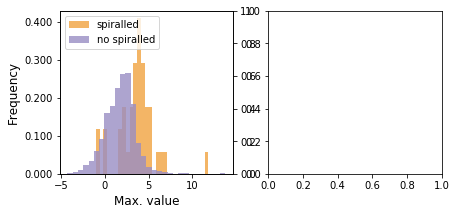

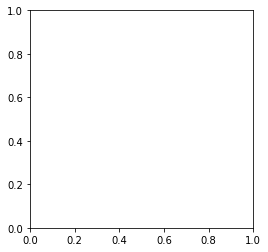

In [46]:
# Find the optimized value mutual information threshold for each filter

binsValue=30
categories=["spiralled"]
filters=[124,125]
layers=[2]
dfFeatureMap = pd.read_csv(Path(os.path.join(storePath,os.path.splitext(modelName)[0]+"_dfFeatureMap.csv")))
iconfusionMatrix=pd.DataFrame({"Layer":[], "filter":[],"category":[], "iThreshold":[], "truePositive":[],"trueNegative":[], "falsePositive":[], "falsenegative":[], "mutualScore":[], "iInfoMutuelle":[]}, dtype=int)

fig, axes = plt.subplots(1,2,figsize=(pageWidth,3))
for layer in layers:
    print("Layer number : ", layer)    
    numberOfFilter = len(model.layers[layerNumber[layer-1]].get_weights()[1])
    i=0
    for filterNumber in filters:
        print("filter number : ",filterNumber)
#        for category in categories:
#            print("category : ",category)
#            #dfinodefect=dfFeatureMap[(dfFeatureMap['category']=="nodefect") & (dfFeatureMap['Layer']==layer) & (dfFeatureMap['filtre']==filterNumber)]
#            #dfidefect=dfFeatureMap[(dfFeatureMap['category']=="defect") & (dfFeatureMap['Layer']==layer) & (dfFeatureMap['filtre']==filterNumber)]
#            minND=np.amin(dfFeatureMap[(dfFeatureMap['category']==category) & (dfFeatureMap['Layer']==layer) & (dfFeatureMap['filtre']==filterNumber)]["maxima"])
#            maxND=np.amax(dfFeatureMap[(dfFeatureMap['category']==category) & (dfFeatureMap['Layer']==layer) & (dfFeatureMap['filtre']==filterNumber)]["maxima"])
#            thresholds=np.arange(minND, maxND, (maxND-minND)/20)
#            for iThreshold in (thresholds):
#                iTP=dfFeatureMap[(dfFeatureMap['category']==category) & (dfFeatureMap['Layer']==layer) & (dfFeatureMap['filtre']==filterNumber) & (dfFeatureMap["maxima"]>=iThreshold)].count()[4]
#                iTN=dfFeatureMap[(dfFeatureMap['category']!=category) & (dfFeatureMap['Layer']==layer) & (dfFeatureMap['filtre']==filterNumber) & (dfFeatureMap["maxima"]<iThreshold)].count()[4]
#                iFP=dfFeatureMap[(dfFeatureMap['category']!=category) & (dfFeatureMap['Layer']==layer) & (dfFeatureMap['filtre']==filterNumber) & (dfFeatureMap["maxima"]>=iThreshold)].count()[4]
#                iFN=dfFeatureMap[(dfFeatureMap['category']==category) & (dfFeatureMap['Layer']==layer) & (dfFeatureMap['filtre']==filterNumber) & (dfFeatureMap["maxima"]<iThreshold)].count()[4]
#                iS=iTP+iTN+iFP+iFN
#                label_true=[*np.ones(iTP),*np.zeros(iTN),*np.zeros(iFP),*np.ones(iFN)]
#                label_pred=[*np.ones(iTP),*np.zeros(iTN),*np.ones(iFP),*np.zeros(iFN)]
#                
#                imutualScore=normalized_mutual_info_score(label_true, label_pred)
#                iPY1 = (iTP+iFP)/iS
#                iPY0 = (iFN+iTN)/iS
#                iPC1 = (iTP+iFN)/iS
#                iPC0 = (iFP+iTN)/iS
#                iPY1C1, iPY0C1, iPY1C0, iPY0C0 = iTP/iS, iFN/iS, iFP/iS, iTN/iS
#                
#                if (iFP!=0 and iFN!=0 and iTP!=0 and iTN!=0):
#                    iHY = - iPY1*math.log2(iPY1) - iPY0*math.log2(iPY0)
#                    iHC = - iPC1*math.log2(iPC1) - iPC0*math.log2(iPC0)
#                    iHYC = - iPY1C1*math.log2(iPY1C1) - iPY0C1*math.log2(iPY0C1) - iPY1C0*math.log2(iPY1C0) - iPY0C0*math.log2(iPY0C0)
#                    iIYC = iHY + iHC - iHYC
#                    iconfusionMatrix=iconfusionMatrix.append({"Layer":layer, "filter":filterNumber,"category":category, "iThreshold":iThreshold, "truePositive":iTP,"trueNegative":iTN, "falsePositive":iFP, "falsenegative":iFN, "mutualScore":imutualScore, "iInfoMutuelle":iIYC}, ignore_index=True)        
#                else :
#                    iconfusionMatrix=iconfusionMatrix.append({"Layer":layer, "filter":filterNumber,"category":category, "iThreshold":iThreshold, "truePositive":iTP,"trueNegative":iTN, "falsePositive":iFP, "falsenegative":iFN, "mutualScore":np.NaN, "iInfoMutuelle":np.NaN}, ignore_index=True)        
#                   
        for category in categories:
            fig, ax1 = plt.subplots()
            fig.set_figheight(4)
            fig.set_figwidth(4)
            axes[i].hist(dfFeatureMap[(dfFeatureMap['category']==category) & (dfFeatureMap['Layer']==layer) & (dfFeatureMap['filtre']==filterNumber)]["maxima"],color=colorDefect, bins=binsValue, alpha=0.8, density=True, label=category)
            labelNoCategory=("no "+category)
            axes[i].hist(dfFeatureMap[(dfFeatureMap['category']!=category) & (dfFeatureMap['Layer']==layer) & (dfFeatureMap['filtre']==filterNumber)]["maxima"],color=colorNodefect, bins=binsValue, alpha=0.8, density=True, label=labelNoCategory)
            axes[i].legend(loc=2)
            axes[i].set_ylabel("Frequency")
            axes[i].set_xlabel("Max. value")
            axes[i].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
            ax2=axes[i].twinx()
            ax2.set_xticks(np.arrange(0,0.4,step=0.01))
            ax2.plot(iconfusionMatrix[(iconfusionMatrix["category"]==category)&(iconfusionMatrix["Layer"]==layer)&(iconfusionMatrix["filter"]==filterNumber)]["iThreshold"], iconfusionMatrix[(iconfusionMatrix["category"]==category)&(iconfusionMatrix["Layer"]==layer)&(iconfusionMatrix["filter"]==filterNumber)]["iInfoMutuelle"], '--', label="mutualInfo", color="black")
            ax2.set_ylabel("Mutual information")
            #ax2.legend(loc=1)          
            axes[i].set_title("Filter %i"% filterNumber + " of layer %i" % layer)
        i+=1
    plt.tight_layout()
    plt.plot()
    plt.show()
    plt.close()

    #iconfusionMatrix.to_csv(Path(os.path.join(outputPath,os.path.splitext(modelName)[0]+"_iconfusionMatrix_L2F232_end.csv")),index=True)
print("Done!")

In [6]:
iconfusionMatrix.to_csv(Path(os.path.join(outputPath,os.path.splitext(modelName)[0]+"_iconfusionMatrix_L2F134_231.csv")),index=True)


In [10]:
# Find the optimized value mutual information threshold for each filter

binsValue=30

dfFeatureMap = pd.read_csv(Path(os.path.join(storePath,os.path.splitext(modelName)[0]+"_dfFeatureMap.csv")))
iconfusionMatrix=pd.DataFrame({"Layer":[], "filter":[],"category":[], "iThreshold":[], "truePositive":[],"trueNegative":[], "falsePositive":[], "falsenegative":[], "mutualScore":[], "iInfoMutuelle":[]}, dtype=int)

for layer in convLayers["convolutionIndex"][3:4]:
    print("Layer number : ", layer)    
    numberOfFilter = len(model.layers[layerNumber[layer-1]].get_weights()[1])
    
    for filterNumber in range (numberOfFilter)[333:]:
        print("filter number : ",filterNumber)
        for category in categories:
            print("category : ",category)
            #dfinodefect=dfFeatureMap[(dfFeatureMap['category']=="nodefect") & (dfFeatureMap['Layer']==layer) & (dfFeatureMap['filtre']==filterNumber)]
            #dfidefect=dfFeatureMap[(dfFeatureMap['category']=="defect") & (dfFeatureMap['Layer']==layer) & (dfFeatureMap['filtre']==filterNumber)]
            minND=np.amin(dfFeatureMap[(dfFeatureMap['category']==category) & (dfFeatureMap['Layer']==layer) & (dfFeatureMap['filtre']==filterNumber)]["maxima"])
            maxND=np.amax(dfFeatureMap[(dfFeatureMap['category']==category) & (dfFeatureMap['Layer']==layer) & (dfFeatureMap['filtre']==filterNumber)]["maxima"])
            thresholds=np.arange(minND, maxND, (maxND-minND)/20)
            for iThreshold in (thresholds):
                iTP=dfFeatureMap[(dfFeatureMap['category']==category) & (dfFeatureMap['Layer']==layer) & (dfFeatureMap['filtre']==filterNumber) & (dfFeatureMap["maxima"]>=iThreshold)].count()[4]
                iTN=dfFeatureMap[(dfFeatureMap['category']!=category) & (dfFeatureMap['Layer']==layer) & (dfFeatureMap['filtre']==filterNumber) & (dfFeatureMap["maxima"]<iThreshold)].count()[4]
                iFP=dfFeatureMap[(dfFeatureMap['category']!=category) & (dfFeatureMap['Layer']==layer) & (dfFeatureMap['filtre']==filterNumber) & (dfFeatureMap["maxima"]>=iThreshold)].count()[4]
                iFN=dfFeatureMap[(dfFeatureMap['category']==category) & (dfFeatureMap['Layer']==layer) & (dfFeatureMap['filtre']==filterNumber) & (dfFeatureMap["maxima"]<iThreshold)].count()[4]
                iS=iTP+iTN+iFP+iFN
                label_true=[*np.ones(iTP),*np.zeros(iTN),*np.zeros(iFP),*np.ones(iFN)]
                label_pred=[*np.ones(iTP),*np.zeros(iTN),*np.ones(iFP),*np.zeros(iFN)]
                
                imutualScore=normalized_mutual_info_score(label_true, label_pred)
                iPY1 = (iTP+iFP)/iS
                iPY0 = (iFN+iTN)/iS
                iPC1 = (iTP+iFN)/iS
                iPC0 = (iFP+iTN)/iS
                iPY1C1, iPY0C1, iPY1C0, iPY0C0 = iTP/iS, iFN/iS, iFP/iS, iTN/iS
                
                if (iFP!=0 and iFN!=0 and iTP!=0 and iTN!=0):
                    iHY = - iPY1*math.log2(iPY1) - iPY0*math.log2(iPY0)
                    iHC = - iPC1*math.log2(iPC1) - iPC0*math.log2(iPC0)
                    iHYC = - iPY1C1*math.log2(iPY1C1) - iPY0C1*math.log2(iPY0C1) - iPY1C0*math.log2(iPY1C0) - iPY0C0*math.log2(iPY0C0)
                    iIYC = iHY + iHC - iHYC
                    iconfusionMatrix=iconfusionMatrix.append({"Layer":layer, "filter":filterNumber,"category":category, "iThreshold":iThreshold, "truePositive":iTP,"trueNegative":iTN, "falsePositive":iFP, "falsenegative":iFN, "mutualScore":imutualScore, "iInfoMutuelle":iIYC}, ignore_index=True)        
                else :
                    iconfusionMatrix=iconfusionMatrix.append({"Layer":layer, "filter":filterNumber,"category":category, "iThreshold":iThreshold, "truePositive":iTP,"trueNegative":iTN, "falsePositive":iFP, "falsenegative":iFN, "mutualScore":np.NaN, "iInfoMutuelle":np.NaN}, ignore_index=True)        
                   
        #if intermediateResults==True:
        #    for category in categories[43:44]:
        #        fig, ax1 = plt.subplots()
        #        fig.set_figheight(4)
        #        fig.set_figwidth(4)
        #        ax1.hist(dfFeatureMap[(dfFeatureMap['category']==category) & (dfFeatureMap['Layer']==layer) & (dfFeatureMap['filtre']==filterNumber)]["maxima"], bins=binsValue, alpha=0.8, density=True, label=category)
        #        labelNoCategory=("no "+category)
        #        ax1.hist(dfFeatureMap[(dfFeatureMap['category']!=category) & (dfFeatureMap['Layer']==layer) & (dfFeatureMap['filtre']==filterNumber)]["maxima"], bins=binsValue, alpha=0.8, density=True, label=labelNoCategory)
        #        ax1.legend(loc=2)
        #        ax1.set_ylabel("Frequency")
        #        ax1.set_xlabel("Max. value")
        #        ax1.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
        #        ax2 = ax1.twinx()
        #        ax2.plot(iconfusionMatrix[(iconfusionMatrix["category"]==category)&(iconfusionMatrix["Layer"]==layer)&(iconfusionMatrix["filter"]==filterNumber)]["iThreshold"], iconfusionMatrix[(iconfusionMatrix["category"]==category)&(iconfusionMatrix["Layer"]==layer)&(iconfusionMatrix["filter"]==filterNumber)]["iInfoMutuelle"], '--', label="mutualInfo", color="black")
        #        ax2.set_ylabel("Mutual information")
        #        ax2.legend(loc=1)
        #        plt.title("Filter %i"% filterNumber + " of layer %i" % layer)
        #        plt.plot()
        #        plt.show()
        #        plt.close()

    iconfusionMatrix.to_csv(Path(os.path.join(outputPath,os.path.splitext(modelName)[0]+"_iconfusionMatrix_L4F108_end.csv")),index=True)
print("Done!")

Layer number :  4
filter number :  333
category :  banded
category :  blotchy
category :  braided
category :  bubbly
category :  bumpy
category :  chequered
category :  cobwebbed
category :  cracked
category :  crosshatched
category :  crystalline
category :  dotted
category :  fibrous
category :  flecked
category :  freckled
category :  frilly
category :  gauzy
category :  grid
category :  grooved
category :  honeycombed
category :  interlaced
category :  knitted
category :  lacelike
category :  lined
category :  marbled
category :  matted
category :  meshed
category :  paisley
category :  perforated
category :  pitted
category :  pleated
category :  polka-dotted
category :  porous
category :  potholed
category :  scaly
category :  smeared
category :  spiralled
category :  sprinkled
category :  stained
category :  stratified
category :  striped
category :  studded
category :  swirly
category :  veined
category :  waffled
category :  woven
category :  wrinkled
category :  zigzagged
fil

category :  potholed
category :  scaly
category :  smeared
category :  spiralled
category :  sprinkled
category :  stained
category :  stratified
category :  striped
category :  studded
category :  swirly
category :  veined
category :  waffled
category :  woven
category :  wrinkled
category :  zigzagged
filter number :  350
category :  banded
category :  blotchy
category :  braided
category :  bubbly
category :  bumpy
category :  chequered
category :  cobwebbed
category :  cracked
category :  crosshatched
category :  crystalline
category :  dotted
category :  fibrous
category :  flecked
category :  freckled
category :  frilly
category :  gauzy
category :  grid
category :  grooved
category :  honeycombed
category :  interlaced
category :  knitted
category :  lacelike
category :  lined
category :  marbled
category :  matted
category :  meshed
category :  paisley
category :  perforated
category :  pitted
category :  pleated
category :  polka-dotted
category :  porous
category :  potholed


category :  honeycombed
category :  interlaced
category :  knitted
category :  lacelike
category :  lined
category :  marbled
category :  matted
category :  meshed
category :  paisley
category :  perforated
category :  pitted
category :  pleated
category :  polka-dotted
category :  porous
category :  potholed
category :  scaly
category :  smeared
category :  spiralled
category :  sprinkled
category :  stained
category :  stratified
category :  striped
category :  studded
category :  swirly
category :  veined
category :  waffled
category :  woven
category :  wrinkled
category :  zigzagged
filter number :  367
category :  banded
category :  blotchy
category :  braided
category :  bubbly
category :  bumpy
category :  chequered
category :  cobwebbed
category :  cracked
category :  crosshatched
category :  crystalline
category :  dotted
category :  fibrous
category :  flecked
category :  freckled
category :  frilly
category :  gauzy
category :  grid
category :  grooved
category :  honeycomb

category :  bumpy
category :  chequered
category :  cobwebbed
category :  cracked
category :  crosshatched
category :  crystalline
category :  dotted
category :  fibrous
category :  flecked
category :  freckled
category :  frilly
category :  gauzy
category :  grid
category :  grooved
category :  honeycombed
category :  interlaced
category :  knitted
category :  lacelike
category :  lined
category :  marbled
category :  matted
category :  meshed
category :  paisley
category :  perforated
category :  pitted
category :  pleated
category :  polka-dotted
category :  porous
category :  potholed
category :  scaly
category :  smeared
category :  spiralled
category :  sprinkled
category :  stained
category :  stratified
category :  striped
category :  studded
category :  swirly
category :  veined
category :  waffled
category :  woven
category :  wrinkled
category :  zigzagged
Done!


In [1]:
iconfusionMatrix

NameError: name 'iconfusionMatrix' is not defined

In [ ]:
iconfusionMatrix_L5 = pd.read_csv(Path(os.path.join(storePath,os.path.splitext(modelName)[0]+"_iconfusionMatrix_L5.txt")))
add=iconfusion.append(Path(os.path.join(storePath,os.path.splitext(modelName)[0]+"_iconfusionMatrix_L5.txt")))
results=pd.concat([iconfusionMatrix_L5,])

In [17]:
#print((96+256+384+384+220)*47*20)
#print(256*47*20)
print((256)*47*20)

iconfusionMatrix[iconfusionMatrix["Layer"]==5]

240640


Unnamed: 0  Layer  filter   category  iThreshold  truePositive  \
0                0      5       0     banded   -1.657848            40   
1                1      5       0     banded   -1.343351            35   
2                2      5       0     banded   -1.028854            33   
3                3      5       0     banded   -0.714357            30   
4                4      5       0     banded   -0.399859            28   
...            ...    ...     ...        ...         ...           ...   
240635       24435      5     255  zigzagged    4.054421             1   
240636       24436      5     255  zigzagged    4.415496             1   
240637       24437      5     255  zigzagged    4.776572             1   
240638       24438      5     255  zigzagged    5.137647             1   
240639       24439      5     255  zigzagged    5.498722             1   

        trueNegative  falsePositive  falsenegative  mutualScore  iInfoMutuelle  
0                 10           1830              0          NaN            NaN  
1                 19           1821              5     0.047494       0.005869  
2                 36           1804              7     0.045831       0.007008  
3                 88           1752             10     0.031141       0.006912  
4                166           1674             12     0.017520       0.005260  
...              ...            ...            ...          ...            ...  
240635          1812             28             39     0.000608       0.000080  
240636          1826             14             39     0.003440       0.000371  
240637          1832              8             39     0.007111       0.000684  
240638          1833              7             39     0.008118       0.000764  
240639          1835              5             39     0.010802       0.000970  

[240640 rows x 11 columns]

In [155]:
iconfusionMatrix_L1 = pd.read_csv(Path(os.path.join(storePath,os.path.splitext(modelName)[0]+"_iconfusionMatrix_L1.txt")))
iconfusionMatrix_L2 = pd.read_csv(Path(os.path.join(storePath,os.path.splitext(modelName)[0]+"_iconfusionMatrix_L2.txt")))
iconfusionMatrix_L3 = pd.read_csv(Path(os.path.join(storePath,os.path.splitext(modelName)[0]+"_iconfusionMatrix_L3.txt")))
iconfusionMatrix_L4 = pd.read_csv(Path(os.path.join(storePath,os.path.splitext(modelName)[0]+"_iconfusionMatrix_L4.txt")))
iconfusionMatrix_L5 = pd.read_csv(Path(os.path.join(storePath,os.path.splitext(modelName)[0]+"_iconfusionMatrix_L5.txt")))
iconfusionMatrix=pd.concat([iconfusionMatrix_L1,
                            iconfusionMatrix_L2, 
                            iconfusionMatrix_L3, 
                            iconfusionMatrix_L4, 
                            iconfusionMatrix_L5, 
                           ])
iconfusionMatrix

iconfusionMatrix.to_csv(Path(os.path.join(storePath,os.path.splitext(modelName)[0]+"_iconfusionMatrix.txt")))

In [192]:
print(len(iconfusionMatrix[iconfusionMatrix["Layer"]==2]))
print(47*20*256)

240640
240640


In [159]:
# Built the confusion matrix with optimized value of mutual information for each filter

iconfusionMatrix = pd.read_csv(Path(os.path.join(storePath,os.path.splitext(modelName)[0]+"_iconfusionMatrix.txt")))
confusionMatrix=pd.DataFrame({"Layer":[], "filter":[], "category":[], "threshold":[], "truePositive":[],"trueNegative":[], "falsePositive":[], "falsenegative":[], "mutualScore":[], "mutualInfo":[]}, dtype=int)

for layer in convLayers["convolutionIndex"][2:3]:
    numberOfFilter = len(model.layers[layerNumber[layer-1]].get_weights()[1])
    print(layer)
    for filterNumber in range (133,384):
        print(filterNumber)
        for category in categories:
            threshold=iconfusionMatrix.loc[(iconfusionMatrix["category"]==category)&(iconfusionMatrix["Layer"]==layer)&(iconfusionMatrix["filter"]==filterNumber)].sort_values(by="iInfoMutuelle", ascending=False).iloc[0]["iThreshold"]
            
            TP=dfFeatureMap[(dfFeatureMap['category']==category) &  (dfFeatureMap['Layer']==layer) & (dfFeatureMap['filtre']==filterNumber) & (dfFeatureMap["maxima"]>=threshold)].count()[4]
            TN=dfFeatureMap[(dfFeatureMap['category']!=category) &  (dfFeatureMap['Layer']==layer) & (dfFeatureMap['filtre']==filterNumber) & (dfFeatureMap["maxima"]<threshold)].count()[4]
            FP=dfFeatureMap[(dfFeatureMap['category']!=category) &  (dfFeatureMap['Layer']==layer) & (dfFeatureMap['filtre']==filterNumber) & (dfFeatureMap["maxima"]>=threshold)].count()[4]
            FN=dfFeatureMap[(dfFeatureMap['category']==category) &  (dfFeatureMap['Layer']==layer) & (dfFeatureMap['filtre']==filterNumber) & (dfFeatureMap["maxima"]<threshold)].count()[4]
            S=TP+TN+FP+FN
            
            # Calcul of the mutual information
            PY1 = (TP+FP)/S
            PY0 = (FN+TN)/S
            PC1 = (TP+FN)/S
            PC0 = (FP+TN)/S 
            PY1C1, PY0C1, PY1C0, PY0C0 = TP/S, FN/S, FP/S, TN/S
            
            HY = - PY1*math.log2(PY1) - PY0*math.log2(PY0)
            HC = - PC1*math.log2(PC1) - PC0*math.log2(PC0)
            HYC = - PY1C1*math.log2(PY1C1) - PY0C1*math.log2(PY0C1) - PY1C0*math.log2(PY1C0) - PY0C0*math.log2(PY0C0)     
            IYC = HY + HC - HYC
        
            label_true=[*np.ones(TP),*np.zeros(TN),*np.zeros(FP),*np.ones(FN)]
            label_pred=[*np.ones(TP),*np.zeros(TN),*np.ones(FP),*np.zeros(FN)]
            mutualScore=normalized_mutual_info_score(label_true, label_pred)
    
            confusionMatrix=confusionMatrix.append({"Layer":layer, "filter":filterNumber,"category":category, "threshold":threshold, "truePositive":TP,"trueNegative":TN, "falsePositive":FP, "falsenegative":FN, "mutualScore":mutualScore, "mutualInfo":IYC}, ignore_index=True)

confusionMatrix.to_csv(Path(os.path.join(storePath,os.path.splitext(modelName)[0]+"_confusionMatrixtest.csv")),index=True)


3
133
134
135


KeyboardInterrupt: 

In [198]:
# Pipe

# Built the confusion matrix with optimized value of mutual information for each filter

#iconfusionMatrix = pd.read_csv(Path(os.path.join(storePath,os.path.splitext(modelName)[0]+"_iconfusionMatrix.txt")))
#confusionMatrix=pd.DataFrame({"Layer":[], "filter":[], "category":[], "threshold":[], "truePositive":[],"trueNegative":[], "falsePositive":[], "falsenegative":[], "mutualScore":[], "mutualInfo":[]}, dtype=int)
#
#for layer in convLayers["convolutionIndex"][1:2]:
#    numberOfFilter = len(model.layers[layerNumber[layer-1]].get_weights()[1])
#    print(layer)
#    for filterNumber in range (134,255):
#        print(filterNumber)
#        for category in categories:
#            threshold=iconfusionMatrix.loc[(iconfusionMatrix["category"]==category)&(iconfusionMatrix["Layer"]==layer)&(iconfusionMatrix["filter"]==filterNumber)].sort_values(by="iInfoMutuelle", ascending=False).iloc[0]["iThreshold"]
#            
#            TP=dfFeatureMap[(dfFeatureMap['category']==category) &  (dfFeatureMap['Layer']==layer) & (dfFeatureMap['filtre']==filterNumber) & (dfFeatureMap["maxima"]>=threshold)].count()[4]
#            TN=dfFeatureMap[(dfFeatureMap['category']!=category) &  (dfFeatureMap['Layer']==layer) & (dfFeatureMap['filtre']==filterNumber) & (dfFeatureMap["maxima"]<threshold)].count()[4]
#            FP=dfFeatureMap[(dfFeatureMap['category']!=category) &  (dfFeatureMap['Layer']==layer) & (dfFeatureMap['filtre']==filterNumber) & (dfFeatureMap["maxima"]>=threshold)].count()[4]
#            FN=dfFeatureMap[(dfFeatureMap['category']==category) &  (dfFeatureMap['Layer']==layer) & (dfFeatureMap['filtre']==filterNumber) & (dfFeatureMap["maxima"]<threshold)].count()[4]
#            S=TP+TN+FP+FN
#            
#            # Calcul of the mutual information
#            PY1 = (TP+FP)/S
#            PY0 = (FN+TN)/S
#            PC1 = (TP+FN)/S
#            PC0 = (FP+TN)/S 
#            PY1C1, PY0C1, PY1C0, PY0C0 = TP/S, FN/S, FP/S, TN/S
#            
#            HY = - PY1*math.log2(PY1) - PY0*math.log2(PY0)
#            HC = - PC1*math.log2(PC1) - PC0*math.log2(PC0)
#            HYC = - PY1C1*math.log2(PY1C1) - PY0C1*math.log2(PY0C1) - PY1C0*math.log2(PY1C0) - PY0C0*math.log2(PY0C0)     
#            IYC = HY + HC - HYC
#        
#            label_true=[*np.ones(TP),*np.zeros(TN),*np.zeros(FP),*np.ones(FN)]
#            label_pred=[*np.ones(TP),*np.zeros(TN),*np.ones(FP),*np.zeros(FN)]
#            mutualScore=normalized_mutual_info_score(label_true, label_pred)
#    
#            confusionMatrix=confusionMatrix.append({"Layer":layer, "filter":filterNumber,"category":category, "threshold":threshold, "truePositive":TP,"trueNegative":TN, "falsePositive":FP, "falsenegative":FN, "mutualScore":mutualScore, "mutualInfo":IYC}, ignore_index=True)
#
#confusionMatrix.to_csv(Path(os.path.join(storePath,os.path.splitext(modelName)[0]+"_confusionMatrix_end.csv")))
        
#for layer in convLayers["convolutionIndex"][4:5]:
#    numberOfFilter = len(model.layers[layerNumber[layer-1]].get_weights()[1])
#    print(layer)
#    for filterNumber in range (numberOfFilter):
#        print(filterNumber)
#        for category in categories:
#            threshold=iconfusionMatrix.loc[(iconfusionMatrix["category"]==category)&(iconfusionMatrix["Layer"]==layer)&(iconfusionMatrix["filter"]==filterNumber)].sort_values(by="iInfoMutuelle", ascending=False).iloc[0]["iThreshold"]
#            
#            TP=dfFeatureMap[(dfFeatureMap['category']==category) &  (dfFeatureMap['Layer']==layer) & (dfFeatureMap['filtre']==filterNumber) & (dfFeatureMap["maxima"]>=threshold)].count()[4]
#            TN=dfFeatureMap[(dfFeatureMap['category']!=category) &  (dfFeatureMap['Layer']==layer) & (dfFeatureMap['filtre']==filterNumber) & (dfFeatureMap["maxima"]<threshold)].count()[4]
#            FP=dfFeatureMap[(dfFeatureMap['category']!=category) &  (dfFeatureMap['Layer']==layer) & (dfFeatureMap['filtre']==filterNumber) & (dfFeatureMap["maxima"]>=threshold)].count()[4]
#            FN=dfFeatureMap[(dfFeatureMap['category']==category) &  (dfFeatureMap['Layer']==layer) & (dfFeatureMap['filtre']==filterNumber) & (dfFeatureMap["maxima"]<threshold)].count()[4]
#            S=TP+TN+FP+FN
#            
#            # Calcul of the mutual information
#            PY1 = (TP+FP)/S
#            PY0 = (FN+TN)/S
#            PC1 = (TP+FN)/S
#            PC0 = (FP+TN)/S 
#            PY1C1, PY0C1, PY1C0, PY0C0 = TP/S, FN/S, FP/S, TN/S
#            
#            HY = - PY1*math.log2(PY1) - PY0*math.log2(PY0)
#            HC = - PC1*math.log2(PC1) - PC0*math.log2(PC0)
#            HYC = - PY1C1*math.log2(PY1C1) - PY0C1*math.log2(PY0C1) - PY1C0*math.log2(PY1C0) - PY0C0*math.log2(PY0C0)     
#            IYC = HY + HC - HYC
#        
#            label_true=[*np.ones(TP),*np.zeros(TN),*np.zeros(FP),*np.ones(FN)]
#            label_pred=[*np.ones(TP),*np.zeros(TN),*np.ones(FP),*np.zeros(FN)]
#            mutualScore=normalized_mutual_info_score(label_true, label_pred)
#    
#            confusionMatrix=confusionMatrix.append({"Layer":layer, "filter":filterNumber,"category":category, "threshold":threshold, "truePositive":TP,"trueNegative":TN, "falsePositive":FP, "falsenegative":FN, "mutualScore":mutualScore, "mutualInfo":IYC}, ignore_index=True)
#
#confusionMatrix.to_csv(Path(os.path.join(storePath,os.path.splitext(modelName)[0]+"_confusionMatrix_end.csv")))

for layer in convLayers["convolutionIndex"][1:2]:
    numberOfFilter = len(model.layers[layerNumber[layer-1]].get_weights()[1])
    print(layer)
    for filterNumber in range (numberOfFilter)[133:134]:
        print(filterNumber)
        for category in categories:
            threshold=iconfusionMatrix.loc[(iconfusionMatrix["category"]==category)&(iconfusionMatrix["Layer"]==layer)&(iconfusionMatrix["filter"]==filterNumber)].sort_values(by="iInfoMutuelle", ascending=False).iloc[0]["iThreshold"]
            
            TP=dfFeatureMap[(dfFeatureMap['category']==category) &  (dfFeatureMap['Layer']==layer) & (dfFeatureMap['filtre']==filterNumber) & (dfFeatureMap["maxima"]>=threshold)].count()[4]
            TN=dfFeatureMap[(dfFeatureMap['category']!=category) &  (dfFeatureMap['Layer']==layer) & (dfFeatureMap['filtre']==filterNumber) & (dfFeatureMap["maxima"]<threshold)].count()[4]
            FP=dfFeatureMap[(dfFeatureMap['category']!=category) &  (dfFeatureMap['Layer']==layer) & (dfFeatureMap['filtre']==filterNumber) & (dfFeatureMap["maxima"]>=threshold)].count()[4]
            FN=dfFeatureMap[(dfFeatureMap['category']==category) &  (dfFeatureMap['Layer']==layer) & (dfFeatureMap['filtre']==filterNumber) & (dfFeatureMap["maxima"]<threshold)].count()[4]
            S=TP+TN+FP+FN
            
            # Calcul of the mutual information
            PY1 = (TP+FP)/S
            PY0 = (FN+TN)/S
            PC1 = (TP+FN)/S
            PC0 = (FP+TN)/S 
            PY1C1, PY0C1, PY1C0, PY0C0 = TP/S, FN/S, FP/S, TN/S
            
            HY = - PY1*math.log2(PY1) - PY0*math.log2(PY0)
            HC = - PC1*math.log2(PC1) - PC0*math.log2(PC0)
            HYC = - PY1C1*math.log2(PY1C1) - PY0C1*math.log2(PY0C1) - PY1C0*math.log2(PY1C0) - PY0C0*math.log2(PY0C0)     
            IYC = HY + HC - HYC
        
            label_true=[*np.ones(TP),*np.zeros(TN),*np.zeros(FP),*np.ones(FN)]
            label_pred=[*np.ones(TP),*np.zeros(TN),*np.ones(FP),*np.zeros(FN)]
            mutualScore=normalized_mutual_info_score(label_true, label_pred)
    
            confusionMatrix=confusionMatrix.append({"Layer":layer, "filter":filterNumber,"category":category, "threshold":threshold, "truePositive":TP,"trueNegative":TN, "falsePositive":FP, "falsenegative":FN, "mutualScore":mutualScore, "mutualInfo":IYC}, ignore_index=True)

confusionMatrix.to_csv(Path(os.path.join(storePath,os.path.splitext(modelName)[0]+"_confusionMatrix_end3.csv")))


2
133


In [195]:
for layer in convLayers["convolutionIndex"][1:2]:
    print(len(model.layers[layerNumber[layer-1]].get_weights()[1]))

256


In [202]:
print(len(iconfusionMatrix))
print((96+256*2+384*2)*47*20)
confusionMatrix

1293440
1293440


Layer  filter   category  threshold  truePositive  trueNegative  \
0          2     134     banded  -0.933008            29            33   
1          2     134    blotchy   2.730565             4          1425   
2          2     134    braided   0.730886            36           461   
3          2     134     bubbly   2.491976            20          1358   
4          2     134      bumpy   1.040724            34           623   
...      ...     ...        ...        ...           ...           ...   
23921      2     133     veined   2.300534             3          1556   
23922      2     133    waffled   2.634228             1          1662   
23923      2     133      woven   0.443389            24           154   
23924      2     133   wrinkled   1.074350            18           647   
23925      2     133  zigzagged   1.544208            25          1090   

       falsePositive  falsenegative  mutualScore  mutualInfo  
0               1807             11     0.098368    0.015172  
1                415             36     0.004817    0.001624  
2               1379              4     0.006348    0.002198  
3                482             20     0.010916    0.003850  
4               1217              6     0.007426    0.002745  
...              ...            ...          ...         ...  
23921            284             37     0.002872    0.000869  
23922            178             39     0.004737    0.001230  
23923           1686             16     0.043099    0.010992  
23924           1193             22     0.006563    0.002451  
23925            750             15     0.007540    0.002873  

[23926 rows x 10 columns]

In [81]:
iconfusionMatrix.loc[(iconfusionMatrix["category"]==category)&(iconfusionMatrix["Layer"]==layer)&(iconfusionMatrix["filter"]==filterNumber)].sort_values(by="iInfoMutuelle", ascending=False)["iThreshold"]

Unnamed: 0  Layer  filter category  iThreshold  truePositive  \
0               0      1       0   banded -726.346619            40   
1               1      1       0   banded -719.083167            39   
2               2      1       0   banded -711.819715            39   
3               3      1       0   banded -704.556263            39   
4               4      1       0   banded -697.292811            38   
...           ...    ...     ...      ...         ...           ...   
12001       12001      2      19  braided    4.172271             1   
12002       12002      2      19  braided    4.212906             1   
12003       12003      2      19  braided    4.253541             1   
12004       12004      2      19  braided    4.294175             1   
12005       12005      2      19  braided    4.334810             1   

       trueNegative  falsePositive  falsenegative  mutualScore  iInfoMutuelle  
0                 0             80              0          NaN            NaN  
1                 0             80              1          NaN            NaN  
2                 0             80              1          NaN            NaN  
3                 0             80              1          NaN            NaN  
4                 0             80              2          NaN            NaN  
...             ...            ...            ...          ...            ...  
12001            76              4             39     0.005700       0.002731  
12002            76              4             39     0.005700       0.002731  
12003            76              4             39     0.005700       0.002731  
12004            77              3             39     0.001853       0.000815  
12005            77              3             39     0.001853       0.000815  

[12006 rows x 11 columns]

In [200]:
#16544
print((96)*47)
print((256)*47)
print((384)*47, "\n")
df1 = pd.read_csv(Path(os.path.join(storePath,os.path.splitext(modelName)[0]+"_confusionMatrixtrue.txt")))
df2 = pd.read_csv(Path(os.path.join(storePath,os.path.splitext(modelName)[0]+"_confusionMatrix.txt")))
df3 = pd.read_csv(Path(os.path.join(storePath,os.path.splitext(modelName)[0]+"_confusionMatrix_L1.csv")))
df4 = pd.read_csv(Path(os.path.join(storePath,os.path.splitext(modelName)[0]+"_confusionMatrix_L3F0_59.csv")))
df5 = pd.read_csv(Path(os.path.join(storePath,os.path.splitext(modelName)[0]+"_confusionMatrix_L3F60_202.csv")))
df6 = pd.read_csv(Path(os.path.join(storePath,os.path.splitext(modelName)[0]+"_confusionMatrix_part1.csv")))
df7 = pd.read_csv(Path(os.path.join(storePath,os.path.splitext(modelName)[0]+"_confusionMatrixL2tmp.csv")))
df8 = pd.read_csv(Path(os.path.join(storePath,os.path.splitext(modelName)[0]+"_confusionMatrix_partial.csv")))
df9 = confusionMatrix
d10 = pd.read_csv(Path(os.path.join(storePath,os.path.splitext(modelName)[0]+"_confusionMatrix_end.csv")))
d11 = pd.read_csv(Path(os.path.join(storePath,os.path.splitext(modelName)[0]+"_confusionMatrix_end2.csv")))
d12 = pd.read_csv(Path(os.path.join(storePath,os.path.splitext(modelName)[0]+"_confusionMatrix_end3.csv")))

dfconcat=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,d10,d11,d12])
res=dfconcat.drop_duplicates(subset=["Layer","category","filter"])
for i in range(1,6):
    print(len(res[(res["Layer"]==i)]))
res.to_csv(Path(os.path.join(storePath,os.path.splitext(modelName)[0]+"_confusionMatrix.csv")))

4512
12032
18048 

4512
12032
18048
18048
12032


In [196]:
for i in range (0,256):
    print ("n",i)
    print(len(res[(res["Layer"]==2)&(res["filter"]==i)]))

n 0
47
n 1
47
n 2
47
n 3
47
n 4
47
n 5
47
n 6
47
n 7
47
n 8
47
n 9
47
n 10
47
n 11
47
n 12
47
n 13
47
n 14
47
n 15
47
n 16
47
n 17
47
n 18
47
n 19
47
n 20
47
n 21
47
n 22
47
n 23
47
n 24
47
n 25
47
n 26
47
n 27
47
n 28
47
n 29
47
n 30
47
n 31
47
n 32
47
n 33
47
n 34
47
n 35
47
n 36
47
n 37
47
n 38
47
n 39
47
n 40
47
n 41
47
n 42
47
n 43
47
n 44
47
n 45
47
n 46
47
n 47
47
n 48
47
n 49
47
n 50
47
n 51
47
n 52
47
n 53
47
n 54
47
n 55
47
n 56
47
n 57
47
n 58
47
n 59
47
n 60
47
n 61
47
n 62
47
n 63
47
n 64
47
n 65
47
n 66
47
n 67
47
n 68
47
n 69
47
n 70
47
n 71
47
n 72
47
n 73
47
n 74
47
n 75
47
n 76
47
n 77
47
n 78
47
n 79
47
n 80
47
n 81
47
n 82
47
n 83
47
n 84
47
n 85
47
n 86
47
n 87
47
n 88
47
n 89
47
n 90
47
n 91
47
n 92
47
n 93
47
n 94
47
n 95
47
n 96
47
n 97
47
n 98
47
n 99
47
n 100
47
n 101
47
n 102
47
n 103
47
n 104
47
n 105
47
n 106
47
n 107
47
n 108
47
n 109
47
n 110
47
n 111
47
n 112
47
n 113
47
n 114
47
n 115
47
n 116
47
n 117
47
n 118
47
n 119
47
n 120
47
n 121
47
n 122
47
n 1

In [18]:
# Plot entropy histogram
confusionMatrix = pd.read_csv(Path(os.path.join(storePath,os.path.splitext(modelName)[0]+"_confusionMatrix.csv")))

viridis = cm.get_cmap('viridis', 12)

fig, axes = plt.subplots(3,2,figsize=(pageWidth,7))

i=0.1
j=0
for category in categories[:3]:
    tab=pd.DataFrame({"layer":[], "decile":[]})

    for layer in convLayers["convolutionIndex"]:
    
        axes[j,0].hist(confusionMatrix[(confusionMatrix["Layer"]==layer)&(confusionMatrix["category"]==category)].sort_values(by="mutualInfo", ascending=False)["mutualInfo"], bins=30, alpha=0.7, color=viridis(i), density=True, label={"Layer %i" %layer})
        tab=tab.append({"layer":layer, "decile":np.percentile(confusionMatrix[(confusionMatrix["Layer"]==layer)&(confusionMatrix["category"]==category)]["mutualInfo"],np.arange(0,100,10))[9]},ignore_index=True)
        axes[j,1].scatter(tab["layer"][layer-1],tab["decile"][layer-1],color=viridis(i),s=70, label="Layer %i" %layer)
        i+=0.3
        
        axes[j,0].set_ylabel("Frequency")
        axes[j,0].set_xlabel("Mutual information")
        axes[j,0].legend()
        #axes[j,0].text(baseLineNumbering[0],baseLineNumbering[1],"(a)", horizontalalignment='center',verticalalignment='center', transform=axes[0].transAxes)

        axes[j,1].yaxis.set_label_position("right")
        axes[j,1].yaxis.tick_right()
        #axes[j,1].text(baseLineNumbering[0],baseLineNumbering[1],"(b)", horizontalalignment='center',verticalalignment='center', transform=axes[1].transAxes)
        axes[j,1].legend()
        axes[j,1].set_xlabel("Layer")
        axes[j,1].set_xlim(0,6)
        axes[j,1].set_xticks(np.arange(1, 6, step=1))
        axes[j,1].set_ylabel("Mutual information \n of last decile")
    j+=1
plt.tight_layout()
plt.savefig(Path(os.path.join(figPath,os.path.splitext(modelName)[0]+"_mutualInfoLayers.pdf")))
plt.show()
plt.close()

NameError: name 'df1' is not defined

In [ ]:
# Plot mutual information (last decile) through the Newkork (sorted) - Pandas version - DRAFT

#confusionMatrix = pd.read_csv(Path(os.path.join(storePath,os.path.splitext(modelName)[0]+"_confusionMatrix.csv")))

viridis = cm.get_cmap('viridis', 12)
fig, ax = plt.subplots(1,1,figsize=(pageWidth*2,1))
i=0.1
layers = [1,2,3,4]
tab=pd.DataFrame({"layer":[],"category":[], "decile":[], "category":[]})

for layer in layers:
    for category in categories:    
        tab=tab.append({"layer":layer, "category":category, "decile":np.percentile(confusionMatrix[(confusionMatrix["Layer"]==layer)&(confusionMatrix["category"]==category)]["mutualInfo"],np.arange(0,100,10))[9], "category":category},ignore_index=True)

x=[]
for layer in (layers):
    x1=tab[tab["layer"]==layer].sort_values(by="category", ascending=True)["decile"]
    x=np.append(x,x1,axis=0)
x=x.reshape(4,47)
g=x[:,np.argsort(x[0])]
im = ax.imshow(x)
ax.set_yticks(np.arange(0,len(layers)))
ax.set_yticklabels(layers)
ax.set_xticks(np.arange(len(categories)))
ax.set_xticklabels(tab[tab["layer"]==layer].sort_values(by="category", ascending=True)["category"])
ax.set_ylabel('Layers')
ax.set_title("Mutual information score through the network (last decile)")
ax.vlines(np.arange(-0.5,len(categories)-1), -.5, len(layers)-.5, 'w')
plt.setp(ax.get_xticklabels(), rotation=90, va="center", ha="right",
         rotation_mode="anchor")
cbar=fig.colorbar(im,ax=ax, pad=0.01, aspect=5, ticks=[0,0.01,0.02])
cbar.set_ticks([0,0.01,0.02])
cbar.set_ticklabels([0,0.01,0.02])

plt.show()

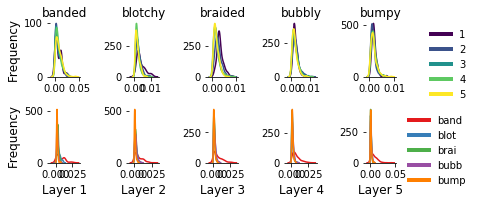

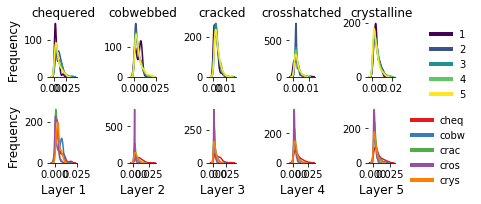

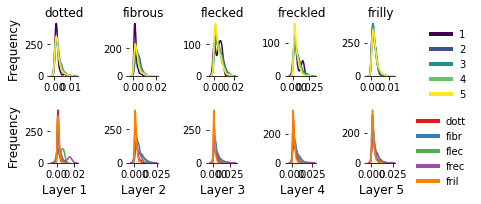

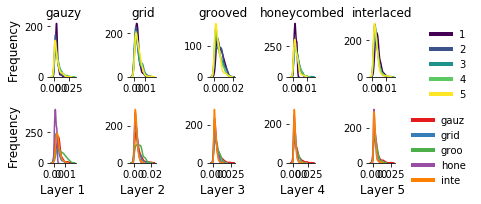

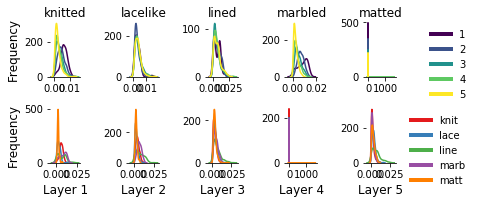

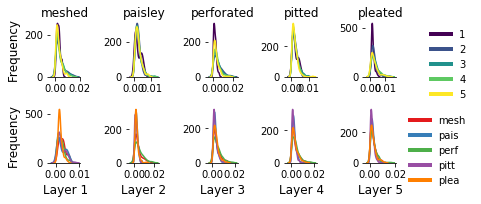

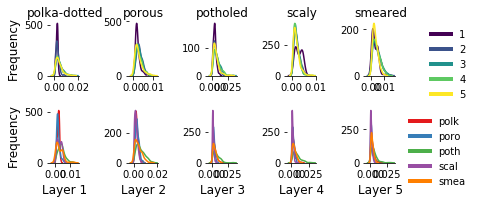

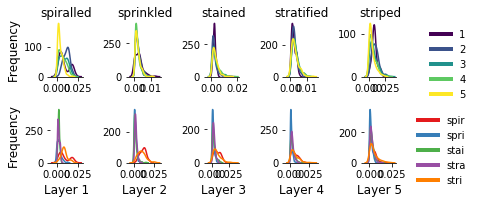

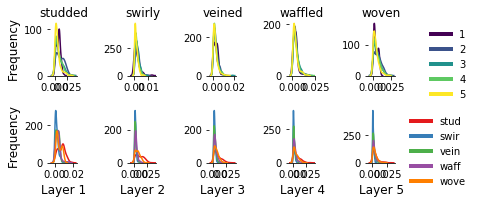

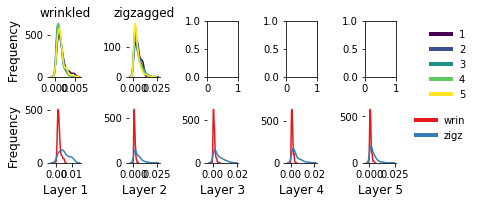

In [203]:
# Plot entropy all the histograms by category 

confusionMatrix = pd.read_csv(Path(os.path.join(storePath,os.path.splitext(modelName)[0]+"_confusionMatrix.csv")))
layers = [1,2,3,4,5]
for nbOfGraph in range (0,10):
    viridis = cm.get_cmap('viridis', 5)
    
    fig, axes = plt.subplots(2,6,figsize=(pageWidth,3))
    
    tab=pd.DataFrame({"layer":[], "decile":[], "category":[]})
    subcategories=categories[5*nbOfGraph:5+5*nbOfGraph]
    
    layerLegend=[]
    for layer in layers:
        layerLegend.append(Line2D([0], [0], color=viridis(layers.index(layer)/len(layers)), lw=4))
        for category in subcategories:
            ax_category=axes[0,subcategories.index(category)] # Specify the subplot object
            sns.distplot(confusionMatrix[(confusionMatrix["Layer"]==layer)&(confusionMatrix["category"]==category)].sort_values(by="mutualInfo", ascending=False)["mutualInfo"], 
                         ax=ax_category, 
                         color=viridis(layers.index(layer)/len(layers)),
                         bins=30, 
                         hist=False,
                        )
            sns.despine(ax=ax_category,top=True, right=True, left=True, bottom=False)
            ax_category.set_xlabel("%s" %category)
            ax_category.xaxis.set_ticks_position('bottom')
            ax_category.xaxis.set_label_position('top')
            #axes0,[0].text(baseLineNumbering[0],baseLineNumbering[1],"(a)", horizontalalignment='center',verticalalignment='center', transform=axes[0].transAxes)
        axes[0,0].set_ylabel("Frequency")
        axes[0,5].axis('off')
        axes[0,5].legend(layerLegend,layers,frameon=False)
    categoryLegend=[]
    for category in subcategories:
        categoryLegend.append(Line2D([0], [0], color=sns.color_palette("Set1", n_colors=len(layers))[subcategories.index(category)], lw=4))
        for layer in layers:
            ax_layer=axes[1,layers.index(layer)]
            sns.distplot(confusionMatrix[(confusionMatrix["Layer"]==layer)&(confusionMatrix["category"]==category)].sort_values(by="mutualInfo", ascending=False)["mutualInfo"], 
                         ax=ax_layer, 
                         bins=30,
                         hist=False,
                         color=sns.color_palette("Set1", n_colors=len(layers))[subcategories.index(category)],
                        )
            
            sns.despine(ax=ax_layer,top=True, right=True, left=True, bottom=False)
            axes[1,0].set_ylabel("Frequency")
            ax_layer.set_xlabel("Layer %i" %layer)
            #axes[j,0].text(baseLineNumbering[0],baseLineNumbering[1],"(a)", horizontalalignment='center',verticalalignment='center', transform=axes[0].transAxes)
        axes[1,5].axis('off')
        shortlist=[]
        for short in subcategories:
            shortlist.append(short[:4])
        axes[1,5].legend(categoryLegend,shortlist,frameon=False)
    
    plt.tight_layout()
    plt.show()
    plt.savefig(Path(os.path.join(figPath,os.path.splitext(modelName)[0]+"_mutualInfoLayers.pdf")))
    plt.close()

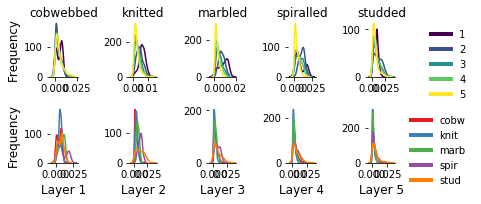

In [213]:
# Plot entropy the selected histograms by category 

confusionMatrix = pd.read_csv(Path(os.path.join(storePath,os.path.splitext(modelName)[0]+"_confusionMatrix.csv")))
layers = [1,2,3,4,5]
viridis = cm.get_cmap('viridis', 5)

fig, axes = plt.subplots(2,6,figsize=(pageWidth,3))

tab=pd.DataFrame({"layer":[], "decile":[], "category":[]})
subcategories=["cobwebbed","knitted","marbled","spiralled","studded"]

layerLegend=[]
for layer in layers:
    layerLegend.append(Line2D([0], [0], color=viridis(layers.index(layer)/len(layers)), lw=4))
    for category in subcategories:
        ax_category=axes[0,subcategories.index(category)] # Specify the subplot object
        sns.distplot(confusionMatrix[(confusionMatrix["Layer"]==layer)&(confusionMatrix["category"]==category)].sort_values(by="mutualInfo", ascending=False)["mutualInfo"], 
                     ax=ax_category, 
                     color=viridis(layers.index(layer)/len(layers)),
                     bins=30, 
                     hist=False,
                    )
        sns.despine(ax=ax_category,top=True, right=True, left=True, bottom=False)
        ax_category.set_xlabel("%s" %category)
        ax_category.xaxis.set_ticks_position('bottom')
        ax_category.xaxis.set_label_position('top')
        #axes0,[0].text(baseLineNumbering[0],baseLineNumbering[1],"(a)", horizontalalignment='center',verticalalignment='center', transform=axes[0].transAxes)
    axes[0,0].set_ylabel("Frequency")
    axes[0,5].axis('off')
    axes[0,5].legend(layerLegend,layers,frameon=False)
categoryLegend=[]
for category in subcategories:
    categoryLegend.append(Line2D([0], [0], color=sns.color_palette("Set1", n_colors=len(layers))[subcategories.index(category)], lw=4))
    for layer in layers:
        ax_layer=axes[1,layers.index(layer)]
        sns.distplot(confusionMatrix[(confusionMatrix["Layer"]==layer)&(confusionMatrix["category"]==category)].sort_values(by="mutualInfo", ascending=False)["mutualInfo"], 
                     ax=ax_layer, 
                     bins=30,
                     hist=False,
                     color=sns.color_palette("Set1", n_colors=len(layers))[subcategories.index(category)],
                    )
        
        sns.despine(ax=ax_layer,top=True, right=True, left=True, bottom=False)
        axes[1,0].set_ylabel("Frequency")
        ax_layer.set_xlabel("Layer %i" %layer)
        #axes[j,0].text(baseLineNumbering[0],baseLineNumbering[1],"(a)", horizontalalignment='center',verticalalignment='center', transform=axes[0].transAxes)
    axes[1,5].axis('off')
    shortlist=[]
    for short in subcategories:
        shortlist.append(short[:4])
    axes[1,5].legend(categoryLegend,shortlist,frameon=False)

plt.tight_layout()
plt.show()
plt.savefig(Path(os.path.join(figPath,os.path.splitext(modelName)[0]+"_mutualInfoLayersSelected.pdf")))
plt.close()

In [208]:
[subcategories.index(category)]

[4]

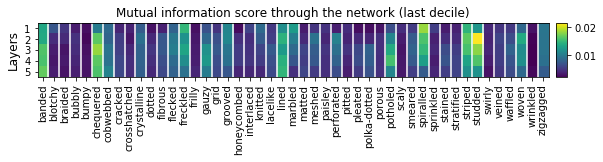

In [214]:
# Plot mutual information (last decile) through the Newkork (sorted) - Pandas version - DRAFT

#confusionMatrix = pd.read_csv(Path(os.path.join(storePath,os.path.splitext(modelName)[0]+"_confusionMatrix.csv")))

viridis = cm.get_cmap('viridis', 12)
fig, ax = plt.subplots(1,1,figsize=(pageWidth*2,1))
i=0.1
layers = [1,2,3,4,5]
tab=pd.DataFrame({"layer":[],"category":[], "decile":[], "category":[]})

for layer in layers:
    for category in categories:    
        tab=tab.append({"layer":layer, "category":category, "decile":np.percentile(confusionMatrix[(confusionMatrix["Layer"]==layer)&(confusionMatrix["category"]==category)]["mutualInfo"],np.arange(0,100,10))[9], "category":category},ignore_index=True)

x=[]
for layer in (layers):
    x1=tab[tab["layer"]==layer].sort_values(by="category", ascending=True)["decile"]
    x=np.append(x,x1,axis=0)
x=x.reshape(5,47)
g=x[:,np.argsort(x[0])]
im = ax.imshow(x)
ax.set_yticks(np.arange(0,len(layers)))
ax.set_yticklabels(layers)
ax.set_xticks(np.arange(len(categories)))
ax.set_xticklabels(tab[tab["layer"]==layer].sort_values(by="category", ascending=True)["category"])
ax.set_ylabel('Layers')
ax.set_title("Mutual information score through the network (last decile)")
ax.vlines(np.arange(-0.5,len(categories)-1), -.5, len(layers)-.5, 'w')
plt.setp(ax.get_xticklabels(), rotation=90, va="center", ha="right",
         rotation_mode="anchor")
cbar=fig.colorbar(im,ax=ax, pad=0.01, aspect=5, ticks=[0,0.01,0.02])
cbar.set_ticks([0,0.01,0.02])
cbar.set_ticklabels([0,0.01,0.02])

plt.show()
plt.savefig(Path(os.path.join(figPath,os.path.splitext(modelName)[0]+"_LastDecileMap.pdf")))
plt.close()

# train new model

In [215]:
## Parameters to specify
projectDirectory=Path("C:/Users/AQ62270/201910_ccn/NIPS/") # Project path
inputDirectory=Path("2_pipeline/store/") # Location of folders with pictures (in subfolders "nodefect" & "defect")
inputPath=Path(projectDirectory/inputDirectory) # Create the full path to the input pictures
#MODEL=Path(projectDirectory / "mod/") # Where to save the dataset
#LOG=Path(projectDirectory / "log/")
IMG_SIZE = 227 # has to fit with the value in "6_serialize_dataset"
outputDirectory=Path("2_pipeline/tmp/") # Location to save the models and logs
outputPath=Path(projectDirectory/outputDirectory) # Create the full path to the output pictures

# Define the design of experiments
DOE = pd.DataFrame({"dataset" : []}) # Create a dataframe to run the script in batch mode
#DOE = DOE.append({"dataset" : "1"},ignore_index=True)
DOE = DOE.append({"dataset" : "2"},ignore_index=True)
#DOE = DOE.append({"dataset" : "3"},ignore_index=True)
#DOE = DOE.append({"dataset" : "4"},ignore_index=True)
#DOE = DOE.append({"dataset" : "5"},ignore_index=True)
#DOE = DOE.append({"dataset" : "6"},ignore_index=True)
#DOE = DOE.append({"dataset" : "7"},ignore_index=True)
#DOE = DOE.append({"dataset" : "8"},ignore_index=True)
#DOE = DOE.append({"dataset" : "9"},ignore_index=True)
#DOE = DOE.append({"dataset" : "10"},ignore_index=True)

## Training the model
i = 0
while i < DOE.count()[0]:
    # File and folder locations
    trainDataLabel = pickle.load(open(Path(inputPath / os.path.join(DOE.iloc[i]["dataset"][0] + "_traindatalabel.pickle")),"rb"))
    valDataLabel = pickle.load(open(Path(inputPath / os.path.join(DOE.iloc[i]["dataset"][0] + "_valdatalabel.pickle")),"rb"))
    
    trainDataFeatures = pickle.load(open(Path(inputPath / os.path.join(DOE.iloc[i]["dataset"][0] + "_traindatafeatures.pickle")),"rb"))
    valDataFeatures = pickle.load(open(Path(inputPath / os.path.join(DOE.iloc[i]["dataset"][0] + "_valdatafeatures.pickle")),"rb"))

    ## Build the model: 
    model = Sequential()

    # 1st layer
    model.add(Conv2D(filters=96, 
                     input_shape=(IMG_SIZE,IMG_SIZE,3), 
                     kernel_size=(11,11), 
                     strides=(4,4), 
                     padding="valid", 
                     data_format="channels_last", 
                     name='conv1'
                    )
             )
    model.add(Activation('relu', name='activ1'))
    model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="valid", data_format="channels_last", name='pool1'))
    model.add(BatchNormalization(name='normal1'))

    # 2nd layer
    model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding="valid", data_format="channels_last", name='conv2'))
    model.add(Activation('relu', name='activ2'))
    model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="valid", data_format="channels_last", name='pool2'))
    model.add(BatchNormalization(name='normal2'))

    # 3rd layer
    model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding="valid", data_format="channels_last", name='conv3'))
    model.add(Activation('relu', name='activ3'))
    model.add(BatchNormalization(name='normal3'))

    # Passing it to a dense layer
    model.add(Flatten(name='flat1'))

    # 6th layer
    model.add(Dense(4096, 
                    input_shape=(IMG_SIZE*IMG_SIZE*3,), 
                    name='dense1'
                   )
             )
    
    model.add(Activation('relu', name='activ6'))
    model.add(Dropout(0.5, name='drop1')) #to prevent overfitting
    model.add(BatchNormalization())

    # 6th layer
    model.add(Dense(4096, name='dense2'))
    model.add(Activation('relu', name='activ7'))
    model.add(Dropout(0.5, name='drop2')) #to prevent overfitting
    model.add(BatchNormalization())

    # 7th layer
    model.add(Dense(4096, name='dense3'))
    model.add(Activation('relu', name='activ8'))
    model.add(Dropout(0.5, name='drop3'))
    model.add(BatchNormalization())

    # Output Layer
    model.add(Dense(47, name='dense4'))
    model.add(Activation('softmax', name='activ9'))

    #for i, layer in enumerate(model.layers): #To rename all layers
    #    layer.name = 'layer_' + str(i)

    model.summary()

    model.compile(  
        loss='sparse_categorical_crossentropy', # can be 'binary_crossentropy','sparse_categorical_crossentropy','categorical_crossentropy'
        optimizer='sgd', # can be'sgd' or 'adam'
        metrics=['accuracy'],
    )

    model.run_eagerly = False # To allow the use of callbacks tensorboard

    date=str(datetime.now().strftime("%Y%m%d_%H%M%S")) # Generate a unique name based on date and time to save the generated files 
    #savePath=Path(outputPath / date)
    #savePath.mkdir
    #modeldir=Path(MODEL / date)

    logpath=Path(outputPath / date)
    logpath.mkdir()

    tensorboard = keras.callbacks.TensorBoard(log_dir=logpath)
    
    hist=model.fit(trainDataFeatures, trainDataLabel, 
                   callbacks=[tensorboard],
              batch_size=64, # Number of images considered for each epoch
              epochs=500, # Number of runs to train the model
              verbose=1, #Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.
              #validation_split=0.1,
              validation_data=(valDataFeatures,valDataLabel), # Ratio trained/tested data
              shuffle=False, #whether to shuffle the training data before each epoch
             )
    #modeldir.mkdir()
    modelname=os.path.join(date + "_exp2_BS64_3layers.model")
    model.save(Path(outputPath / modelname))
    i += 1

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 55, 55, 96)        34944     
_________________________________________________________________
activ1 (Activation)          (None, 55, 55, 96)        0         
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 27, 27, 96)        0         
_________________________________________________________________
normal1 (BatchNormalization) (None, 27, 27, 96)        384       
_________________________________________________________________
conv2 (Conv2D)               (None, 23, 23, 256)       614656    
_________________________________________________________________
activ2 (Activation)          (None, 23, 23, 256)       0         
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 11, 11, 256)      

7520/7520 [==============================] - ETA: 5:03 - loss: 4.3667 - accuracy: 0.09 - ETA: 5:33 - loss: 4.3375 - accuracy: 0.07 - ETA: 5:44 - loss: 4.3645 - accuracy: 0.06 - ETA: 5:45 - loss: 4.3266 - accuracy: 0.07 - ETA: 5:44 - loss: 4.3670 - accuracy: 0.06 - ETA: 5:43 - loss: 4.3508 - accuracy: 0.05 - ETA: 5:33 - loss: 4.3887 - accuracy: 0.05 - ETA: 5:33 - loss: 4.3869 - accuracy: 0.05 - ETA: 5:32 - loss: 4.3996 - accuracy: 0.04 - ETA: 5:31 - loss: 4.3634 - accuracy: 0.05 - ETA: 5:29 - loss: 4.3351 - accuracy: 0.05 - ETA: 5:26 - loss: 4.3475 - accuracy: 0.05 - ETA: 5:20 - loss: 4.3455 - accuracy: 0.05 - ETA: 5:18 - loss: 4.3381 - accuracy: 0.05 - ETA: 5:13 - loss: 4.3258 - accuracy: 0.05 - ETA: 5:11 - loss: 4.3111 - accuracy: 0.05 - ETA: 5:05 - loss: 4.3167 - accuracy: 0.05 - ETA: 5:02 - loss: 4.3069 - accuracy: 0.05 - ETA: 4:57 - loss: 4.3223 - accuracy: 0.05 - ETA: 4:55 - loss: 4.3209 - accuracy: 0.05 - ETA: 4:53 - loss: 4.3158 - accuracy: 0.04 - ETA: 4:48 - loss: 4.2992 - accu

7520/7520 [==============================] - ETA: 5:55 - loss: 3.9842 - accuracy: 0.06 - ETA: 5:57 - loss: 3.9455 - accuracy: 0.07 - ETA: 5:56 - loss: 4.0831 - accuracy: 0.07 - ETA: 5:39 - loss: 4.0106 - accuracy: 0.08 - ETA: 5:38 - loss: 3.9911 - accuracy: 0.09 - ETA: 5:38 - loss: 3.9922 - accuracy: 0.09 - ETA: 5:37 - loss: 3.9890 - accuracy: 0.08 - ETA: 5:32 - loss: 4.0026 - accuracy: 0.08 - ETA: 5:24 - loss: 4.0036 - accuracy: 0.08 - ETA: 5:22 - loss: 3.9748 - accuracy: 0.09 - ETA: 5:18 - loss: 3.9679 - accuracy: 0.08 - ETA: 5:16 - loss: 3.9472 - accuracy: 0.08 - ETA: 5:14 - loss: 3.9356 - accuracy: 0.08 - ETA: 5:12 - loss: 3.9326 - accuracy: 0.08 - ETA: 5:10 - loss: 3.9387 - accuracy: 0.08 - ETA: 5:07 - loss: 3.9280 - accuracy: 0.09 - ETA: 5:05 - loss: 3.9269 - accuracy: 0.09 - ETA: 5:02 - loss: 3.9413 - accuracy: 0.08 - ETA: 4:59 - loss: 3.9471 - accuracy: 0.09 - ETA: 4:57 - loss: 3.9495 - accuracy: 0.09 - ETA: 4:55 - loss: 3.9545 - accuracy: 0.09 - ETA: 4:52 - loss: 3.9655 - accu

7520/7520 [==============================] - ETA: 6:03 - loss: 3.7839 - accuracy: 0.07 - ETA: 6:02 - loss: 3.7413 - accuracy: 0.07 - ETA: 5:53 - loss: 3.8240 - accuracy: 0.08 - ETA: 5:52 - loss: 3.8610 - accuracy: 0.08 - ETA: 5:41 - loss: 3.7838 - accuracy: 0.10 - ETA: 5:38 - loss: 3.8625 - accuracy: 0.10 - ETA: 5:27 - loss: 3.8745 - accuracy: 0.09 - ETA: 5:18 - loss: 3.8513 - accuracy: 0.09 - ETA: 5:11 - loss: 3.8549 - accuracy: 0.09 - ETA: 5:10 - loss: 3.8222 - accuracy: 0.10 - ETA: 5:10 - loss: 3.7789 - accuracy: 0.11 - ETA: 5:04 - loss: 3.7648 - accuracy: 0.11 - ETA: 5:03 - loss: 3.7427 - accuracy: 0.11 - ETA: 5:01 - loss: 3.7308 - accuracy: 0.11 - ETA: 4:59 - loss: 3.7356 - accuracy: 0.11 - ETA: 4:57 - loss: 3.7464 - accuracy: 0.11 - ETA: 4:55 - loss: 3.7366 - accuracy: 0.10 - ETA: 4:53 - loss: 3.7357 - accuracy: 0.11 - ETA: 4:48 - loss: 3.7294 - accuracy: 0.11 - ETA: 4:46 - loss: 3.7361 - accuracy: 0.10 - ETA: 4:41 - loss: 3.7427 - accuracy: 0.10 - ETA: 4:39 - loss: 3.7319 - accu

7520/7520 [==============================] - ETA: 4:57 - loss: 2.9827 - accuracy: 0.21 - ETA: 5:02 - loss: 3.2086 - accuracy: 0.19 - ETA: 5:17 - loss: 3.3988 - accuracy: 0.17 - ETA: 5:23 - loss: 3.4667 - accuracy: 0.15 - ETA: 5:27 - loss: 3.4640 - accuracy: 0.15 - ETA: 5:17 - loss: 3.5402 - accuracy: 0.15 - ETA: 5:19 - loss: 3.5246 - accuracy: 0.15 - ETA: 5:14 - loss: 3.5328 - accuracy: 0.14 - ETA: 5:14 - loss: 3.5481 - accuracy: 0.14 - ETA: 5:13 - loss: 3.5407 - accuracy: 0.13 - ETA: 5:12 - loss: 3.5317 - accuracy: 0.13 - ETA: 5:06 - loss: 3.5335 - accuracy: 0.13 - ETA: 5:04 - loss: 3.5402 - accuracy: 0.13 - ETA: 5:02 - loss: 3.5186 - accuracy: 0.14 - ETA: 4:57 - loss: 3.5046 - accuracy: 0.14 - ETA: 4:55 - loss: 3.4943 - accuracy: 0.14 - ETA: 4:53 - loss: 3.4893 - accuracy: 0.14 - ETA: 4:51 - loss: 3.4960 - accuracy: 0.14 - ETA: 4:49 - loss: 3.4959 - accuracy: 0.14 - ETA: 4:47 - loss: 3.5015 - accuracy: 0.14 - ETA: 4:44 - loss: 3.5099 - accuracy: 0.14 - ETA: 4:42 - loss: 3.4980 - accu

7520/7520 [==============================] - ETA: 4:55 - loss: 3.0729 - accuracy: 0.17 - ETA: 5:27 - loss: 3.2290 - accuracy: 0.14 - ETA: 5:33 - loss: 3.2830 - accuracy: 0.14 - ETA: 5:20 - loss: 3.2465 - accuracy: 0.16 - ETA: 5:25 - loss: 3.2337 - accuracy: 0.16 - ETA: 5:26 - loss: 3.2581 - accuracy: 0.16 - ETA: 5:27 - loss: 3.2768 - accuracy: 0.16 - ETA: 5:20 - loss: 3.2841 - accuracy: 0.17 - ETA: 5:19 - loss: 3.2971 - accuracy: 0.17 - ETA: 5:17 - loss: 3.3091 - accuracy: 0.17 - ETA: 5:11 - loss: 3.3142 - accuracy: 0.17 - ETA: 5:11 - loss: 3.3117 - accuracy: 0.16 - ETA: 5:05 - loss: 3.3147 - accuracy: 0.16 - ETA: 5:05 - loss: 3.2928 - accuracy: 0.16 - ETA: 5:03 - loss: 3.2960 - accuracy: 0.16 - ETA: 5:01 - loss: 3.2889 - accuracy: 0.16 - ETA: 4:59 - loss: 3.2789 - accuracy: 0.16 - ETA: 4:57 - loss: 3.2832 - accuracy: 0.16 - ETA: 4:52 - loss: 3.2723 - accuracy: 0.16 - ETA: 4:50 - loss: 3.2757 - accuracy: 0.16 - ETA: 4:48 - loss: 3.2778 - accuracy: 0.16 - ETA: 4:43 - loss: 3.2738 - accu

7520/7520 [==============================] - ETA: 5:10 - loss: 3.0205 - accuracy: 0.12 - ETA: 5:32 - loss: 3.2159 - accuracy: 0.11 - ETA: 5:38 - loss: 3.2838 - accuracy: 0.13 - ETA: 5:37 - loss: 3.2129 - accuracy: 0.14 - ETA: 5:36 - loss: 3.1571 - accuracy: 0.16 - ETA: 5:35 - loss: 3.2089 - accuracy: 0.16 - ETA: 5:33 - loss: 3.2214 - accuracy: 0.16 - ETA: 5:32 - loss: 3.2020 - accuracy: 0.16 - ETA: 5:29 - loss: 3.1769 - accuracy: 0.17 - ETA: 5:21 - loss: 3.1885 - accuracy: 0.17 - ETA: 5:19 - loss: 3.2057 - accuracy: 0.17 - ETA: 5:15 - loss: 3.2023 - accuracy: 0.17 - ETA: 5:14 - loss: 3.1905 - accuracy: 0.18 - ETA: 5:12 - loss: 3.1908 - accuracy: 0.17 - ETA: 5:10 - loss: 3.1852 - accuracy: 0.17 - ETA: 5:08 - loss: 3.1842 - accuracy: 0.17 - ETA: 5:05 - loss: 3.1558 - accuracy: 0.18 - ETA: 5:03 - loss: 3.1759 - accuracy: 0.18 - ETA: 5:00 - loss: 3.1756 - accuracy: 0.18 - ETA: 4:55 - loss: 3.1744 - accuracy: 0.18 - ETA: 4:52 - loss: 3.1791 - accuracy: 0.18 - ETA: 4:47 - loss: 3.1653 - accu

7520/7520 [==============================] - ETA: 5:10 - loss: 2.6747 - accuracy: 0.20 - ETA: 5:39 - loss: 2.9154 - accuracy: 0.19 - ETA: 5:20 - loss: 3.0565 - accuracy: 0.18 - ETA: 5:27 - loss: 3.0278 - accuracy: 0.18 - ETA: 5:31 - loss: 3.0238 - accuracy: 0.19 - ETA: 5:31 - loss: 3.0500 - accuracy: 0.19 - ETA: 5:29 - loss: 3.0177 - accuracy: 0.20 - ETA: 5:20 - loss: 3.0074 - accuracy: 0.20 - ETA: 5:14 - loss: 3.0289 - accuracy: 0.20 - ETA: 5:12 - loss: 3.0088 - accuracy: 0.21 - ETA: 5:12 - loss: 3.0157 - accuracy: 0.21 - ETA: 5:05 - loss: 3.0177 - accuracy: 0.21 - ETA: 5:03 - loss: 3.0162 - accuracy: 0.22 - ETA: 4:58 - loss: 3.0070 - accuracy: 0.21 - ETA: 4:57 - loss: 2.9802 - accuracy: 0.22 - ETA: 4:52 - loss: 2.9725 - accuracy: 0.22 - ETA: 4:50 - loss: 2.9640 - accuracy: 0.22 - ETA: 4:48 - loss: 2.9681 - accuracy: 0.22 - ETA: 4:47 - loss: 2.9698 - accuracy: 0.22 - ETA: 4:45 - loss: 2.9763 - accuracy: 0.22 - ETA: 4:43 - loss: 2.9798 - accuracy: 0.21 - ETA: 4:39 - loss: 2.9704 - accu

7520/7520 [==============================] - ETA: 5:58 - loss: 2.6952 - accuracy: 0.18 - ETA: 5:54 - loss: 2.7762 - accuracy: 0.25 - ETA: 5:52 - loss: 2.7836 - accuracy: 0.27 - ETA: 5:35 - loss: 2.7594 - accuracy: 0.27 - ETA: 5:37 - loss: 2.7340 - accuracy: 0.27 - ETA: 5:26 - loss: 2.7243 - accuracy: 0.27 - ETA: 5:26 - loss: 2.7302 - accuracy: 0.27 - ETA: 5:26 - loss: 2.7505 - accuracy: 0.26 - ETA: 5:25 - loss: 2.7624 - accuracy: 0.26 - ETA: 5:22 - loss: 2.7725 - accuracy: 0.25 - ETA: 5:21 - loss: 2.7921 - accuracy: 0.25 - ETA: 5:15 - loss: 2.7904 - accuracy: 0.25 - ETA: 5:13 - loss: 2.7925 - accuracy: 0.25 - ETA: 5:10 - loss: 2.8011 - accuracy: 0.25 - ETA: 5:07 - loss: 2.8015 - accuracy: 0.25 - ETA: 5:05 - loss: 2.7882 - accuracy: 0.25 - ETA: 5:03 - loss: 2.7808 - accuracy: 0.25 - ETA: 5:00 - loss: 2.7947 - accuracy: 0.25 - ETA: 4:58 - loss: 2.7996 - accuracy: 0.24 - ETA: 4:55 - loss: 2.8084 - accuracy: 0.24 - ETA: 4:52 - loss: 2.8192 - accuracy: 0.24 - ETA: 4:49 - loss: 2.8150 - accu

7520/7520 [==============================] - ETA: 5:58 - loss: 2.4947 - accuracy: 0.31 - ETA: 5:28 - loss: 2.5847 - accuracy: 0.32 - ETA: 5:36 - loss: 2.5451 - accuracy: 0.31 - ETA: 5:38 - loss: 2.5452 - accuracy: 0.31 - ETA: 5:39 - loss: 2.5414 - accuracy: 0.30 - ETA: 5:38 - loss: 2.5838 - accuracy: 0.29 - ETA: 5:38 - loss: 2.5804 - accuracy: 0.28 - ETA: 5:37 - loss: 2.5805 - accuracy: 0.28 - ETA: 5:28 - loss: 2.5734 - accuracy: 0.28 - ETA: 5:26 - loss: 2.5711 - accuracy: 0.28 - ETA: 5:19 - loss: 2.5627 - accuracy: 0.28 - ETA: 5:17 - loss: 2.5557 - accuracy: 0.29 - ETA: 5:15 - loss: 2.5540 - accuracy: 0.29 - ETA: 5:13 - loss: 2.5453 - accuracy: 0.29 - ETA: 5:11 - loss: 2.5349 - accuracy: 0.30 - ETA: 5:09 - loss: 2.5271 - accuracy: 0.30 - ETA: 5:07 - loss: 2.5221 - accuracy: 0.30 - ETA: 5:02 - loss: 2.5359 - accuracy: 0.30 - ETA: 5:00 - loss: 2.5359 - accuracy: 0.30 - ETA: 4:57 - loss: 2.5426 - accuracy: 0.30 - ETA: 4:54 - loss: 2.5457 - accuracy: 0.30 - ETA: 4:50 - loss: 2.5465 - accu

7520/7520 [==============================] - ETA: 5:53 - loss: 2.1436 - accuracy: 0.40 - ETA: 5:49 - loss: 2.3920 - accuracy: 0.35 - ETA: 5:48 - loss: 2.4515 - accuracy: 0.34 - ETA: 5:32 - loss: 2.4342 - accuracy: 0.33 - ETA: 5:25 - loss: 2.4838 - accuracy: 0.33 - ETA: 5:27 - loss: 2.5125 - accuracy: 0.33 - ETA: 5:18 - loss: 2.4990 - accuracy: 0.33 - ETA: 5:11 - loss: 2.4983 - accuracy: 0.33 - ETA: 5:12 - loss: 2.5240 - accuracy: 0.32 - ETA: 5:11 - loss: 2.5370 - accuracy: 0.31 - ETA: 5:05 - loss: 2.5451 - accuracy: 0.31 - ETA: 5:04 - loss: 2.5321 - accuracy: 0.31 - ETA: 4:59 - loss: 2.5245 - accuracy: 0.32 - ETA: 4:58 - loss: 2.5099 - accuracy: 0.32 - ETA: 4:57 - loss: 2.4865 - accuracy: 0.32 - ETA: 4:55 - loss: 2.4792 - accuracy: 0.32 - ETA: 4:54 - loss: 2.4658 - accuracy: 0.32 - ETA: 4:52 - loss: 2.4700 - accuracy: 0.32 - ETA: 4:50 - loss: 2.4876 - accuracy: 0.32 - ETA: 4:48 - loss: 2.4919 - accuracy: 0.32 - ETA: 4:46 - loss: 2.5015 - accuracy: 0.32 - ETA: 4:44 - loss: 2.4959 - accu

7520/7520 [==============================] - ETA: 4:55 - loss: 2.1913 - accuracy: 0.39 - ETA: 5:28 - loss: 2.4498 - accuracy: 0.32 - ETA: 5:18 - loss: 2.4053 - accuracy: 0.32 - ETA: 5:23 - loss: 2.4158 - accuracy: 0.31 - ETA: 5:28 - loss: 2.4068 - accuracy: 0.31 - ETA: 5:30 - loss: 2.4466 - accuracy: 0.30 - ETA: 5:30 - loss: 2.4035 - accuracy: 0.32 - ETA: 5:27 - loss: 2.3937 - accuracy: 0.32 - ETA: 5:20 - loss: 2.4092 - accuracy: 0.31 - ETA: 5:17 - loss: 2.3856 - accuracy: 0.32 - ETA: 5:15 - loss: 2.3871 - accuracy: 0.33 - ETA: 5:14 - loss: 2.3821 - accuracy: 0.33 - ETA: 5:12 - loss: 2.3610 - accuracy: 0.33 - ETA: 5:07 - loss: 2.3552 - accuracy: 0.33 - ETA: 5:04 - loss: 2.3588 - accuracy: 0.33 - ETA: 5:02 - loss: 2.3357 - accuracy: 0.34 - ETA: 5:01 - loss: 2.3308 - accuracy: 0.34 - ETA: 4:59 - loss: 2.3408 - accuracy: 0.34 - ETA: 4:57 - loss: 2.3394 - accuracy: 0.34 - ETA: 4:54 - loss: 2.3290 - accuracy: 0.34 - ETA: 4:52 - loss: 2.3239 - accuracy: 0.34 - ETA: 4:47 - loss: 2.3177 - accu

7520/7520 [==============================] - ETA: 5:13 - loss: 2.2485 - accuracy: 0.35 - ETA: 5:03 - loss: 2.1290 - accuracy: 0.40 - ETA: 5:19 - loss: 2.2079 - accuracy: 0.38 - ETA: 5:26 - loss: 2.1993 - accuracy: 0.37 - ETA: 5:30 - loss: 2.2333 - accuracy: 0.36 - ETA: 5:30 - loss: 2.2550 - accuracy: 0.35 - ETA: 5:22 - loss: 2.2346 - accuracy: 0.35 - ETA: 5:23 - loss: 2.2091 - accuracy: 0.36 - ETA: 5:22 - loss: 2.2467 - accuracy: 0.35 - ETA: 5:15 - loss: 2.2274 - accuracy: 0.37 - ETA: 5:13 - loss: 2.2104 - accuracy: 0.37 - ETA: 5:13 - loss: 2.1880 - accuracy: 0.38 - ETA: 5:08 - loss: 2.1839 - accuracy: 0.38 - ETA: 5:06 - loss: 2.1712 - accuracy: 0.38 - ETA: 5:01 - loss: 2.1604 - accuracy: 0.39 - ETA: 4:59 - loss: 2.1433 - accuracy: 0.39 - ETA: 4:57 - loss: 2.1380 - accuracy: 0.39 - ETA: 4:55 - loss: 2.1300 - accuracy: 0.39 - ETA: 4:53 - loss: 2.1333 - accuracy: 0.38 - ETA: 4:51 - loss: 2.1221 - accuracy: 0.39 - ETA: 4:49 - loss: 2.1148 - accuracy: 0.39 - ETA: 4:46 - loss: 2.1083 - accu

7520/7520 [==============================] - ETA: 5:03 - loss: 2.0065 - accuracy: 0.46 - ETA: 5:27 - loss: 2.1956 - accuracy: 0.37 - ETA: 5:17 - loss: 2.1703 - accuracy: 0.38 - ETA: 5:21 - loss: 2.1823 - accuracy: 0.39 - ETA: 5:26 - loss: 2.1161 - accuracy: 0.41 - ETA: 5:28 - loss: 2.1267 - accuracy: 0.41 - ETA: 5:22 - loss: 2.0926 - accuracy: 0.40 - ETA: 5:14 - loss: 2.0620 - accuracy: 0.41 - ETA: 5:15 - loss: 2.0689 - accuracy: 0.40 - ETA: 5:09 - loss: 2.0485 - accuracy: 0.40 - ETA: 5:08 - loss: 2.0650 - accuracy: 0.39 - ETA: 5:06 - loss: 2.0732 - accuracy: 0.39 - ETA: 5:05 - loss: 2.0558 - accuracy: 0.40 - ETA: 5:00 - loss: 2.0448 - accuracy: 0.40 - ETA: 4:58 - loss: 2.0319 - accuracy: 0.41 - ETA: 4:56 - loss: 2.0318 - accuracy: 0.41 - ETA: 4:55 - loss: 2.0106 - accuracy: 0.42 - ETA: 4:53 - loss: 2.0098 - accuracy: 0.41 - ETA: 4:50 - loss: 2.0167 - accuracy: 0.41 - ETA: 4:48 - loss: 2.0153 - accuracy: 0.41 - ETA: 4:46 - loss: 2.0067 - accuracy: 0.41 - ETA: 4:43 - loss: 1.9991 - accu

7520/7520 [==============================] - ETA: 5:57 - loss: 1.6594 - accuracy: 0.56 - ETA: 5:57 - loss: 2.0224 - accuracy: 0.45 - ETA: 5:55 - loss: 2.0756 - accuracy: 0.44 - ETA: 5:52 - loss: 2.0060 - accuracy: 0.44 - ETA: 5:48 - loss: 1.9776 - accuracy: 0.44 - ETA: 5:45 - loss: 1.9430 - accuracy: 0.43 - ETA: 5:40 - loss: 1.9017 - accuracy: 0.44 - ETA: 5:37 - loss: 1.8741 - accuracy: 0.45 - ETA: 5:34 - loss: 1.8970 - accuracy: 0.44 - ETA: 5:27 - loss: 1.9078 - accuracy: 0.45 - ETA: 5:25 - loss: 1.8997 - accuracy: 0.44 - ETA: 5:17 - loss: 1.8865 - accuracy: 0.45 - ETA: 5:15 - loss: 1.8642 - accuracy: 0.45 - ETA: 5:13 - loss: 1.8376 - accuracy: 0.46 - ETA: 5:11 - loss: 1.8328 - accuracy: 0.46 - ETA: 5:07 - loss: 1.8289 - accuracy: 0.46 - ETA: 5:05 - loss: 1.8219 - accuracy: 0.46 - ETA: 5:00 - loss: 1.8111 - accuracy: 0.46 - ETA: 4:55 - loss: 1.8025 - accuracy: 0.47 - ETA: 4:52 - loss: 1.8000 - accuracy: 0.47 - ETA: 4:49 - loss: 1.8039 - accuracy: 0.47 - ETA: 4:44 - loss: 1.8004 - accu

7520/7520 [==============================] - ETA: 5:05 - loss: 1.9255 - accuracy: 0.45 - ETA: 4:55 - loss: 1.9315 - accuracy: 0.42 - ETA: 4:57 - loss: 1.9791 - accuracy: 0.43 - ETA: 5:11 - loss: 1.9693 - accuracy: 0.43 - ETA: 5:07 - loss: 1.9201 - accuracy: 0.45 - ETA: 5:11 - loss: 1.8875 - accuracy: 0.46 - ETA: 5:07 - loss: 1.8813 - accuracy: 0.46 - ETA: 5:09 - loss: 1.8733 - accuracy: 0.46 - ETA: 5:04 - loss: 1.8804 - accuracy: 0.45 - ETA: 5:04 - loss: 1.8401 - accuracy: 0.47 - ETA: 5:00 - loss: 1.8259 - accuracy: 0.47 - ETA: 4:59 - loss: 1.7951 - accuracy: 0.48 - ETA: 4:58 - loss: 1.7913 - accuracy: 0.48 - ETA: 4:57 - loss: 1.7790 - accuracy: 0.48 - ETA: 4:56 - loss: 1.7540 - accuracy: 0.49 - ETA: 4:55 - loss: 1.7381 - accuracy: 0.49 - ETA: 4:53 - loss: 1.7147 - accuracy: 0.50 - ETA: 4:51 - loss: 1.7147 - accuracy: 0.50 - ETA: 4:47 - loss: 1.7205 - accuracy: 0.49 - ETA: 4:44 - loss: 1.7261 - accuracy: 0.49 - ETA: 4:42 - loss: 1.7162 - accuracy: 0.50 - ETA: 4:40 - loss: 1.7037 - accu

7520/7520 [==============================] - ETA: 5:53 - loss: 1.6741 - accuracy: 0.53 - ETA: 5:51 - loss: 1.6972 - accuracy: 0.51 - ETA: 5:54 - loss: 1.6884 - accuracy: 0.48 - ETA: 5:50 - loss: 1.6986 - accuracy: 0.49 - ETA: 5:35 - loss: 1.6759 - accuracy: 0.49 - ETA: 5:33 - loss: 1.6671 - accuracy: 0.50 - ETA: 5:33 - loss: 1.6643 - accuracy: 0.50 - ETA: 5:26 - loss: 1.6639 - accuracy: 0.50 - ETA: 5:19 - loss: 1.6670 - accuracy: 0.50 - ETA: 5:18 - loss: 1.6738 - accuracy: 0.50 - ETA: 5:13 - loss: 1.6695 - accuracy: 0.50 - ETA: 5:12 - loss: 1.6413 - accuracy: 0.51 - ETA: 5:11 - loss: 1.6247 - accuracy: 0.52 - ETA: 5:08 - loss: 1.6188 - accuracy: 0.52 - ETA: 5:05 - loss: 1.6034 - accuracy: 0.53 - ETA: 5:01 - loss: 1.5907 - accuracy: 0.53 - ETA: 4:56 - loss: 1.5868 - accuracy: 0.53 - ETA: 4:55 - loss: 1.5847 - accuracy: 0.53 - ETA: 4:52 - loss: 1.5797 - accuracy: 0.53 - ETA: 4:50 - loss: 1.5757 - accuracy: 0.53 - ETA: 4:46 - loss: 1.5737 - accuracy: 0.53 - ETA: 4:43 - loss: 1.5642 - accu

7520/7520 [==============================] - ETA: 5:57 - loss: 1.2850 - accuracy: 0.64 - ETA: 5:53 - loss: 1.3278 - accuracy: 0.64 - ETA: 5:53 - loss: 1.3981 - accuracy: 0.64 - ETA: 5:49 - loss: 1.4115 - accuracy: 0.62 - ETA: 5:36 - loss: 1.3777 - accuracy: 0.63 - ETA: 5:35 - loss: 1.3880 - accuracy: 0.62 - ETA: 5:25 - loss: 1.4177 - accuracy: 0.61 - ETA: 5:23 - loss: 1.4136 - accuracy: 0.60 - ETA: 5:16 - loss: 1.4414 - accuracy: 0.58 - ETA: 5:13 - loss: 1.4484 - accuracy: 0.58 - ETA: 5:13 - loss: 1.4504 - accuracy: 0.57 - ETA: 5:12 - loss: 1.4266 - accuracy: 0.57 - ETA: 5:11 - loss: 1.4324 - accuracy: 0.58 - ETA: 5:09 - loss: 1.4201 - accuracy: 0.58 - ETA: 5:04 - loss: 1.4068 - accuracy: 0.59 - ETA: 5:02 - loss: 1.3929 - accuracy: 0.59 - ETA: 4:57 - loss: 1.3823 - accuracy: 0.59 - ETA: 4:54 - loss: 1.4011 - accuracy: 0.59 - ETA: 4:49 - loss: 1.4063 - accuracy: 0.59 - ETA: 4:48 - loss: 1.4091 - accuracy: 0.58 - ETA: 4:45 - loss: 1.4009 - accuracy: 0.59 - ETA: 4:41 - loss: 1.3906 - accu

7520/7520 [==============================] - ETA: 5:16 - loss: 1.5827 - accuracy: 0.54 - ETA: 5:04 - loss: 1.5687 - accuracy: 0.52 - ETA: 5:23 - loss: 1.5257 - accuracy: 0.54 - ETA: 5:28 - loss: 1.4564 - accuracy: 0.57 - ETA: 5:21 - loss: 1.4306 - accuracy: 0.58 - ETA: 5:25 - loss: 1.4087 - accuracy: 0.59 - ETA: 5:27 - loss: 1.3726 - accuracy: 0.60 - ETA: 5:25 - loss: 1.3441 - accuracy: 0.62 - ETA: 5:25 - loss: 1.3261 - accuracy: 0.61 - ETA: 5:18 - loss: 1.3368 - accuracy: 0.60 - ETA: 5:11 - loss: 1.3383 - accuracy: 0.60 - ETA: 5:10 - loss: 1.3279 - accuracy: 0.60 - ETA: 5:07 - loss: 1.3048 - accuracy: 0.61 - ETA: 5:06 - loss: 1.2789 - accuracy: 0.62 - ETA: 5:04 - loss: 1.2706 - accuracy: 0.62 - ETA: 4:59 - loss: 1.2662 - accuracy: 0.62 - ETA: 4:57 - loss: 1.2631 - accuracy: 0.62 - ETA: 4:52 - loss: 1.2601 - accuracy: 0.62 - ETA: 4:50 - loss: 1.2620 - accuracy: 0.62 - ETA: 4:46 - loss: 1.2612 - accuracy: 0.62 - ETA: 4:41 - loss: 1.2611 - accuracy: 0.62 - ETA: 4:39 - loss: 1.2552 - accu

7520/7520 [==============================] - ETA: 5:53 - loss: 1.1901 - accuracy: 0.67 - ETA: 5:57 - loss: 1.2391 - accuracy: 0.64 - ETA: 5:41 - loss: 1.3150 - accuracy: 0.62 - ETA: 5:42 - loss: 1.2426 - accuracy: 0.64 - ETA: 5:43 - loss: 1.2398 - accuracy: 0.64 - ETA: 5:42 - loss: 1.2372 - accuracy: 0.64 - ETA: 5:38 - loss: 1.2567 - accuracy: 0.63 - ETA: 5:35 - loss: 1.2416 - accuracy: 0.63 - ETA: 5:28 - loss: 1.2342 - accuracy: 0.64 - ETA: 5:21 - loss: 1.2189 - accuracy: 0.64 - ETA: 5:19 - loss: 1.2198 - accuracy: 0.64 - ETA: 5:18 - loss: 1.2082 - accuracy: 0.64 - ETA: 5:15 - loss: 1.1853 - accuracy: 0.65 - ETA: 5:13 - loss: 1.1641 - accuracy: 0.66 - ETA: 5:07 - loss: 1.1518 - accuracy: 0.66 - ETA: 5:05 - loss: 1.1351 - accuracy: 0.66 - ETA: 5:03 - loss: 1.1200 - accuracy: 0.67 - ETA: 5:00 - loss: 1.1191 - accuracy: 0.67 - ETA: 4:58 - loss: 1.1289 - accuracy: 0.66 - ETA: 4:55 - loss: 1.1257 - accuracy: 0.66 - ETA: 4:53 - loss: 1.1269 - accuracy: 0.66 - ETA: 4:50 - loss: 1.1124 - accu

7520/7520 [==============================] - ETA: 5:57 - loss: 1.2124 - accuracy: 0.64 - ETA: 5:31 - loss: 1.2068 - accuracy: 0.63 - ETA: 5:17 - loss: 1.2026 - accuracy: 0.61 - ETA: 5:12 - loss: 1.2198 - accuracy: 0.61 - ETA: 5:19 - loss: 1.1790 - accuracy: 0.63 - ETA: 5:21 - loss: 1.1541 - accuracy: 0.64 - ETA: 5:15 - loss: 1.1189 - accuracy: 0.65 - ETA: 5:17 - loss: 1.0837 - accuracy: 0.67 - ETA: 5:18 - loss: 1.0625 - accuracy: 0.67 - ETA: 5:17 - loss: 1.0605 - accuracy: 0.67 - ETA: 5:15 - loss: 1.0445 - accuracy: 0.68 - ETA: 5:13 - loss: 1.0320 - accuracy: 0.68 - ETA: 5:12 - loss: 1.0462 - accuracy: 0.67 - ETA: 5:09 - loss: 1.0403 - accuracy: 0.67 - ETA: 5:07 - loss: 1.0354 - accuracy: 0.68 - ETA: 5:02 - loss: 1.0262 - accuracy: 0.69 - ETA: 4:58 - loss: 1.0193 - accuracy: 0.69 - ETA: 4:55 - loss: 1.0123 - accuracy: 0.70 - ETA: 4:53 - loss: 1.0161 - accuracy: 0.69 - ETA: 4:51 - loss: 1.0089 - accuracy: 0.70 - ETA: 4:47 - loss: 1.0093 - accuracy: 0.69 - ETA: 4:44 - loss: 1.0053 - accu

7520/7520 [==============================] - ETA: 6:06 - loss: 0.9845 - accuracy: 0.75 - ETA: 5:51 - loss: 0.9213 - accuracy: 0.75 - ETA: 5:35 - loss: 0.9636 - accuracy: 0.72 - ETA: 5:39 - loss: 0.9719 - accuracy: 0.71 - ETA: 5:28 - loss: 0.9883 - accuracy: 0.71 - ETA: 5:32 - loss: 1.0013 - accuracy: 0.71 - ETA: 5:29 - loss: 0.9833 - accuracy: 0.72 - ETA: 5:27 - loss: 0.9756 - accuracy: 0.71 - ETA: 5:27 - loss: 0.9590 - accuracy: 0.71 - ETA: 5:25 - loss: 0.9434 - accuracy: 0.72 - ETA: 5:23 - loss: 0.9404 - accuracy: 0.72 - ETA: 5:21 - loss: 0.9235 - accuracy: 0.73 - ETA: 5:15 - loss: 0.9206 - accuracy: 0.73 - ETA: 5:12 - loss: 0.8954 - accuracy: 0.73 - ETA: 5:10 - loss: 0.8894 - accuracy: 0.74 - ETA: 5:08 - loss: 0.8800 - accuracy: 0.74 - ETA: 5:05 - loss: 0.8642 - accuracy: 0.75 - ETA: 5:01 - loss: 0.8595 - accuracy: 0.75 - ETA: 4:58 - loss: 0.8557 - accuracy: 0.75 - ETA: 4:53 - loss: 0.8472 - accuracy: 0.75 - ETA: 4:48 - loss: 0.8449 - accuracy: 0.75 - ETA: 4:44 - loss: 0.8318 - accu

7520/7520 [==============================] - ETA: 5:56 - loss: 0.8188 - accuracy: 0.78 - ETA: 5:58 - loss: 0.8880 - accuracy: 0.72 - ETA: 5:53 - loss: 0.9136 - accuracy: 0.71 - ETA: 5:51 - loss: 0.9166 - accuracy: 0.71 - ETA: 5:49 - loss: 0.8997 - accuracy: 0.72 - ETA: 5:47 - loss: 0.8698 - accuracy: 0.73 - ETA: 5:45 - loss: 0.8702 - accuracy: 0.72 - ETA: 5:41 - loss: 0.8633 - accuracy: 0.72 - ETA: 5:31 - loss: 0.8616 - accuracy: 0.72 - ETA: 5:30 - loss: 0.8567 - accuracy: 0.72 - ETA: 5:23 - loss: 0.8417 - accuracy: 0.73 - ETA: 5:20 - loss: 0.8415 - accuracy: 0.73 - ETA: 5:18 - loss: 0.8251 - accuracy: 0.74 - ETA: 5:16 - loss: 0.8111 - accuracy: 0.74 - ETA: 5:13 - loss: 0.8078 - accuracy: 0.74 - ETA: 5:08 - loss: 0.7926 - accuracy: 0.75 - ETA: 5:03 - loss: 0.7820 - accuracy: 0.75 - ETA: 5:01 - loss: 0.7730 - accuracy: 0.76 - ETA: 4:59 - loss: 0.7666 - accuracy: 0.76 - ETA: 4:56 - loss: 0.7638 - accuracy: 0.76 - ETA: 4:51 - loss: 0.7656 - accuracy: 0.76 - ETA: 4:46 - loss: 0.7547 - accu

7520/7520 [==============================] - ETA: 5:20 - loss: 0.7923 - accuracy: 0.73 - ETA: 5:49 - loss: 0.7250 - accuracy: 0.79 - ETA: 5:32 - loss: 0.7053 - accuracy: 0.80 - ETA: 5:34 - loss: 0.7288 - accuracy: 0.78 - ETA: 5:37 - loss: 0.7174 - accuracy: 0.78 - ETA: 5:37 - loss: 0.7340 - accuracy: 0.78 - ETA: 5:36 - loss: 0.7348 - accuracy: 0.77 - ETA: 5:33 - loss: 0.7126 - accuracy: 0.77 - ETA: 5:31 - loss: 0.7036 - accuracy: 0.78 - ETA: 5:29 - loss: 0.6876 - accuracy: 0.78 - ETA: 5:26 - loss: 0.6737 - accuracy: 0.79 - ETA: 5:24 - loss: 0.6771 - accuracy: 0.78 - ETA: 5:22 - loss: 0.6732 - accuracy: 0.78 - ETA: 5:20 - loss: 0.6594 - accuracy: 0.79 - ETA: 5:17 - loss: 0.6725 - accuracy: 0.79 - ETA: 5:14 - loss: 0.6757 - accuracy: 0.79 - ETA: 5:08 - loss: 0.6640 - accuracy: 0.80 - ETA: 5:05 - loss: 0.6787 - accuracy: 0.79 - ETA: 5:02 - loss: 0.6747 - accuracy: 0.79 - ETA: 5:00 - loss: 0.6736 - accuracy: 0.79 - ETA: 4:57 - loss: 0.6708 - accuracy: 0.79 - ETA: 4:54 - loss: 0.6645 - accu

7520/7520 [==============================] - ETA: 5:51 - loss: 0.6129 - accuracy: 0.85 - ETA: 5:27 - loss: 0.5732 - accuracy: 0.83 - ETA: 5:28 - loss: 0.6707 - accuracy: 0.79 - ETA: 5:20 - loss: 0.6439 - accuracy: 0.81 - ETA: 5:22 - loss: 0.6411 - accuracy: 0.80 - ETA: 5:24 - loss: 0.6385 - accuracy: 0.81 - ETA: 5:24 - loss: 0.6456 - accuracy: 0.81 - ETA: 5:23 - loss: 0.6259 - accuracy: 0.82 - ETA: 5:23 - loss: 0.6307 - accuracy: 0.81 - ETA: 5:20 - loss: 0.6183 - accuracy: 0.82 - ETA: 5:19 - loss: 0.6118 - accuracy: 0.82 - ETA: 5:13 - loss: 0.5989 - accuracy: 0.82 - ETA: 5:11 - loss: 0.5898 - accuracy: 0.83 - ETA: 5:05 - loss: 0.5801 - accuracy: 0.83 - ETA: 5:04 - loss: 0.5847 - accuracy: 0.83 - ETA: 5:01 - loss: 0.5774 - accuracy: 0.83 - ETA: 5:00 - loss: 0.5720 - accuracy: 0.83 - ETA: 4:55 - loss: 0.5731 - accuracy: 0.83 - ETA: 4:53 - loss: 0.5688 - accuracy: 0.83 - ETA: 4:50 - loss: 0.5728 - accuracy: 0.83 - ETA: 4:48 - loss: 0.5714 - accuracy: 0.83 - ETA: 4:43 - loss: 0.5705 - accu

7520/7520 [==============================] - ETA: 6:02 - loss: 0.4777 - accuracy: 0.87 - ETA: 5:58 - loss: 0.5171 - accuracy: 0.85 - ETA: 5:56 - loss: 0.4978 - accuracy: 0.84 - ETA: 5:37 - loss: 0.5495 - accuracy: 0.82 - ETA: 5:37 - loss: 0.5365 - accuracy: 0.82 - ETA: 5:34 - loss: 0.5399 - accuracy: 0.81 - ETA: 5:32 - loss: 0.5422 - accuracy: 0.82 - ETA: 5:23 - loss: 0.5401 - accuracy: 0.82 - ETA: 5:21 - loss: 0.5402 - accuracy: 0.83 - ETA: 5:20 - loss: 0.5235 - accuracy: 0.83 - ETA: 5:19 - loss: 0.5157 - accuracy: 0.84 - ETA: 5:18 - loss: 0.5008 - accuracy: 0.84 - ETA: 5:12 - loss: 0.4937 - accuracy: 0.85 - ETA: 5:07 - loss: 0.4914 - accuracy: 0.85 - ETA: 5:05 - loss: 0.4887 - accuracy: 0.85 - ETA: 5:03 - loss: 0.4769 - accuracy: 0.85 - ETA: 5:01 - loss: 0.4726 - accuracy: 0.86 - ETA: 4:59 - loss: 0.4681 - accuracy: 0.86 - ETA: 4:54 - loss: 0.4660 - accuracy: 0.86 - ETA: 4:52 - loss: 0.4682 - accuracy: 0.85 - ETA: 4:47 - loss: 0.4676 - accuracy: 0.85 - ETA: 4:43 - loss: 0.4664 - accu

7520/7520 [==============================] - ETA: 5:08 - loss: 0.7384 - accuracy: 0.81 - ETA: 5:34 - loss: 0.6182 - accuracy: 0.82 - ETA: 5:19 - loss: 0.5859 - accuracy: 0.83 - ETA: 5:22 - loss: 0.5749 - accuracy: 0.83 - ETA: 5:17 - loss: 0.5456 - accuracy: 0.84 - ETA: 5:19 - loss: 0.5200 - accuracy: 0.85 - ETA: 5:20 - loss: 0.5030 - accuracy: 0.86 - ETA: 5:21 - loss: 0.5096 - accuracy: 0.86 - ETA: 5:20 - loss: 0.5180 - accuracy: 0.85 - ETA: 5:20 - loss: 0.5092 - accuracy: 0.85 - ETA: 5:18 - loss: 0.5087 - accuracy: 0.85 - ETA: 5:12 - loss: 0.5071 - accuracy: 0.85 - ETA: 5:10 - loss: 0.4947 - accuracy: 0.85 - ETA: 5:08 - loss: 0.4867 - accuracy: 0.86 - ETA: 5:06 - loss: 0.4853 - accuracy: 0.86 - ETA: 5:01 - loss: 0.4745 - accuracy: 0.86 - ETA: 4:59 - loss: 0.4651 - accuracy: 0.86 - ETA: 4:57 - loss: 0.4560 - accuracy: 0.87 - ETA: 4:52 - loss: 0.4492 - accuracy: 0.87 - ETA: 4:49 - loss: 0.4463 - accuracy: 0.87 - ETA: 4:47 - loss: 0.4471 - accuracy: 0.87 - ETA: 4:44 - loss: 0.4428 - accu

7520/7520 [==============================] - ETA: 6:09 - loss: 0.4306 - accuracy: 0.84 - ETA: 6:03 - loss: 0.4230 - accuracy: 0.85 - ETA: 6:01 - loss: 0.4381 - accuracy: 0.84 - ETA: 5:42 - loss: 0.4381 - accuracy: 0.85 - ETA: 5:29 - loss: 0.4293 - accuracy: 0.86 - ETA: 5:30 - loss: 0.4310 - accuracy: 0.86 - ETA: 5:31 - loss: 0.4393 - accuracy: 0.86 - ETA: 5:30 - loss: 0.4253 - accuracy: 0.87 - ETA: 5:29 - loss: 0.4275 - accuracy: 0.87 - ETA: 5:26 - loss: 0.4103 - accuracy: 0.88 - ETA: 5:25 - loss: 0.4084 - accuracy: 0.88 - ETA: 5:18 - loss: 0.3968 - accuracy: 0.88 - ETA: 5:15 - loss: 0.3909 - accuracy: 0.88 - ETA: 5:09 - loss: 0.3877 - accuracy: 0.88 - ETA: 5:08 - loss: 0.3812 - accuracy: 0.88 - ETA: 5:05 - loss: 0.3713 - accuracy: 0.89 - ETA: 5:00 - loss: 0.3676 - accuracy: 0.89 - ETA: 4:58 - loss: 0.3687 - accuracy: 0.89 - ETA: 4:56 - loss: 0.3655 - accuracy: 0.89 - ETA: 4:54 - loss: 0.3655 - accuracy: 0.89 - ETA: 4:49 - loss: 0.3650 - accuracy: 0.89 - ETA: 4:46 - loss: 0.3671 - accu

7520/7520 [==============================] - ETA: 6:11 - loss: 0.7207 - accuracy: 0.75 - ETA: 5:33 - loss: 0.5826 - accuracy: 0.80 - ETA: 5:38 - loss: 0.4799 - accuracy: 0.83 - ETA: 5:41 - loss: 0.4537 - accuracy: 0.84 - ETA: 5:42 - loss: 0.4283 - accuracy: 0.85 - ETA: 5:30 - loss: 0.4250 - accuracy: 0.86 - ETA: 5:27 - loss: 0.4131 - accuracy: 0.86 - ETA: 5:26 - loss: 0.4152 - accuracy: 0.86 - ETA: 5:20 - loss: 0.4089 - accuracy: 0.86 - ETA: 5:13 - loss: 0.3956 - accuracy: 0.86 - ETA: 5:07 - loss: 0.3858 - accuracy: 0.87 - ETA: 5:07 - loss: 0.3774 - accuracy: 0.87 - ETA: 5:01 - loss: 0.3722 - accuracy: 0.87 - ETA: 4:59 - loss: 0.3663 - accuracy: 0.87 - ETA: 4:58 - loss: 0.3625 - accuracy: 0.87 - ETA: 4:53 - loss: 0.3548 - accuracy: 0.88 - ETA: 4:51 - loss: 0.3532 - accuracy: 0.88 - ETA: 4:46 - loss: 0.3531 - accuracy: 0.88 - ETA: 4:44 - loss: 0.3591 - accuracy: 0.88 - ETA: 4:42 - loss: 0.3601 - accuracy: 0.88 - ETA: 4:41 - loss: 0.3610 - accuracy: 0.88 - ETA: 4:38 - loss: 0.3593 - accu

7520/7520 [==============================] - ETA: 5:52 - loss: 0.3047 - accuracy: 0.95 - ETA: 5:52 - loss: 0.3445 - accuracy: 0.92 - ETA: 5:34 - loss: 0.3874 - accuracy: 0.89 - ETA: 5:38 - loss: 0.3676 - accuracy: 0.90 - ETA: 5:39 - loss: 0.3561 - accuracy: 0.90 - ETA: 5:38 - loss: 0.3438 - accuracy: 0.90 - ETA: 5:33 - loss: 0.3459 - accuracy: 0.90 - ETA: 5:32 - loss: 0.3289 - accuracy: 0.91 - ETA: 5:31 - loss: 0.3295 - accuracy: 0.90 - ETA: 5:23 - loss: 0.3218 - accuracy: 0.91 - ETA: 5:22 - loss: 0.3170 - accuracy: 0.90 - ETA: 5:18 - loss: 0.3140 - accuracy: 0.90 - ETA: 5:12 - loss: 0.3102 - accuracy: 0.90 - ETA: 5:09 - loss: 0.3151 - accuracy: 0.90 - ETA: 5:04 - loss: 0.3183 - accuracy: 0.90 - ETA: 4:58 - loss: 0.3105 - accuracy: 0.90 - ETA: 4:57 - loss: 0.3056 - accuracy: 0.91 - ETA: 4:54 - loss: 0.3129 - accuracy: 0.90 - ETA: 4:51 - loss: 0.3085 - accuracy: 0.91 - ETA: 4:49 - loss: 0.3137 - accuracy: 0.91 - ETA: 4:44 - loss: 0.3214 - accuracy: 0.91 - ETA: 4:41 - loss: 0.3179 - accu

7520/7520 [==============================] - ETA: 5:10 - loss: 0.3093 - accuracy: 0.92 - ETA: 5:32 - loss: 0.3268 - accuracy: 0.91 - ETA: 5:39 - loss: 0.3082 - accuracy: 0.91 - ETA: 5:37 - loss: 0.3224 - accuracy: 0.91 - ETA: 5:36 - loss: 0.2983 - accuracy: 0.92 - ETA: 5:24 - loss: 0.2918 - accuracy: 0.91 - ETA: 5:16 - loss: 0.2910 - accuracy: 0.91 - ETA: 5:09 - loss: 0.2796 - accuracy: 0.92 - ETA: 5:03 - loss: 0.3046 - accuracy: 0.91 - ETA: 5:03 - loss: 0.2984 - accuracy: 0.91 - ETA: 5:03 - loss: 0.2900 - accuracy: 0.91 - ETA: 5:04 - loss: 0.2815 - accuracy: 0.92 - ETA: 5:03 - loss: 0.2844 - accuracy: 0.92 - ETA: 5:02 - loss: 0.2756 - accuracy: 0.92 - ETA: 5:01 - loss: 0.2734 - accuracy: 0.92 - ETA: 5:00 - loss: 0.2627 - accuracy: 0.93 - ETA: 4:56 - loss: 0.2666 - accuracy: 0.93 - ETA: 4:54 - loss: 0.2656 - accuracy: 0.93 - ETA: 4:52 - loss: 0.2712 - accuracy: 0.93 - ETA: 4:48 - loss: 0.2685 - accuracy: 0.93 - ETA: 4:45 - loss: 0.2681 - accuracy: 0.93 - ETA: 4:43 - loss: 0.2629 - accu

7520/7520 [==============================] - ETA: 6:04 - loss: 0.3592 - accuracy: 0.90 - ETA: 5:57 - loss: 0.3115 - accuracy: 0.92 - ETA: 5:57 - loss: 0.2812 - accuracy: 0.93 - ETA: 5:54 - loss: 0.2475 - accuracy: 0.94 - ETA: 5:52 - loss: 0.2401 - accuracy: 0.94 - ETA: 5:40 - loss: 0.2570 - accuracy: 0.94 - ETA: 5:37 - loss: 0.2716 - accuracy: 0.93 - ETA: 5:34 - loss: 0.2626 - accuracy: 0.93 - ETA: 5:31 - loss: 0.2579 - accuracy: 0.93 - ETA: 5:24 - loss: 0.2454 - accuracy: 0.94 - ETA: 5:22 - loss: 0.2364 - accuracy: 0.94 - ETA: 5:15 - loss: 0.2245 - accuracy: 0.94 - ETA: 5:13 - loss: 0.2161 - accuracy: 0.94 - ETA: 5:10 - loss: 0.2096 - accuracy: 0.95 - ETA: 5:08 - loss: 0.2083 - accuracy: 0.95 - ETA: 5:06 - loss: 0.2094 - accuracy: 0.95 - ETA: 5:03 - loss: 0.2130 - accuracy: 0.94 - ETA: 5:00 - loss: 0.2175 - accuracy: 0.94 - ETA: 4:58 - loss: 0.2195 - accuracy: 0.94 - ETA: 4:55 - loss: 0.2207 - accuracy: 0.94 - ETA: 4:52 - loss: 0.2196 - accuracy: 0.94 - ETA: 4:47 - loss: 0.2187 - accu

7520/7520 [==============================] - ETA: 5:55 - loss: 0.1631 - accuracy: 0.95 - ETA: 5:50 - loss: 0.2218 - accuracy: 0.92 - ETA: 5:50 - loss: 0.2280 - accuracy: 0.93 - ETA: 5:50 - loss: 0.2102 - accuracy: 0.94 - ETA: 5:48 - loss: 0.2075 - accuracy: 0.95 - ETA: 5:36 - loss: 0.2048 - accuracy: 0.95 - ETA: 5:27 - loss: 0.2067 - accuracy: 0.94 - ETA: 5:26 - loss: 0.2121 - accuracy: 0.94 - ETA: 5:24 - loss: 0.2111 - accuracy: 0.94 - ETA: 5:18 - loss: 0.2130 - accuracy: 0.94 - ETA: 5:16 - loss: 0.2076 - accuracy: 0.94 - ETA: 5:15 - loss: 0.2031 - accuracy: 0.94 - ETA: 5:13 - loss: 0.2036 - accuracy: 0.94 - ETA: 5:11 - loss: 0.1990 - accuracy: 0.94 - ETA: 5:08 - loss: 0.1978 - accuracy: 0.94 - ETA: 5:06 - loss: 0.1947 - accuracy: 0.94 - ETA: 5:03 - loss: 0.1939 - accuracy: 0.94 - ETA: 5:00 - loss: 0.1911 - accuracy: 0.94 - ETA: 4:58 - loss: 0.1950 - accuracy: 0.94 - ETA: 4:52 - loss: 0.1942 - accuracy: 0.94 - ETA: 4:50 - loss: 0.1936 - accuracy: 0.94 - ETA: 4:48 - loss: 0.1919 - accu

7520/7520 [==============================] - ETA: 6:09 - loss: 0.2584 - accuracy: 0.92 - ETA: 6:08 - loss: 0.1982 - accuracy: 0.95 - ETA: 5:58 - loss: 0.1893 - accuracy: 0.94 - ETA: 5:55 - loss: 0.1886 - accuracy: 0.94 - ETA: 5:52 - loss: 0.2025 - accuracy: 0.95 - ETA: 5:48 - loss: 0.2187 - accuracy: 0.94 - ETA: 5:46 - loss: 0.2224 - accuracy: 0.94 - ETA: 5:43 - loss: 0.2127 - accuracy: 0.94 - ETA: 5:40 - loss: 0.2046 - accuracy: 0.95 - ETA: 5:31 - loss: 0.1987 - accuracy: 0.95 - ETA: 5:28 - loss: 0.2005 - accuracy: 0.95 - ETA: 5:24 - loss: 0.2007 - accuracy: 0.95 - ETA: 5:21 - loss: 0.1954 - accuracy: 0.94 - ETA: 5:14 - loss: 0.1910 - accuracy: 0.95 - ETA: 5:12 - loss: 0.1920 - accuracy: 0.94 - ETA: 5:09 - loss: 0.1874 - accuracy: 0.94 - ETA: 5:06 - loss: 0.1839 - accuracy: 0.94 - ETA: 5:04 - loss: 0.1818 - accuracy: 0.94 - ETA: 5:02 - loss: 0.1846 - accuracy: 0.94 - ETA: 4:57 - loss: 0.1827 - accuracy: 0.95 - ETA: 4:54 - loss: 0.1831 - accuracy: 0.95 - ETA: 4:50 - loss: 0.1792 - accu

7520/7520 [==============================] - ETA: 6:13 - loss: 0.1981 - accuracy: 0.95 - ETA: 5:32 - loss: 0.1581 - accuracy: 0.96 - ETA: 5:38 - loss: 0.1659 - accuracy: 0.95 - ETA: 5:37 - loss: 0.1685 - accuracy: 0.95 - ETA: 5:25 - loss: 0.1793 - accuracy: 0.95 - ETA: 5:26 - loss: 0.1667 - accuracy: 0.95 - ETA: 5:26 - loss: 0.1700 - accuracy: 0.95 - ETA: 5:20 - loss: 0.1678 - accuracy: 0.95 - ETA: 5:20 - loss: 0.1710 - accuracy: 0.95 - ETA: 5:14 - loss: 0.1646 - accuracy: 0.95 - ETA: 5:13 - loss: 0.1664 - accuracy: 0.95 - ETA: 5:07 - loss: 0.1665 - accuracy: 0.95 - ETA: 5:07 - loss: 0.1671 - accuracy: 0.95 - ETA: 5:06 - loss: 0.1646 - accuracy: 0.95 - ETA: 5:04 - loss: 0.1648 - accuracy: 0.95 - ETA: 5:01 - loss: 0.1673 - accuracy: 0.95 - ETA: 5:00 - loss: 0.1657 - accuracy: 0.95 - ETA: 4:58 - loss: 0.1625 - accuracy: 0.95 - ETA: 4:55 - loss: 0.1646 - accuracy: 0.95 - ETA: 4:52 - loss: 0.1669 - accuracy: 0.95 - ETA: 4:49 - loss: 0.1656 - accuracy: 0.95 - ETA: 4:45 - loss: 0.1648 - accu

7520/7520 [==============================] - ETA: 5:52 - loss: 0.1771 - accuracy: 0.93 - ETA: 5:51 - loss: 0.1768 - accuracy: 0.93 - ETA: 5:29 - loss: 0.1731 - accuracy: 0.95 - ETA: 5:18 - loss: 0.1791 - accuracy: 0.95 - ETA: 5:09 - loss: 0.1583 - accuracy: 0.95 - ETA: 5:03 - loss: 0.1515 - accuracy: 0.96 - ETA: 5:08 - loss: 0.1393 - accuracy: 0.96 - ETA: 5:10 - loss: 0.1469 - accuracy: 0.96 - ETA: 5:13 - loss: 0.1413 - accuracy: 0.96 - ETA: 5:13 - loss: 0.1372 - accuracy: 0.96 - ETA: 5:12 - loss: 0.1399 - accuracy: 0.96 - ETA: 5:07 - loss: 0.1343 - accuracy: 0.96 - ETA: 5:06 - loss: 0.1291 - accuracy: 0.97 - ETA: 5:02 - loss: 0.1325 - accuracy: 0.96 - ETA: 4:58 - loss: 0.1284 - accuracy: 0.97 - ETA: 4:56 - loss: 0.1300 - accuracy: 0.96 - ETA: 4:55 - loss: 0.1289 - accuracy: 0.96 - ETA: 4:53 - loss: 0.1261 - accuracy: 0.96 - ETA: 4:51 - loss: 0.1234 - accuracy: 0.97 - ETA: 4:50 - loss: 0.1281 - accuracy: 0.96 - ETA: 4:47 - loss: 0.1323 - accuracy: 0.96 - ETA: 4:43 - loss: 0.1307 - accu

7520/7520 [==============================] - ETA: 5:57 - loss: 0.1137 - accuracy: 0.98 - ETA: 5:25 - loss: 0.1083 - accuracy: 0.98 - ETA: 5:35 - loss: 0.1261 - accuracy: 0.97 - ETA: 5:37 - loss: 0.1253 - accuracy: 0.96 - ETA: 5:36 - loss: 0.1330 - accuracy: 0.96 - ETA: 5:26 - loss: 0.1307 - accuracy: 0.97 - ETA: 5:27 - loss: 0.1282 - accuracy: 0.97 - ETA: 5:27 - loss: 0.1184 - accuracy: 0.97 - ETA: 5:26 - loss: 0.1247 - accuracy: 0.97 - ETA: 5:18 - loss: 0.1205 - accuracy: 0.97 - ETA: 5:12 - loss: 0.1190 - accuracy: 0.97 - ETA: 5:11 - loss: 0.1205 - accuracy: 0.97 - ETA: 5:09 - loss: 0.1143 - accuracy: 0.97 - ETA: 5:04 - loss: 0.1109 - accuracy: 0.97 - ETA: 5:02 - loss: 0.1134 - accuracy: 0.97 - ETA: 5:01 - loss: 0.1180 - accuracy: 0.97 - ETA: 4:59 - loss: 0.1176 - accuracy: 0.97 - ETA: 4:57 - loss: 0.1164 - accuracy: 0.97 - ETA: 4:55 - loss: 0.1177 - accuracy: 0.97 - ETA: 4:53 - loss: 0.1166 - accuracy: 0.97 - ETA: 4:50 - loss: 0.1141 - accuracy: 0.97 - ETA: 4:45 - loss: 0.1142 - accu

7520/7520 [==============================] - ETA: 5:57 - loss: 0.2353 - accuracy: 0.93 - ETA: 5:53 - loss: 0.1812 - accuracy: 0.94 - ETA: 5:51 - loss: 0.1715 - accuracy: 0.95 - ETA: 5:48 - loss: 0.1491 - accuracy: 0.96 - ETA: 5:47 - loss: 0.1425 - accuracy: 0.96 - ETA: 5:45 - loss: 0.1310 - accuracy: 0.97 - ETA: 5:43 - loss: 0.1258 - accuracy: 0.97 - ETA: 5:41 - loss: 0.1233 - accuracy: 0.97 - ETA: 5:39 - loss: 0.1172 - accuracy: 0.97 - ETA: 5:36 - loss: 0.1116 - accuracy: 0.97 - ETA: 5:33 - loss: 0.1052 - accuracy: 0.97 - ETA: 5:30 - loss: 0.1049 - accuracy: 0.97 - ETA: 5:26 - loss: 0.1009 - accuracy: 0.97 - ETA: 5:22 - loss: 0.0972 - accuracy: 0.97 - ETA: 5:19 - loss: 0.0979 - accuracy: 0.98 - ETA: 5:16 - loss: 0.0971 - accuracy: 0.98 - ETA: 5:13 - loss: 0.0972 - accuracy: 0.98 - ETA: 5:09 - loss: 0.1002 - accuracy: 0.98 - ETA: 5:03 - loss: 0.1003 - accuracy: 0.97 - ETA: 5:01 - loss: 0.1005 - accuracy: 0.97 - ETA: 4:58 - loss: 0.1055 - accuracy: 0.97 - ETA: 4:55 - loss: 0.1059 - accu

7520/7520 [==============================] - ETA: 6:04 - loss: 0.1128 - accuracy: 0.98 - ETA: 6:03 - loss: 0.1112 - accuracy: 0.96 - ETA: 6:06 - loss: 0.1127 - accuracy: 0.97 - ETA: 6:04 - loss: 0.0992 - accuracy: 0.98 - ETA: 6:01 - loss: 0.1000 - accuracy: 0.97 - ETA: 5:46 - loss: 0.0966 - accuracy: 0.97 - ETA: 5:34 - loss: 0.0941 - accuracy: 0.97 - ETA: 5:32 - loss: 0.0900 - accuracy: 0.97 - ETA: 5:31 - loss: 0.0867 - accuracy: 0.97 - ETA: 5:29 - loss: 0.0823 - accuracy: 0.97 - ETA: 5:27 - loss: 0.0808 - accuracy: 0.98 - ETA: 5:25 - loss: 0.0785 - accuracy: 0.98 - ETA: 5:21 - loss: 0.0833 - accuracy: 0.97 - ETA: 5:18 - loss: 0.0841 - accuracy: 0.97 - ETA: 5:11 - loss: 0.0883 - accuracy: 0.97 - ETA: 5:09 - loss: 0.0898 - accuracy: 0.97 - ETA: 5:04 - loss: 0.0913 - accuracy: 0.97 - ETA: 4:59 - loss: 0.0924 - accuracy: 0.97 - ETA: 4:54 - loss: 0.0914 - accuracy: 0.97 - ETA: 4:52 - loss: 0.0902 - accuracy: 0.97 - ETA: 4:49 - loss: 0.0897 - accuracy: 0.97 - ETA: 4:45 - loss: 0.0884 - accu

7520/7520 [==============================] - ETA: 5:06 - loss: 0.1407 - accuracy: 0.95 - ETA: 5:35 - loss: 0.1129 - accuracy: 0.97 - ETA: 5:23 - loss: 0.1028 - accuracy: 0.97 - ETA: 5:29 - loss: 0.1126 - accuracy: 0.96 - ETA: 5:22 - loss: 0.1205 - accuracy: 0.96 - ETA: 5:16 - loss: 0.1178 - accuracy: 0.96 - ETA: 5:18 - loss: 0.1143 - accuracy: 0.96 - ETA: 5:19 - loss: 0.1114 - accuracy: 0.96 - ETA: 5:18 - loss: 0.1084 - accuracy: 0.96 - ETA: 5:18 - loss: 0.1033 - accuracy: 0.97 - ETA: 5:16 - loss: 0.1034 - accuracy: 0.97 - ETA: 5:14 - loss: 0.1022 - accuracy: 0.97 - ETA: 5:11 - loss: 0.0980 - accuracy: 0.97 - ETA: 5:09 - loss: 0.0955 - accuracy: 0.97 - ETA: 5:07 - loss: 0.0992 - accuracy: 0.97 - ETA: 5:05 - loss: 0.1066 - accuracy: 0.97 - ETA: 4:59 - loss: 0.1073 - accuracy: 0.96 - ETA: 4:57 - loss: 0.1081 - accuracy: 0.96 - ETA: 4:52 - loss: 0.1102 - accuracy: 0.96 - ETA: 4:49 - loss: 0.1124 - accuracy: 0.96 - ETA: 4:47 - loss: 0.1112 - accuracy: 0.96 - ETA: 4:44 - loss: 0.1099 - accu

7520/7520 [==============================] - ETA: 6:18 - loss: 0.0478 - accuracy: 1.00 - ETA: 6:07 - loss: 0.1074 - accuracy: 0.98 - ETA: 6:07 - loss: 0.1202 - accuracy: 0.97 - ETA: 6:04 - loss: 0.1119 - accuracy: 0.97 - ETA: 6:01 - loss: 0.1037 - accuracy: 0.97 - ETA: 5:47 - loss: 0.1017 - accuracy: 0.97 - ETA: 5:46 - loss: 0.0955 - accuracy: 0.97 - ETA: 5:45 - loss: 0.0944 - accuracy: 0.97 - ETA: 5:36 - loss: 0.0901 - accuracy: 0.97 - ETA: 5:28 - loss: 0.0851 - accuracy: 0.98 - ETA: 5:26 - loss: 0.0831 - accuracy: 0.98 - ETA: 5:24 - loss: 0.0782 - accuracy: 0.98 - ETA: 5:18 - loss: 0.0776 - accuracy: 0.98 - ETA: 5:12 - loss: 0.0754 - accuracy: 0.98 - ETA: 5:09 - loss: 0.0751 - accuracy: 0.98 - ETA: 5:08 - loss: 0.0724 - accuracy: 0.98 - ETA: 5:06 - loss: 0.0721 - accuracy: 0.98 - ETA: 5:01 - loss: 0.0741 - accuracy: 0.98 - ETA: 4:59 - loss: 0.0751 - accuracy: 0.98 - ETA: 4:54 - loss: 0.0749 - accuracy: 0.98 - ETA: 4:50 - loss: 0.0758 - accuracy: 0.98 - ETA: 4:48 - loss: 0.0813 - accu

7520/7520 [==============================] - ETA: 5:56 - loss: 0.1202 - accuracy: 0.96 - ETA: 6:06 - loss: 0.1151 - accuracy: 0.96 - ETA: 6:03 - loss: 0.1078 - accuracy: 0.97 - ETA: 5:58 - loss: 0.1060 - accuracy: 0.96 - ETA: 5:45 - loss: 0.1004 - accuracy: 0.97 - ETA: 5:35 - loss: 0.0877 - accuracy: 0.97 - ETA: 5:34 - loss: 0.0818 - accuracy: 0.97 - ETA: 5:32 - loss: 0.0865 - accuracy: 0.97 - ETA: 5:31 - loss: 0.0901 - accuracy: 0.97 - ETA: 5:29 - loss: 0.0883 - accuracy: 0.97 - ETA: 5:27 - loss: 0.0855 - accuracy: 0.97 - ETA: 5:26 - loss: 0.0876 - accuracy: 0.97 - ETA: 5:24 - loss: 0.0884 - accuracy: 0.97 - ETA: 5:22 - loss: 0.0846 - accuracy: 0.97 - ETA: 5:19 - loss: 0.0852 - accuracy: 0.97 - ETA: 5:16 - loss: 0.0841 - accuracy: 0.97 - ETA: 5:11 - loss: 0.0853 - accuracy: 0.97 - ETA: 5:08 - loss: 0.0828 - accuracy: 0.98 - ETA: 5:03 - loss: 0.0857 - accuracy: 0.97 - ETA: 5:00 - loss: 0.0845 - accuracy: 0.97 - ETA: 4:57 - loss: 0.0849 - accuracy: 0.97 - ETA: 4:55 - loss: 0.0867 - accu

7520/7520 [==============================] - ETA: 6:18 - loss: 0.0697 - accuracy: 0.96 - ETA: 5:44 - loss: 0.0602 - accuracy: 0.98 - ETA: 5:47 - loss: 0.0638 - accuracy: 0.98 - ETA: 5:33 - loss: 0.0639 - accuracy: 0.98 - ETA: 5:23 - loss: 0.0628 - accuracy: 0.98 - ETA: 5:17 - loss: 0.0591 - accuracy: 0.98 - ETA: 5:19 - loss: 0.0637 - accuracy: 0.98 - ETA: 5:21 - loss: 0.0646 - accuracy: 0.98 - ETA: 5:21 - loss: 0.0603 - accuracy: 0.98 - ETA: 5:21 - loss: 0.0559 - accuracy: 0.98 - ETA: 5:20 - loss: 0.0543 - accuracy: 0.98 - ETA: 5:19 - loss: 0.0526 - accuracy: 0.98 - ETA: 5:17 - loss: 0.0547 - accuracy: 0.98 - ETA: 5:15 - loss: 0.0543 - accuracy: 0.98 - ETA: 5:14 - loss: 0.0554 - accuracy: 0.98 - ETA: 5:11 - loss: 0.0537 - accuracy: 0.98 - ETA: 5:05 - loss: 0.0549 - accuracy: 0.98 - ETA: 5:03 - loss: 0.0563 - accuracy: 0.98 - ETA: 5:00 - loss: 0.0549 - accuracy: 0.98 - ETA: 4:58 - loss: 0.0573 - accuracy: 0.98 - ETA: 4:56 - loss: 0.0574 - accuracy: 0.98 - ETA: 4:51 - loss: 0.0582 - accu

7520/7520 [==============================] - ETA: 5:32 - loss: 0.0896 - accuracy: 0.96 - ETA: 5:17 - loss: 0.0575 - accuracy: 0.98 - ETA: 5:32 - loss: 0.0780 - accuracy: 0.98 - ETA: 5:26 - loss: 0.0826 - accuracy: 0.98 - ETA: 5:27 - loss: 0.0908 - accuracy: 0.97 - ETA: 5:31 - loss: 0.0869 - accuracy: 0.98 - ETA: 5:32 - loss: 0.0878 - accuracy: 0.97 - ETA: 5:23 - loss: 0.0865 - accuracy: 0.98 - ETA: 5:23 - loss: 0.0839 - accuracy: 0.98 - ETA: 5:18 - loss: 0.0825 - accuracy: 0.98 - ETA: 5:18 - loss: 0.0804 - accuracy: 0.98 - ETA: 5:17 - loss: 0.0765 - accuracy: 0.98 - ETA: 5:11 - loss: 0.0754 - accuracy: 0.98 - ETA: 5:10 - loss: 0.0748 - accuracy: 0.98 - ETA: 5:06 - loss: 0.0745 - accuracy: 0.98 - ETA: 5:02 - loss: 0.0736 - accuracy: 0.98 - ETA: 5:00 - loss: 0.0803 - accuracy: 0.98 - ETA: 4:56 - loss: 0.0806 - accuracy: 0.98 - ETA: 4:51 - loss: 0.0794 - accuracy: 0.98 - ETA: 4:49 - loss: 0.0800 - accuracy: 0.98 - ETA: 4:47 - loss: 0.0811 - accuracy: 0.97 - ETA: 4:42 - loss: 0.0818 - accu

7520/7520 [==============================] - ETA: 5:59 - loss: 0.0506 - accuracy: 0.98 - ETA: 5:32 - loss: 0.0369 - accuracy: 0.99 - ETA: 5:38 - loss: 0.0390 - accuracy: 0.99 - ETA: 5:42 - loss: 0.0413 - accuracy: 0.99 - ETA: 5:43 - loss: 0.0417 - accuracy: 0.99 - ETA: 5:32 - loss: 0.0432 - accuracy: 0.99 - ETA: 5:32 - loss: 0.0532 - accuracy: 0.99 - ETA: 5:31 - loss: 0.0533 - accuracy: 0.99 - ETA: 5:31 - loss: 0.0506 - accuracy: 0.98 - ETA: 5:25 - loss: 0.0485 - accuracy: 0.99 - ETA: 5:24 - loss: 0.0466 - accuracy: 0.99 - ETA: 5:19 - loss: 0.0451 - accuracy: 0.99 - ETA: 5:17 - loss: 0.0527 - accuracy: 0.99 - ETA: 5:15 - loss: 0.0539 - accuracy: 0.98 - ETA: 5:13 - loss: 0.0590 - accuracy: 0.98 - ETA: 5:08 - loss: 0.0580 - accuracy: 0.98 - ETA: 5:03 - loss: 0.0574 - accuracy: 0.98 - ETA: 5:01 - loss: 0.0599 - accuracy: 0.98 - ETA: 4:59 - loss: 0.0608 - accuracy: 0.98 - ETA: 4:56 - loss: 0.0602 - accuracy: 0.98 - ETA: 4:54 - loss: 0.0594 - accuracy: 0.98 - ETA: 4:51 - loss: 0.0603 - accu

7520/7520 [==============================] - ETA: 5:02 - loss: 0.0719 - accuracy: 0.98 - ETA: 4:59 - loss: 0.0540 - accuracy: 0.99 - ETA: 5:14 - loss: 0.0702 - accuracy: 0.98 - ETA: 5:21 - loss: 0.0625 - accuracy: 0.98 - ETA: 5:22 - loss: 0.0669 - accuracy: 0.98 - ETA: 5:24 - loss: 0.0628 - accuracy: 0.98 - ETA: 5:17 - loss: 0.0696 - accuracy: 0.98 - ETA: 5:18 - loss: 0.0713 - accuracy: 0.98 - ETA: 5:11 - loss: 0.0652 - accuracy: 0.98 - ETA: 5:11 - loss: 0.0596 - accuracy: 0.98 - ETA: 5:09 - loss: 0.0560 - accuracy: 0.98 - ETA: 5:03 - loss: 0.0537 - accuracy: 0.98 - ETA: 4:58 - loss: 0.0520 - accuracy: 0.98 - ETA: 4:52 - loss: 0.0499 - accuracy: 0.99 - ETA: 4:51 - loss: 0.0528 - accuracy: 0.98 - ETA: 4:50 - loss: 0.0518 - accuracy: 0.98 - ETA: 4:48 - loss: 0.0534 - accuracy: 0.98 - ETA: 4:47 - loss: 0.0523 - accuracy: 0.98 - ETA: 4:42 - loss: 0.0526 - accuracy: 0.98 - ETA: 4:40 - loss: 0.0556 - accuracy: 0.98 - ETA: 4:38 - loss: 0.0547 - accuracy: 0.98 - ETA: 4:37 - loss: 0.0545 - accu

7520/7520 [==============================] - ETA: 5:47 - loss: 0.0562 - accuracy: 0.98 - ETA: 5:53 - loss: 0.0652 - accuracy: 0.98 - ETA: 5:32 - loss: 0.0597 - accuracy: 0.98 - ETA: 5:35 - loss: 0.0658 - accuracy: 0.98 - ETA: 5:36 - loss: 0.0601 - accuracy: 0.98 - ETA: 5:25 - loss: 0.0611 - accuracy: 0.97 - ETA: 5:27 - loss: 0.0624 - accuracy: 0.97 - ETA: 5:26 - loss: 0.0649 - accuracy: 0.97 - ETA: 5:25 - loss: 0.0599 - accuracy: 0.97 - ETA: 5:23 - loss: 0.0581 - accuracy: 0.98 - ETA: 5:20 - loss: 0.0549 - accuracy: 0.98 - ETA: 5:18 - loss: 0.0540 - accuracy: 0.98 - ETA: 5:16 - loss: 0.0561 - accuracy: 0.98 - ETA: 5:13 - loss: 0.0536 - accuracy: 0.98 - ETA: 5:11 - loss: 0.0539 - accuracy: 0.98 - ETA: 5:08 - loss: 0.0554 - accuracy: 0.98 - ETA: 5:05 - loss: 0.0543 - accuracy: 0.98 - ETA: 5:00 - loss: 0.0542 - accuracy: 0.98 - ETA: 4:57 - loss: 0.0529 - accuracy: 0.98 - ETA: 4:52 - loss: 0.0516 - accuracy: 0.98 - ETA: 4:47 - loss: 0.0509 - accuracy: 0.98 - ETA: 4:45 - loss: 0.0497 - accu

7520/7520 [==============================] - ETA: 6:03 - loss: 0.0387 - accuracy: 0.98 - ETA: 6:08 - loss: 0.0424 - accuracy: 0.98 - ETA: 5:46 - loss: 0.0368 - accuracy: 0.98 - ETA: 5:36 - loss: 0.0351 - accuracy: 0.99 - ETA: 5:38 - loss: 0.0338 - accuracy: 0.99 - ETA: 5:30 - loss: 0.0330 - accuracy: 0.99 - ETA: 5:29 - loss: 0.0336 - accuracy: 0.99 - ETA: 5:30 - loss: 0.0317 - accuracy: 0.99 - ETA: 5:24 - loss: 0.0371 - accuracy: 0.99 - ETA: 5:18 - loss: 0.0365 - accuracy: 0.99 - ETA: 5:17 - loss: 0.0373 - accuracy: 0.99 - ETA: 5:13 - loss: 0.0352 - accuracy: 0.99 - ETA: 5:11 - loss: 0.0339 - accuracy: 0.99 - ETA: 5:06 - loss: 0.0327 - accuracy: 0.99 - ETA: 5:05 - loss: 0.0329 - accuracy: 0.99 - ETA: 5:03 - loss: 0.0317 - accuracy: 0.99 - ETA: 4:59 - loss: 0.0324 - accuracy: 0.99 - ETA: 4:57 - loss: 0.0318 - accuracy: 0.99 - ETA: 4:55 - loss: 0.0308 - accuracy: 0.99 - ETA: 4:51 - loss: 0.0305 - accuracy: 0.99 - ETA: 4:48 - loss: 0.0297 - accuracy: 0.99 - ETA: 4:45 - loss: 0.0314 - accu

7520/7520 [==============================] - ETA: 5:14 - loss: 0.0572 - accuracy: 0.98 - ETA: 5:16 - loss: 0.0382 - accuracy: 0.99 - ETA: 5:29 - loss: 0.0513 - accuracy: 0.98 - ETA: 5:38 - loss: 0.0510 - accuracy: 0.98 - ETA: 5:41 - loss: 0.0477 - accuracy: 0.99 - ETA: 5:41 - loss: 0.0530 - accuracy: 0.98 - ETA: 5:41 - loss: 0.0505 - accuracy: 0.98 - ETA: 5:34 - loss: 0.0516 - accuracy: 0.98 - ETA: 5:32 - loss: 0.0475 - accuracy: 0.98 - ETA: 5:31 - loss: 0.0451 - accuracy: 0.98 - ETA: 5:23 - loss: 0.0449 - accuracy: 0.98 - ETA: 5:21 - loss: 0.0475 - accuracy: 0.98 - ETA: 5:19 - loss: 0.0448 - accuracy: 0.98 - ETA: 5:17 - loss: 0.0443 - accuracy: 0.98 - ETA: 5:15 - loss: 0.0444 - accuracy: 0.98 - ETA: 5:12 - loss: 0.0427 - accuracy: 0.98 - ETA: 5:10 - loss: 0.0416 - accuracy: 0.98 - ETA: 5:06 - loss: 0.0413 - accuracy: 0.98 - ETA: 5:01 - loss: 0.0400 - accuracy: 0.99 - ETA: 4:59 - loss: 0.0390 - accuracy: 0.99 - ETA: 4:54 - loss: 0.0391 - accuracy: 0.99 - ETA: 4:49 - loss: 0.0409 - accu

7520/7520 [==============================] - ETA: 6:07 - loss: 0.0714 - accuracy: 0.96 - ETA: 6:14 - loss: 0.0523 - accuracy: 0.98 - ETA: 6:11 - loss: 0.0510 - accuracy: 0.98 - ETA: 5:51 - loss: 0.0661 - accuracy: 0.98 - ETA: 5:41 - loss: 0.0711 - accuracy: 0.98 - ETA: 5:43 - loss: 0.0634 - accuracy: 0.98 - ETA: 5:33 - loss: 0.0578 - accuracy: 0.98 - ETA: 5:33 - loss: 0.0534 - accuracy: 0.98 - ETA: 5:30 - loss: 0.0496 - accuracy: 0.98 - ETA: 5:31 - loss: 0.0468 - accuracy: 0.99 - ETA: 5:27 - loss: 0.0439 - accuracy: 0.99 - ETA: 5:21 - loss: 0.0424 - accuracy: 0.99 - ETA: 5:20 - loss: 0.0409 - accuracy: 0.99 - ETA: 5:14 - loss: 0.0391 - accuracy: 0.99 - ETA: 5:12 - loss: 0.0373 - accuracy: 0.99 - ETA: 5:10 - loss: 0.0369 - accuracy: 0.99 - ETA: 5:05 - loss: 0.0367 - accuracy: 0.99 - ETA: 5:01 - loss: 0.0362 - accuracy: 0.99 - ETA: 4:58 - loss: 0.0395 - accuracy: 0.99 - ETA: 4:54 - loss: 0.0395 - accuracy: 0.99 - ETA: 4:50 - loss: 0.0383 - accuracy: 0.99 - ETA: 4:48 - loss: 0.0392 - accu

7520/7520 [==============================] - ETA: 5:26 - loss: 0.0604 - accuracy: 0.98 - ETA: 5:16 - loss: 0.0409 - accuracy: 0.99 - ETA: 5:29 - loss: 0.0386 - accuracy: 0.99 - ETA: 5:37 - loss: 0.0328 - accuracy: 0.99 - ETA: 5:39 - loss: 0.0283 - accuracy: 0.99 - ETA: 5:31 - loss: 0.0418 - accuracy: 0.98 - ETA: 5:30 - loss: 0.0435 - accuracy: 0.98 - ETA: 5:23 - loss: 0.0503 - accuracy: 0.98 - ETA: 5:23 - loss: 0.0486 - accuracy: 0.98 - ETA: 5:18 - loss: 0.0448 - accuracy: 0.98 - ETA: 5:17 - loss: 0.0436 - accuracy: 0.98 - ETA: 5:16 - loss: 0.0457 - accuracy: 0.98 - ETA: 5:14 - loss: 0.0437 - accuracy: 0.98 - ETA: 5:13 - loss: 0.0424 - accuracy: 0.98 - ETA: 5:11 - loss: 0.0438 - accuracy: 0.98 - ETA: 5:10 - loss: 0.0420 - accuracy: 0.98 - ETA: 5:07 - loss: 0.0416 - accuracy: 0.98 - ETA: 5:05 - loss: 0.0416 - accuracy: 0.98 - ETA: 5:01 - loss: 0.0405 - accuracy: 0.98 - ETA: 4:59 - loss: 0.0413 - accuracy: 0.98 - ETA: 4:54 - loss: 0.0402 - accuracy: 0.98 - ETA: 4:53 - loss: 0.0410 - accu

7520/7520 [==============================] - ETA: 5:17 - loss: 0.0192 - accuracy: 1.00 - ETA: 5:44 - loss: 0.0167 - accuracy: 1.00 - ETA: 5:47 - loss: 0.0382 - accuracy: 0.98 - ETA: 5:49 - loss: 0.0471 - accuracy: 0.98 - ETA: 5:48 - loss: 0.0503 - accuracy: 0.98 - ETA: 5:46 - loss: 0.0446 - accuracy: 0.98 - ETA: 5:44 - loss: 0.0437 - accuracy: 0.98 - ETA: 5:43 - loss: 0.0409 - accuracy: 0.98 - ETA: 5:34 - loss: 0.0391 - accuracy: 0.98 - ETA: 5:33 - loss: 0.0387 - accuracy: 0.99 - ETA: 5:31 - loss: 0.0391 - accuracy: 0.98 - ETA: 5:29 - loss: 0.0377 - accuracy: 0.98 - ETA: 5:23 - loss: 0.0356 - accuracy: 0.99 - ETA: 5:21 - loss: 0.0341 - accuracy: 0.99 - ETA: 5:19 - loss: 0.0340 - accuracy: 0.99 - ETA: 5:16 - loss: 0.0325 - accuracy: 0.99 - ETA: 5:10 - loss: 0.0335 - accuracy: 0.99 - ETA: 5:08 - loss: 0.0344 - accuracy: 0.99 - ETA: 5:06 - loss: 0.0351 - accuracy: 0.99 - ETA: 5:04 - loss: 0.0351 - accuracy: 0.99 - ETA: 5:01 - loss: 0.0350 - accuracy: 0.99 - ETA: 4:58 - loss: 0.0342 - accu

7520/7520 [==============================] - ETA: 5:15 - loss: 0.0688 - accuracy: 0.98 - ETA: 5:47 - loss: 0.0418 - accuracy: 0.99 - ETA: 5:49 - loss: 0.0419 - accuracy: 0.99 - ETA: 5:53 - loss: 0.0411 - accuracy: 0.99 - ETA: 5:41 - loss: 0.0365 - accuracy: 0.99 - ETA: 5:38 - loss: 0.0322 - accuracy: 0.99 - ETA: 5:29 - loss: 0.0313 - accuracy: 0.99 - ETA: 5:29 - loss: 0.0370 - accuracy: 0.99 - ETA: 5:28 - loss: 0.0353 - accuracy: 0.99 - ETA: 5:27 - loss: 0.0332 - accuracy: 0.99 - ETA: 5:25 - loss: 0.0325 - accuracy: 0.99 - ETA: 5:23 - loss: 0.0309 - accuracy: 0.99 - ETA: 5:21 - loss: 0.0297 - accuracy: 0.99 - ETA: 5:19 - loss: 0.0297 - accuracy: 0.99 - ETA: 5:14 - loss: 0.0302 - accuracy: 0.99 - ETA: 5:11 - loss: 0.0290 - accuracy: 0.99 - ETA: 5:09 - loss: 0.0284 - accuracy: 0.99 - ETA: 5:04 - loss: 0.0322 - accuracy: 0.99 - ETA: 5:01 - loss: 0.0312 - accuracy: 0.99 - ETA: 4:59 - loss: 0.0313 - accuracy: 0.99 - ETA: 4:55 - loss: 0.0304 - accuracy: 0.99 - ETA: 4:52 - loss: 0.0310 - accu

7520/7520 [==============================] - ETA: 5:59 - loss: 0.0315 - accuracy: 1.00 - ETA: 6:07 - loss: 0.0452 - accuracy: 0.99 - ETA: 6:04 - loss: 0.0409 - accuracy: 0.99 - ETA: 6:04 - loss: 0.0394 - accuracy: 0.99 - ETA: 5:50 - loss: 0.0383 - accuracy: 0.99 - ETA: 5:39 - loss: 0.0385 - accuracy: 0.99 - ETA: 5:30 - loss: 0.0353 - accuracy: 0.99 - ETA: 5:30 - loss: 0.0334 - accuracy: 0.99 - ETA: 5:24 - loss: 0.0320 - accuracy: 0.99 - ETA: 5:17 - loss: 0.0310 - accuracy: 0.99 - ETA: 5:17 - loss: 0.0294 - accuracy: 0.99 - ETA: 5:15 - loss: 0.0287 - accuracy: 0.99 - ETA: 5:15 - loss: 0.0286 - accuracy: 0.99 - ETA: 5:10 - loss: 0.0281 - accuracy: 0.99 - ETA: 5:08 - loss: 0.0277 - accuracy: 0.99 - ETA: 5:07 - loss: 0.0266 - accuracy: 0.99 - ETA: 5:05 - loss: 0.0290 - accuracy: 0.99 - ETA: 5:03 - loss: 0.0351 - accuracy: 0.99 - ETA: 4:58 - loss: 0.0361 - accuracy: 0.99 - ETA: 4:56 - loss: 0.0362 - accuracy: 0.99 - ETA: 4:53 - loss: 0.0376 - accuracy: 0.99 - ETA: 4:49 - loss: 0.0375 - accu

7520/7520 [==============================] - ETA: 6:07 - loss: 0.0685 - accuracy: 0.98 - ETA: 5:44 - loss: 0.0480 - accuracy: 0.99 - ETA: 5:51 - loss: 0.0428 - accuracy: 0.99 - ETA: 5:48 - loss: 0.0361 - accuracy: 0.99 - ETA: 5:46 - loss: 0.0353 - accuracy: 0.99 - ETA: 5:46 - loss: 0.0317 - accuracy: 0.99 - ETA: 5:45 - loss: 0.0319 - accuracy: 0.99 - ETA: 5:42 - loss: 0.0298 - accuracy: 0.99 - ETA: 5:38 - loss: 0.0308 - accuracy: 0.99 - ETA: 5:37 - loss: 0.0286 - accuracy: 0.99 - ETA: 5:34 - loss: 0.0270 - accuracy: 0.99 - ETA: 5:30 - loss: 0.0263 - accuracy: 0.99 - ETA: 5:24 - loss: 0.0252 - accuracy: 0.99 - ETA: 5:22 - loss: 0.0248 - accuracy: 0.99 - ETA: 5:19 - loss: 0.0241 - accuracy: 0.99 - ETA: 5:16 - loss: 0.0238 - accuracy: 0.99 - ETA: 5:13 - loss: 0.0261 - accuracy: 0.99 - ETA: 5:10 - loss: 0.0256 - accuracy: 0.99 - ETA: 5:08 - loss: 0.0253 - accuracy: 0.99 - ETA: 5:03 - loss: 0.0280 - accuracy: 0.99 - ETA: 4:57 - loss: 0.0279 - accuracy: 0.99 - ETA: 4:55 - loss: 0.0275 - accu

7520/7520 [==============================] - ETA: 5:18 - loss: 0.0580 - accuracy: 0.96 - ETA: 5:41 - loss: 0.0375 - accuracy: 0.98 - ETA: 5:33 - loss: 0.0297 - accuracy: 0.98 - ETA: 5:41 - loss: 0.0297 - accuracy: 0.99 - ETA: 5:44 - loss: 0.0286 - accuracy: 0.99 - ETA: 5:44 - loss: 0.0255 - accuracy: 0.99 - ETA: 5:44 - loss: 0.0234 - accuracy: 0.99 - ETA: 5:45 - loss: 0.0238 - accuracy: 0.99 - ETA: 5:44 - loss: 0.0230 - accuracy: 0.99 - ETA: 5:41 - loss: 0.0223 - accuracy: 0.99 - ETA: 5:34 - loss: 0.0210 - accuracy: 0.99 - ETA: 5:27 - loss: 0.0198 - accuracy: 0.99 - ETA: 5:25 - loss: 0.0189 - accuracy: 0.99 - ETA: 5:23 - loss: 0.0190 - accuracy: 0.99 - ETA: 5:16 - loss: 0.0190 - accuracy: 0.99 - ETA: 5:14 - loss: 0.0183 - accuracy: 0.99 - ETA: 5:12 - loss: 0.0180 - accuracy: 0.99 - ETA: 5:07 - loss: 0.0181 - accuracy: 0.99 - ETA: 5:04 - loss: 0.0176 - accuracy: 0.99 - ETA: 5:02 - loss: 0.0184 - accuracy: 0.99 - ETA: 4:59 - loss: 0.0186 - accuracy: 0.99 - ETA: 4:57 - loss: 0.0191 - accu

7520/7520 [==============================] - ETA: 6:04 - loss: 0.0083 - accuracy: 1.00 - ETA: 6:05 - loss: 0.0115 - accuracy: 1.00 - ETA: 5:44 - loss: 0.0172 - accuracy: 1.00 - ETA: 5:45 - loss: 0.0172 - accuracy: 1.00 - ETA: 5:46 - loss: 0.0224 - accuracy: 0.99 - ETA: 5:46 - loss: 0.0241 - accuracy: 0.99 - ETA: 5:37 - loss: 0.0226 - accuracy: 0.99 - ETA: 5:35 - loss: 0.0249 - accuracy: 0.99 - ETA: 5:34 - loss: 0.0243 - accuracy: 0.99 - ETA: 5:32 - loss: 0.0240 - accuracy: 0.99 - ETA: 5:24 - loss: 0.0226 - accuracy: 0.99 - ETA: 5:22 - loss: 0.0218 - accuracy: 0.99 - ETA: 5:16 - loss: 0.0212 - accuracy: 0.99 - ETA: 5:10 - loss: 0.0235 - accuracy: 0.99 - ETA: 5:06 - loss: 0.0259 - accuracy: 0.99 - ETA: 5:01 - loss: 0.0284 - accuracy: 0.99 - ETA: 4:59 - loss: 0.0284 - accuracy: 0.99 - ETA: 4:57 - loss: 0.0303 - accuracy: 0.99 - ETA: 4:55 - loss: 0.0346 - accuracy: 0.99 - ETA: 4:51 - loss: 0.0334 - accuracy: 0.99 - ETA: 4:49 - loss: 0.0337 - accuracy: 0.99 - ETA: 4:45 - loss: 0.0330 - accu

7520/7520 [==============================] - ETA: 6:08 - loss: 0.0117 - accuracy: 1.00 - ETA: 6:02 - loss: 0.0104 - accuracy: 1.00 - ETA: 6:03 - loss: 0.0123 - accuracy: 1.00 - ETA: 5:58 - loss: 0.0174 - accuracy: 0.99 - ETA: 5:54 - loss: 0.0189 - accuracy: 0.99 - ETA: 5:42 - loss: 0.0176 - accuracy: 0.99 - ETA: 5:43 - loss: 0.0159 - accuracy: 0.99 - ETA: 5:41 - loss: 0.0162 - accuracy: 0.99 - ETA: 5:39 - loss: 0.0158 - accuracy: 0.99 - ETA: 5:38 - loss: 0.0152 - accuracy: 0.99 - ETA: 5:30 - loss: 0.0168 - accuracy: 0.99 - ETA: 5:23 - loss: 0.0172 - accuracy: 0.99 - ETA: 5:21 - loss: 0.0170 - accuracy: 0.99 - ETA: 5:19 - loss: 0.0183 - accuracy: 0.99 - ETA: 5:18 - loss: 0.0180 - accuracy: 0.99 - ETA: 5:15 - loss: 0.0175 - accuracy: 0.99 - ETA: 5:10 - loss: 0.0174 - accuracy: 0.99 - ETA: 5:08 - loss: 0.0175 - accuracy: 0.99 - ETA: 5:05 - loss: 0.0173 - accuracy: 0.99 - ETA: 5:03 - loss: 0.0174 - accuracy: 0.99 - ETA: 4:58 - loss: 0.0170 - accuracy: 0.99 - ETA: 4:54 - loss: 0.0172 - accu

7520/7520 [==============================] - ETA: 6:15 - loss: 0.0085 - accuracy: 1.00 - ETA: 6:14 - loss: 0.0179 - accuracy: 0.99 - ETA: 6:07 - loss: 0.0181 - accuracy: 0.99 - ETA: 5:50 - loss: 0.0204 - accuracy: 0.99 - ETA: 5:50 - loss: 0.0294 - accuracy: 0.99 - ETA: 5:49 - loss: 0.0288 - accuracy: 0.99 - ETA: 5:39 - loss: 0.0318 - accuracy: 0.99 - ETA: 5:37 - loss: 0.0297 - accuracy: 0.99 - ETA: 5:35 - loss: 0.0294 - accuracy: 0.99 - ETA: 5:32 - loss: 0.0301 - accuracy: 0.99 - ETA: 5:30 - loss: 0.0290 - accuracy: 0.99 - ETA: 5:28 - loss: 0.0270 - accuracy: 0.99 - ETA: 5:25 - loss: 0.0262 - accuracy: 0.99 - ETA: 5:20 - loss: 0.0250 - accuracy: 0.99 - ETA: 5:18 - loss: 0.0290 - accuracy: 0.99 - ETA: 5:15 - loss: 0.0277 - accuracy: 0.99 - ETA: 5:12 - loss: 0.0273 - accuracy: 0.99 - ETA: 5:09 - loss: 0.0271 - accuracy: 0.99 - ETA: 5:07 - loss: 0.0267 - accuracy: 0.99 - ETA: 5:04 - loss: 0.0270 - accuracy: 0.99 - ETA: 5:02 - loss: 0.0262 - accuracy: 0.99 - ETA: 4:59 - loss: 0.0259 - accu

7520/7520 [==============================] - ETA: 6:00 - loss: 0.0166 - accuracy: 1.00 - ETA: 5:36 - loss: 0.0327 - accuracy: 0.99 - ETA: 5:43 - loss: 0.0322 - accuracy: 0.98 - ETA: 5:47 - loss: 0.0277 - accuracy: 0.99 - ETA: 5:35 - loss: 0.0245 - accuracy: 0.99 - ETA: 5:38 - loss: 0.0222 - accuracy: 0.99 - ETA: 5:38 - loss: 0.0206 - accuracy: 0.99 - ETA: 5:30 - loss: 0.0190 - accuracy: 0.99 - ETA: 5:23 - loss: 0.0182 - accuracy: 0.99 - ETA: 5:23 - loss: 0.0169 - accuracy: 0.99 - ETA: 5:22 - loss: 0.0186 - accuracy: 0.99 - ETA: 5:15 - loss: 0.0212 - accuracy: 0.99 - ETA: 5:13 - loss: 0.0202 - accuracy: 0.99 - ETA: 5:11 - loss: 0.0205 - accuracy: 0.99 - ETA: 5:10 - loss: 0.0205 - accuracy: 0.99 - ETA: 5:08 - loss: 0.0199 - accuracy: 0.99 - ETA: 5:06 - loss: 0.0193 - accuracy: 0.99 - ETA: 5:04 - loss: 0.0192 - accuracy: 0.99 - ETA: 5:02 - loss: 0.0193 - accuracy: 0.99 - ETA: 5:00 - loss: 0.0190 - accuracy: 0.99 - ETA: 4:54 - loss: 0.0192 - accuracy: 0.99 - ETA: 4:52 - loss: 0.0185 - accu

7520/7520 [==============================] - ETA: 6:11 - loss: 0.0083 - accuracy: 1.00 - ETA: 5:44 - loss: 0.0092 - accuracy: 1.00 - ETA: 5:31 - loss: 0.0110 - accuracy: 1.00 - ETA: 5:34 - loss: 0.0125 - accuracy: 1.00 - ETA: 5:36 - loss: 0.0129 - accuracy: 1.00 - ETA: 5:27 - loss: 0.0122 - accuracy: 1.00 - ETA: 5:20 - loss: 0.0122 - accuracy: 1.00 - ETA: 5:19 - loss: 0.0217 - accuracy: 0.99 - ETA: 5:19 - loss: 0.0235 - accuracy: 0.99 - ETA: 5:19 - loss: 0.0253 - accuracy: 0.99 - ETA: 5:14 - loss: 0.0245 - accuracy: 0.99 - ETA: 5:08 - loss: 0.0248 - accuracy: 0.99 - ETA: 5:07 - loss: 0.0242 - accuracy: 0.99 - ETA: 5:07 - loss: 0.0255 - accuracy: 0.99 - ETA: 5:05 - loss: 0.0262 - accuracy: 0.99 - ETA: 5:00 - loss: 0.0259 - accuracy: 0.99 - ETA: 4:58 - loss: 0.0246 - accuracy: 0.99 - ETA: 4:57 - loss: 0.0252 - accuracy: 0.99 - ETA: 4:52 - loss: 0.0247 - accuracy: 0.99 - ETA: 4:50 - loss: 0.0254 - accuracy: 0.99 - ETA: 4:48 - loss: 0.0248 - accuracy: 0.99 - ETA: 4:46 - loss: 0.0246 - accu

7520/7520 [==============================] - ETA: 6:08 - loss: 0.0370 - accuracy: 1.00 - ETA: 5:42 - loss: 0.0242 - accuracy: 1.00 - ETA: 5:48 - loss: 0.0192 - accuracy: 1.00 - ETA: 5:49 - loss: 0.0155 - accuracy: 1.00 - ETA: 5:38 - loss: 0.0169 - accuracy: 1.00 - ETA: 5:38 - loss: 0.0166 - accuracy: 1.00 - ETA: 5:28 - loss: 0.0161 - accuracy: 1.00 - ETA: 5:29 - loss: 0.0149 - accuracy: 1.00 - ETA: 5:28 - loss: 0.0159 - accuracy: 1.00 - ETA: 5:27 - loss: 0.0155 - accuracy: 1.00 - ETA: 5:20 - loss: 0.0150 - accuracy: 1.00 - ETA: 5:19 - loss: 0.0143 - accuracy: 1.00 - ETA: 5:14 - loss: 0.0137 - accuracy: 1.00 - ETA: 5:12 - loss: 0.0140 - accuracy: 0.99 - ETA: 5:11 - loss: 0.0137 - accuracy: 0.99 - ETA: 5:09 - loss: 0.0132 - accuracy: 0.99 - ETA: 5:07 - loss: 0.0130 - accuracy: 0.99 - ETA: 5:05 - loss: 0.0125 - accuracy: 0.99 - ETA: 5:03 - loss: 0.0132 - accuracy: 0.99 - ETA: 5:00 - loss: 0.0130 - accuracy: 0.99 - ETA: 4:58 - loss: 0.0134 - accuracy: 0.99 - ETA: 4:55 - loss: 0.0130 - accu

7520/7520 [==============================] - ETA: 5:58 - loss: 0.0141 - accuracy: 1.00 - ETA: 6:03 - loss: 0.0099 - accuracy: 1.00 - ETA: 5:54 - loss: 0.0106 - accuracy: 1.00 - ETA: 5:55 - loss: 0.0126 - accuracy: 1.00 - ETA: 5:44 - loss: 0.0135 - accuracy: 1.00 - ETA: 5:43 - loss: 0.0124 - accuracy: 1.00 - ETA: 5:42 - loss: 0.0124 - accuracy: 1.00 - ETA: 5:40 - loss: 0.0115 - accuracy: 1.00 - ETA: 5:38 - loss: 0.0106 - accuracy: 1.00 - ETA: 5:37 - loss: 0.0103 - accuracy: 1.00 - ETA: 5:35 - loss: 0.0101 - accuracy: 1.00 - ETA: 5:32 - loss: 0.0097 - accuracy: 1.00 - ETA: 5:29 - loss: 0.0096 - accuracy: 1.00 - ETA: 5:23 - loss: 0.0095 - accuracy: 1.00 - ETA: 5:20 - loss: 0.0097 - accuracy: 1.00 - ETA: 5:14 - loss: 0.0094 - accuracy: 1.00 - ETA: 5:08 - loss: 0.0092 - accuracy: 1.00 - ETA: 5:06 - loss: 0.0091 - accuracy: 1.00 - ETA: 5:03 - loss: 0.0094 - accuracy: 1.00 - ETA: 4:58 - loss: 0.0104 - accuracy: 0.99 - ETA: 4:55 - loss: 0.0101 - accuracy: 0.99 - ETA: 4:53 - loss: 0.0102 - accu

7520/7520 [==============================] - ETA: 6:18 - loss: 0.0105 - accuracy: 1.00 - ETA: 6:10 - loss: 0.0164 - accuracy: 1.00 - ETA: 6:05 - loss: 0.0154 - accuracy: 1.00 - ETA: 6:04 - loss: 0.0146 - accuracy: 1.00 - ETA: 5:58 - loss: 0.0128 - accuracy: 1.00 - ETA: 5:53 - loss: 0.0170 - accuracy: 0.99 - ETA: 5:42 - loss: 0.0153 - accuracy: 0.99 - ETA: 5:33 - loss: 0.0144 - accuracy: 0.99 - ETA: 5:24 - loss: 0.0151 - accuracy: 0.99 - ETA: 5:17 - loss: 0.0150 - accuracy: 0.99 - ETA: 5:12 - loss: 0.0141 - accuracy: 0.99 - ETA: 5:10 - loss: 0.0134 - accuracy: 0.99 - ETA: 5:09 - loss: 0.0131 - accuracy: 0.99 - ETA: 5:08 - loss: 0.0128 - accuracy: 0.99 - ETA: 5:07 - loss: 0.0126 - accuracy: 0.99 - ETA: 5:02 - loss: 0.0121 - accuracy: 0.99 - ETA: 5:00 - loss: 0.0117 - accuracy: 0.99 - ETA: 4:59 - loss: 0.0119 - accuracy: 0.99 - ETA: 4:54 - loss: 0.0120 - accuracy: 0.99 - ETA: 4:52 - loss: 0.0122 - accuracy: 0.99 - ETA: 4:50 - loss: 0.0121 - accuracy: 0.99 - ETA: 4:45 - loss: 0.0121 - accu

7520/7520 [==============================] - ETA: 6:10 - loss: 0.0252 - accuracy: 1.00 - ETA: 6:10 - loss: 0.0163 - accuracy: 1.00 - ETA: 5:45 - loss: 0.0181 - accuracy: 1.00 - ETA: 5:47 - loss: 0.0225 - accuracy: 0.99 - ETA: 5:35 - loss: 0.0202 - accuracy: 0.99 - ETA: 5:36 - loss: 0.0194 - accuracy: 0.99 - ETA: 5:36 - loss: 0.0177 - accuracy: 0.99 - ETA: 5:35 - loss: 0.0197 - accuracy: 0.99 - ETA: 5:33 - loss: 0.0185 - accuracy: 0.99 - ETA: 5:32 - loss: 0.0172 - accuracy: 0.99 - ETA: 5:30 - loss: 0.0169 - accuracy: 0.99 - ETA: 5:29 - loss: 0.0160 - accuracy: 0.99 - ETA: 5:27 - loss: 0.0155 - accuracy: 0.99 - ETA: 5:20 - loss: 0.0148 - accuracy: 0.99 - ETA: 5:17 - loss: 0.0147 - accuracy: 0.99 - ETA: 5:16 - loss: 0.0140 - accuracy: 0.99 - ETA: 5:13 - loss: 0.0138 - accuracy: 0.99 - ETA: 5:07 - loss: 0.0141 - accuracy: 0.99 - ETA: 5:04 - loss: 0.0140 - accuracy: 0.99 - ETA: 5:02 - loss: 0.0140 - accuracy: 0.99 - ETA: 4:59 - loss: 0.0137 - accuracy: 0.99 - ETA: 4:55 - loss: 0.0135 - accu

7520/7520 [==============================] - ETA: 5:11 - loss: 0.0282 - accuracy: 1.00 - ETA: 5:38 - loss: 0.0234 - accuracy: 1.00 - ETA: 5:44 - loss: 0.0223 - accuracy: 1.00 - ETA: 5:48 - loss: 0.0188 - accuracy: 1.00 - ETA: 5:50 - loss: 0.0175 - accuracy: 1.00 - ETA: 5:47 - loss: 0.0152 - accuracy: 1.00 - ETA: 5:37 - loss: 0.0165 - accuracy: 0.99 - ETA: 5:37 - loss: 0.0166 - accuracy: 0.99 - ETA: 5:34 - loss: 0.0153 - accuracy: 0.99 - ETA: 5:31 - loss: 0.0149 - accuracy: 0.99 - ETA: 5:29 - loss: 0.0140 - accuracy: 0.99 - ETA: 5:27 - loss: 0.0133 - accuracy: 0.99 - ETA: 5:24 - loss: 0.0128 - accuracy: 0.99 - ETA: 5:23 - loss: 0.0125 - accuracy: 0.99 - ETA: 5:20 - loss: 0.0190 - accuracy: 0.99 - ETA: 5:17 - loss: 0.0187 - accuracy: 0.99 - ETA: 5:16 - loss: 0.0182 - accuracy: 0.99 - ETA: 5:13 - loss: 0.0185 - accuracy: 0.99 - ETA: 5:11 - loss: 0.0178 - accuracy: 0.99 - ETA: 5:08 - loss: 0.0173 - accuracy: 0.99 - ETA: 5:03 - loss: 0.0181 - accuracy: 0.99 - ETA: 4:59 - loss: 0.0179 - accu

7520/7520 [==============================] - ETA: 6:07 - loss: 0.0208 - accuracy: 1.00 - ETA: 6:06 - loss: 0.0235 - accuracy: 1.00 - ETA: 6:01 - loss: 0.0187 - accuracy: 1.00 - ETA: 5:55 - loss: 0.0152 - accuracy: 1.00 - ETA: 5:52 - loss: 0.0139 - accuracy: 1.00 - ETA: 5:40 - loss: 0.0128 - accuracy: 1.00 - ETA: 5:40 - loss: 0.0127 - accuracy: 1.00 - ETA: 5:38 - loss: 0.0123 - accuracy: 1.00 - ETA: 5:35 - loss: 0.0119 - accuracy: 1.00 - ETA: 5:34 - loss: 0.0113 - accuracy: 1.00 - ETA: 5:31 - loss: 0.0109 - accuracy: 1.00 - ETA: 5:27 - loss: 0.0120 - accuracy: 0.99 - ETA: 5:24 - loss: 0.0119 - accuracy: 0.99 - ETA: 5:20 - loss: 0.0118 - accuracy: 0.99 - ETA: 5:18 - loss: 0.0119 - accuracy: 0.99 - ETA: 5:15 - loss: 0.0114 - accuracy: 0.99 - ETA: 5:09 - loss: 0.0119 - accuracy: 0.99 - ETA: 5:07 - loss: 0.0125 - accuracy: 0.99 - ETA: 5:01 - loss: 0.0123 - accuracy: 0.99 - ETA: 4:58 - loss: 0.0127 - accuracy: 0.99 - ETA: 4:54 - loss: 0.0122 - accuracy: 0.99 - ETA: 4:49 - loss: 0.0119 - accu

7520/7520 [==============================] - ETA: 6:01 - loss: 0.0324 - accuracy: 0.98 - ETA: 5:54 - loss: 0.0216 - accuracy: 0.99 - ETA: 5:56 - loss: 0.0259 - accuracy: 0.98 - ETA: 5:56 - loss: 0.0267 - accuracy: 0.98 - ETA: 5:54 - loss: 0.0234 - accuracy: 0.99 - ETA: 5:53 - loss: 0.0219 - accuracy: 0.99 - ETA: 5:51 - loss: 0.0200 - accuracy: 0.99 - ETA: 5:41 - loss: 0.0195 - accuracy: 0.99 - ETA: 5:33 - loss: 0.0192 - accuracy: 0.99 - ETA: 5:24 - loss: 0.0182 - accuracy: 0.99 - ETA: 5:22 - loss: 0.0180 - accuracy: 0.99 - ETA: 5:20 - loss: 0.0183 - accuracy: 0.99 - ETA: 5:17 - loss: 0.0177 - accuracy: 0.99 - ETA: 5:15 - loss: 0.0168 - accuracy: 0.99 - ETA: 5:14 - loss: 0.0161 - accuracy: 0.99 - ETA: 5:12 - loss: 0.0158 - accuracy: 0.99 - ETA: 5:09 - loss: 0.0160 - accuracy: 0.99 - ETA: 5:06 - loss: 0.0152 - accuracy: 0.99 - ETA: 5:04 - loss: 0.0162 - accuracy: 0.99 - ETA: 5:01 - loss: 0.0157 - accuracy: 0.99 - ETA: 4:55 - loss: 0.0152 - accuracy: 0.99 - ETA: 4:53 - loss: 0.0149 - accu

7520/7520 [==============================] - ETA: 6:23 - loss: 0.0064 - accuracy: 1.00 - ETA: 6:18 - loss: 0.0099 - accuracy: 1.00 - ETA: 6:10 - loss: 0.0123 - accuracy: 1.00 - ETA: 6:06 - loss: 0.0112 - accuracy: 1.00 - ETA: 6:01 - loss: 0.0119 - accuracy: 1.00 - ETA: 6:00 - loss: 0.0121 - accuracy: 1.00 - ETA: 5:55 - loss: 0.0112 - accuracy: 1.00 - ETA: 5:51 - loss: 0.0105 - accuracy: 1.00 - ETA: 5:49 - loss: 0.0107 - accuracy: 1.00 - ETA: 5:40 - loss: 0.0107 - accuracy: 1.00 - ETA: 5:38 - loss: 0.0101 - accuracy: 1.00 - ETA: 5:35 - loss: 0.0101 - accuracy: 1.00 - ETA: 5:29 - loss: 0.0101 - accuracy: 1.00 - ETA: 5:28 - loss: 0.0096 - accuracy: 1.00 - ETA: 5:26 - loss: 0.0093 - accuracy: 1.00 - ETA: 5:24 - loss: 0.0098 - accuracy: 1.00 - ETA: 5:22 - loss: 0.0093 - accuracy: 1.00 - ETA: 5:19 - loss: 0.0092 - accuracy: 1.00 - ETA: 5:15 - loss: 0.0093 - accuracy: 1.00 - ETA: 5:12 - loss: 0.0093 - accuracy: 1.00 - ETA: 5:08 - loss: 0.0091 - accuracy: 1.00 - ETA: 5:05 - loss: 0.0090 - accu

7520/7520 [==============================] - ETA: 6:11 - loss: 0.0032 - accuracy: 1.00 - ETA: 5:34 - loss: 0.0084 - accuracy: 1.00 - ETA: 5:23 - loss: 0.0079 - accuracy: 1.00 - ETA: 5:30 - loss: 0.0076 - accuracy: 1.00 - ETA: 5:35 - loss: 0.0149 - accuracy: 0.99 - ETA: 5:35 - loss: 0.0135 - accuracy: 0.99 - ETA: 5:33 - loss: 0.0258 - accuracy: 0.99 - ETA: 5:32 - loss: 0.0234 - accuracy: 0.99 - ETA: 5:28 - loss: 0.0219 - accuracy: 0.99 - ETA: 5:28 - loss: 0.0200 - accuracy: 0.99 - ETA: 5:26 - loss: 0.0190 - accuracy: 0.99 - ETA: 5:23 - loss: 0.0183 - accuracy: 0.99 - ETA: 5:16 - loss: 0.0174 - accuracy: 0.99 - ETA: 5:15 - loss: 0.0209 - accuracy: 0.99 - ETA: 5:12 - loss: 0.0240 - accuracy: 0.99 - ETA: 5:10 - loss: 0.0235 - accuracy: 0.99 - ETA: 5:08 - loss: 0.0227 - accuracy: 0.99 - ETA: 5:02 - loss: 0.0218 - accuracy: 0.99 - ETA: 5:00 - loss: 0.0212 - accuracy: 0.99 - ETA: 4:57 - loss: 0.0205 - accuracy: 0.99 - ETA: 4:52 - loss: 0.0197 - accuracy: 0.99 - ETA: 4:49 - loss: 0.0191 - accu

7520/7520 [==============================] - ETA: 6:10 - loss: 0.0113 - accuracy: 1.00 - ETA: 6:05 - loss: 0.0164 - accuracy: 0.99 - ETA: 5:45 - loss: 0.0164 - accuracy: 0.99 - ETA: 5:46 - loss: 0.0154 - accuracy: 0.99 - ETA: 5:46 - loss: 0.0166 - accuracy: 0.99 - ETA: 5:35 - loss: 0.0188 - accuracy: 0.99 - ETA: 5:34 - loss: 0.0181 - accuracy: 0.99 - ETA: 5:33 - loss: 0.0177 - accuracy: 0.99 - ETA: 5:31 - loss: 0.0169 - accuracy: 0.99 - ETA: 5:29 - loss: 0.0185 - accuracy: 0.99 - ETA: 5:27 - loss: 0.0173 - accuracy: 0.99 - ETA: 5:24 - loss: 0.0168 - accuracy: 0.99 - ETA: 5:23 - loss: 0.0159 - accuracy: 0.99 - ETA: 5:20 - loss: 0.0158 - accuracy: 0.99 - ETA: 5:13 - loss: 0.0155 - accuracy: 0.99 - ETA: 5:11 - loss: 0.0153 - accuracy: 0.99 - ETA: 5:08 - loss: 0.0156 - accuracy: 0.99 - ETA: 5:06 - loss: 0.0151 - accuracy: 0.99 - ETA: 5:00 - loss: 0.0146 - accuracy: 0.99 - ETA: 4:57 - loss: 0.0154 - accuracy: 0.99 - ETA: 4:55 - loss: 0.0152 - accuracy: 0.99 - ETA: 4:52 - loss: 0.0148 - accu

7520/7520 [==============================] - ETA: 6:17 - loss: 0.0075 - accuracy: 1.00 - ETA: 6:08 - loss: 0.0061 - accuracy: 1.00 - ETA: 5:44 - loss: 0.0060 - accuracy: 1.00 - ETA: 5:29 - loss: 0.0076 - accuracy: 1.00 - ETA: 5:32 - loss: 0.0077 - accuracy: 1.00 - ETA: 5:31 - loss: 0.0071 - accuracy: 1.00 - ETA: 5:32 - loss: 0.0065 - accuracy: 1.00 - ETA: 5:24 - loss: 0.0062 - accuracy: 1.00 - ETA: 5:24 - loss: 0.0062 - accuracy: 1.00 - ETA: 5:24 - loss: 0.0084 - accuracy: 0.99 - ETA: 5:23 - loss: 0.0080 - accuracy: 0.99 - ETA: 5:20 - loss: 0.0078 - accuracy: 0.99 - ETA: 5:18 - loss: 0.0076 - accuracy: 0.99 - ETA: 5:16 - loss: 0.0076 - accuracy: 0.99 - ETA: 5:14 - loss: 0.0074 - accuracy: 0.99 - ETA: 5:12 - loss: 0.0071 - accuracy: 0.99 - ETA: 5:10 - loss: 0.0072 - accuracy: 0.99 - ETA: 5:07 - loss: 0.0069 - accuracy: 0.99 - ETA: 5:04 - loss: 0.0070 - accuracy: 0.99 - ETA: 5:01 - loss: 0.0075 - accuracy: 0.99 - ETA: 4:58 - loss: 0.0077 - accuracy: 0.99 - ETA: 4:53 - loss: 0.0076 - accu

7520/7520 [==============================] - ETA: 6:21 - loss: 0.0111 - accuracy: 1.00 - ETA: 6:15 - loss: 0.0144 - accuracy: 0.99 - ETA: 5:47 - loss: 0.0114 - accuracy: 0.99 - ETA: 5:49 - loss: 0.0096 - accuracy: 0.99 - ETA: 5:48 - loss: 0.0099 - accuracy: 0.99 - ETA: 5:44 - loss: 0.0091 - accuracy: 0.99 - ETA: 5:41 - loss: 0.0082 - accuracy: 0.99 - ETA: 5:38 - loss: 0.0077 - accuracy: 0.99 - ETA: 5:35 - loss: 0.0073 - accuracy: 0.99 - ETA: 5:32 - loss: 0.0080 - accuracy: 0.99 - ETA: 5:30 - loss: 0.0083 - accuracy: 0.99 - ETA: 5:28 - loss: 0.0079 - accuracy: 0.99 - ETA: 5:25 - loss: 0.0080 - accuracy: 0.99 - ETA: 5:22 - loss: 0.0078 - accuracy: 0.99 - ETA: 5:19 - loss: 0.0076 - accuracy: 0.99 - ETA: 5:16 - loss: 0.0075 - accuracy: 0.99 - ETA: 5:11 - loss: 0.0080 - accuracy: 0.99 - ETA: 5:06 - loss: 0.0080 - accuracy: 0.99 - ETA: 5:01 - loss: 0.0085 - accuracy: 0.99 - ETA: 4:58 - loss: 0.0084 - accuracy: 0.99 - ETA: 4:53 - loss: 0.0081 - accuracy: 0.99 - ETA: 4:51 - loss: 0.0080 - accu

7520/7520 [==============================] - ETA: 4:58 - loss: 0.0056 - accuracy: 1.00 - ETA: 5:35 - loss: 0.0072 - accuracy: 1.00 - ETA: 5:43 - loss: 0.0104 - accuracy: 1.00 - ETA: 5:44 - loss: 0.0135 - accuracy: 1.00 - ETA: 5:44 - loss: 0.0127 - accuracy: 1.00 - ETA: 5:33 - loss: 0.0114 - accuracy: 1.00 - ETA: 5:32 - loss: 0.0111 - accuracy: 1.00 - ETA: 5:32 - loss: 0.0104 - accuracy: 1.00 - ETA: 5:31 - loss: 0.0099 - accuracy: 1.00 - ETA: 5:29 - loss: 0.0095 - accuracy: 1.00 - ETA: 5:22 - loss: 0.0090 - accuracy: 1.00 - ETA: 5:21 - loss: 0.0167 - accuracy: 0.99 - ETA: 5:21 - loss: 0.0300 - accuracy: 0.99 - ETA: 5:18 - loss: 0.0290 - accuracy: 0.99 - ETA: 5:12 - loss: 0.0281 - accuracy: 0.99 - ETA: 5:09 - loss: 0.0273 - accuracy: 0.99 - ETA: 5:04 - loss: 0.0263 - accuracy: 0.99 - ETA: 4:58 - loss: 0.0255 - accuracy: 0.99 - ETA: 4:56 - loss: 0.0264 - accuracy: 0.99 - ETA: 4:54 - loss: 0.0260 - accuracy: 0.99 - ETA: 4:51 - loss: 0.0250 - accuracy: 0.99 - ETA: 4:47 - loss: 0.0242 - accu

7520/7520 [==============================] - ETA: 6:08 - loss: 0.0065 - accuracy: 1.00 - ETA: 6:11 - loss: 0.0054 - accuracy: 1.00 - ETA: 6:08 - loss: 0.0051 - accuracy: 1.00 - ETA: 6:01 - loss: 0.0055 - accuracy: 1.00 - ETA: 5:58 - loss: 0.0058 - accuracy: 1.00 - ETA: 5:55 - loss: 0.0058 - accuracy: 1.00 - ETA: 5:52 - loss: 0.0052 - accuracy: 1.00 - ETA: 5:48 - loss: 0.0064 - accuracy: 1.00 - ETA: 5:45 - loss: 0.0094 - accuracy: 0.99 - ETA: 5:42 - loss: 0.0087 - accuracy: 0.99 - ETA: 5:38 - loss: 0.0081 - accuracy: 0.99 - ETA: 5:34 - loss: 0.0078 - accuracy: 0.99 - ETA: 5:31 - loss: 0.0076 - accuracy: 0.99 - ETA: 5:28 - loss: 0.0076 - accuracy: 0.99 - ETA: 5:25 - loss: 0.0083 - accuracy: 0.99 - ETA: 5:18 - loss: 0.0084 - accuracy: 0.99 - ETA: 5:15 - loss: 0.0092 - accuracy: 0.99 - ETA: 5:12 - loss: 0.0089 - accuracy: 0.99 - ETA: 5:06 - loss: 0.0087 - accuracy: 0.99 - ETA: 5:01 - loss: 0.0084 - accuracy: 0.99 - ETA: 4:59 - loss: 0.0090 - accuracy: 0.99 - ETA: 4:55 - loss: 0.0088 - accu

7520/7520 [==============================] - ETA: 5:47 - loss: 0.0288 - accuracy: 1.00 - ETA: 5:24 - loss: 0.0166 - accuracy: 1.00 - ETA: 5:18 - loss: 0.0267 - accuracy: 0.98 - ETA: 5:11 - loss: 0.0214 - accuracy: 0.99 - ETA: 5:07 - loss: 0.0213 - accuracy: 0.99 - ETA: 5:04 - loss: 0.0181 - accuracy: 0.99 - ETA: 4:59 - loss: 0.0168 - accuracy: 0.99 - ETA: 5:03 - loss: 0.0157 - accuracy: 0.99 - ETA: 5:05 - loss: 0.0144 - accuracy: 0.99 - ETA: 5:05 - loss: 0.0139 - accuracy: 0.99 - ETA: 5:00 - loss: 0.0140 - accuracy: 0.99 - ETA: 4:59 - loss: 0.0131 - accuracy: 0.99 - ETA: 4:59 - loss: 0.0145 - accuracy: 0.99 - ETA: 4:58 - loss: 0.0171 - accuracy: 0.99 - ETA: 4:58 - loss: 0.0167 - accuracy: 0.99 - ETA: 4:53 - loss: 0.0160 - accuracy: 0.99 - ETA: 4:49 - loss: 0.0164 - accuracy: 0.99 - ETA: 4:47 - loss: 0.0162 - accuracy: 0.99 - ETA: 4:45 - loss: 0.0158 - accuracy: 0.99 - ETA: 4:44 - loss: 0.0152 - accuracy: 0.99 - ETA: 4:42 - loss: 0.0152 - accuracy: 0.99 - ETA: 4:40 - loss: 0.0152 - accu

7520/7520 [==============================] - ETA: 6:09 - loss: 0.0051 - accuracy: 1.00 - ETA: 6:10 - loss: 0.0092 - accuracy: 1.00 - ETA: 6:02 - loss: 0.0148 - accuracy: 1.00 - ETA: 5:59 - loss: 0.0131 - accuracy: 1.00 - ETA: 5:54 - loss: 0.0111 - accuracy: 1.00 - ETA: 5:50 - loss: 0.0101 - accuracy: 1.00 - ETA: 5:48 - loss: 0.0106 - accuracy: 1.00 - ETA: 5:39 - loss: 0.0099 - accuracy: 1.00 - ETA: 5:30 - loss: 0.0098 - accuracy: 1.00 - ETA: 5:27 - loss: 0.0090 - accuracy: 1.00 - ETA: 5:26 - loss: 0.0086 - accuracy: 1.00 - ETA: 5:24 - loss: 0.0083 - accuracy: 1.00 - ETA: 5:18 - loss: 0.0085 - accuracy: 1.00 - ETA: 5:16 - loss: 0.0089 - accuracy: 1.00 - ETA: 5:13 - loss: 0.0100 - accuracy: 0.99 - ETA: 5:10 - loss: 0.0094 - accuracy: 0.99 - ETA: 5:08 - loss: 0.0095 - accuracy: 0.99 - ETA: 5:06 - loss: 0.0091 - accuracy: 0.99 - ETA: 5:03 - loss: 0.0094 - accuracy: 0.99 - ETA: 5:00 - loss: 0.0092 - accuracy: 0.99 - ETA: 4:58 - loss: 0.0088 - accuracy: 0.99 - ETA: 4:56 - loss: 0.0098 - accu

7520/7520 [==============================] - ETA: 6:10 - loss: 0.0170 - accuracy: 1.00 - ETA: 6:05 - loss: 0.0105 - accuracy: 1.00 - ETA: 5:41 - loss: 0.0096 - accuracy: 1.00 - ETA: 5:45 - loss: 0.0112 - accuracy: 0.99 - ETA: 5:33 - loss: 0.0099 - accuracy: 0.99 - ETA: 5:35 - loss: 0.0089 - accuracy: 0.99 - ETA: 5:25 - loss: 0.0088 - accuracy: 0.99 - ETA: 5:25 - loss: 0.0083 - accuracy: 0.99 - ETA: 5:23 - loss: 0.0083 - accuracy: 0.99 - ETA: 5:22 - loss: 0.0080 - accuracy: 0.99 - ETA: 5:21 - loss: 0.0076 - accuracy: 0.99 - ETA: 5:19 - loss: 0.0076 - accuracy: 0.99 - ETA: 5:13 - loss: 0.0077 - accuracy: 0.99 - ETA: 5:07 - loss: 0.0074 - accuracy: 0.99 - ETA: 5:02 - loss: 0.0071 - accuracy: 0.99 - ETA: 5:00 - loss: 0.0073 - accuracy: 0.99 - ETA: 4:55 - loss: 0.0071 - accuracy: 0.99 - ETA: 4:53 - loss: 0.0070 - accuracy: 0.99 - ETA: 4:48 - loss: 0.0068 - accuracy: 0.99 - ETA: 4:44 - loss: 0.0081 - accuracy: 0.99 - ETA: 4:40 - loss: 0.0081 - accuracy: 0.99 - ETA: 4:37 - loss: 0.0080 - accu

7520/7520 [==============================] - ETA: 6:11 - loss: 0.0036 - accuracy: 1.00 - ETA: 6:06 - loss: 0.0048 - accuracy: 1.00 - ETA: 6:03 - loss: 0.0045 - accuracy: 1.00 - ETA: 5:47 - loss: 0.0050 - accuracy: 1.00 - ETA: 5:33 - loss: 0.0044 - accuracy: 1.00 - ETA: 5:24 - loss: 0.0041 - accuracy: 1.00 - ETA: 5:24 - loss: 0.0040 - accuracy: 1.00 - ETA: 5:25 - loss: 0.0041 - accuracy: 1.00 - ETA: 5:25 - loss: 0.0042 - accuracy: 1.00 - ETA: 5:26 - loss: 0.0041 - accuracy: 1.00 - ETA: 5:24 - loss: 0.0041 - accuracy: 1.00 - ETA: 5:22 - loss: 0.0041 - accuracy: 1.00 - ETA: 5:20 - loss: 0.0043 - accuracy: 1.00 - ETA: 5:18 - loss: 0.0046 - accuracy: 1.00 - ETA: 5:15 - loss: 0.0051 - accuracy: 1.00 - ETA: 5:09 - loss: 0.0049 - accuracy: 1.00 - ETA: 5:06 - loss: 0.0048 - accuracy: 1.00 - ETA: 5:03 - loss: 0.0047 - accuracy: 1.00 - ETA: 5:01 - loss: 0.0046 - accuracy: 1.00 - ETA: 4:56 - loss: 0.0046 - accuracy: 1.00 - ETA: 4:50 - loss: 0.0046 - accuracy: 1.00 - ETA: 4:47 - loss: 0.0045 - accu

7520/7520 [==============================] - ETA: 6:00 - loss: 0.0039 - accuracy: 1.00 - ETA: 6:03 - loss: 0.0096 - accuracy: 1.00 - ETA: 5:57 - loss: 0.0092 - accuracy: 1.00 - ETA: 5:55 - loss: 0.0093 - accuracy: 1.00 - ETA: 5:48 - loss: 0.0097 - accuracy: 1.00 - ETA: 5:45 - loss: 0.0083 - accuracy: 1.00 - ETA: 5:33 - loss: 0.0076 - accuracy: 1.00 - ETA: 5:30 - loss: 0.0071 - accuracy: 1.00 - ETA: 5:21 - loss: 0.0069 - accuracy: 1.00 - ETA: 5:20 - loss: 0.0071 - accuracy: 1.00 - ETA: 5:15 - loss: 0.0070 - accuracy: 1.00 - ETA: 5:13 - loss: 0.0070 - accuracy: 1.00 - ETA: 5:11 - loss: 0.0075 - accuracy: 1.00 - ETA: 5:06 - loss: 0.0071 - accuracy: 1.00 - ETA: 5:04 - loss: 0.0071 - accuracy: 1.00 - ETA: 5:02 - loss: 0.0072 - accuracy: 1.00 - ETA: 4:56 - loss: 0.0074 - accuracy: 1.00 - ETA: 4:54 - loss: 0.0071 - accuracy: 1.00 - ETA: 4:52 - loss: 0.0069 - accuracy: 1.00 - ETA: 4:49 - loss: 0.0070 - accuracy: 1.00 - ETA: 4:47 - loss: 0.0069 - accuracy: 1.00 - ETA: 4:42 - loss: 0.0068 - accu

7520/7520 [==============================] - ETA: 6:10 - loss: 0.0052 - accuracy: 1.00 - ETA: 6:00 - loss: 0.0088 - accuracy: 1.00 - ETA: 5:59 - loss: 0.0073 - accuracy: 1.00 - ETA: 5:54 - loss: 0.0072 - accuracy: 1.00 - ETA: 5:48 - loss: 0.0069 - accuracy: 1.00 - ETA: 5:35 - loss: 0.0068 - accuracy: 1.00 - ETA: 5:33 - loss: 0.0061 - accuracy: 1.00 - ETA: 5:29 - loss: 0.0059 - accuracy: 1.00 - ETA: 5:20 - loss: 0.0055 - accuracy: 1.00 - ETA: 5:15 - loss: 0.0052 - accuracy: 1.00 - ETA: 5:14 - loss: 0.0053 - accuracy: 1.00 - ETA: 5:13 - loss: 0.0051 - accuracy: 1.00 - ETA: 5:07 - loss: 0.0051 - accuracy: 1.00 - ETA: 5:05 - loss: 0.0050 - accuracy: 1.00 - ETA: 5:04 - loss: 0.0049 - accuracy: 1.00 - ETA: 5:01 - loss: 0.0049 - accuracy: 1.00 - ETA: 4:58 - loss: 0.0053 - accuracy: 1.00 - ETA: 4:55 - loss: 0.0052 - accuracy: 1.00 - ETA: 4:53 - loss: 0.0050 - accuracy: 1.00 - ETA: 4:51 - loss: 0.0049 - accuracy: 1.00 - ETA: 4:48 - loss: 0.0049 - accuracy: 1.00 - ETA: 4:45 - loss: 0.0048 - accu

7520/7520 [==============================] - ETA: 5:08 - loss: 0.0016 - accuracy: 1.00 - ETA: 5:31 - loss: 0.0041 - accuracy: 1.00 - ETA: 5:36 - loss: 0.0041 - accuracy: 1.00 - ETA: 5:34 - loss: 0.0036 - accuracy: 1.00 - ETA: 5:36 - loss: 0.0050 - accuracy: 1.00 - ETA: 5:33 - loss: 0.0043 - accuracy: 1.00 - ETA: 5:22 - loss: 0.0044 - accuracy: 1.00 - ETA: 5:22 - loss: 0.0041 - accuracy: 1.00 - ETA: 5:15 - loss: 0.0039 - accuracy: 1.00 - ETA: 5:14 - loss: 0.0039 - accuracy: 1.00 - ETA: 5:08 - loss: 0.0040 - accuracy: 1.00 - ETA: 5:07 - loss: 0.0040 - accuracy: 1.00 - ETA: 5:01 - loss: 0.0042 - accuracy: 1.00 - ETA: 4:59 - loss: 0.0040 - accuracy: 1.00 - ETA: 4:57 - loss: 0.0040 - accuracy: 1.00 - ETA: 4:56 - loss: 0.0043 - accuracy: 1.00 - ETA: 4:54 - loss: 0.0042 - accuracy: 1.00 - ETA: 4:52 - loss: 0.0041 - accuracy: 1.00 - ETA: 4:50 - loss: 0.0041 - accuracy: 1.00 - ETA: 4:48 - loss: 0.0041 - accuracy: 1.00 - ETA: 4:46 - loss: 0.0047 - accuracy: 1.00 - ETA: 4:43 - loss: 0.0047 - accu

7520/7520 [==============================] - ETA: 5:10 - loss: 0.0080 - accuracy: 1.00 - ETA: 5:02 - loss: 0.0050 - accuracy: 1.00 - ETA: 5:16 - loss: 0.0061 - accuracy: 1.00 - ETA: 5:25 - loss: 0.0067 - accuracy: 1.00 - ETA: 5:15 - loss: 0.0064 - accuracy: 1.00 - ETA: 5:07 - loss: 0.0061 - accuracy: 1.00 - ETA: 5:10 - loss: 0.0058 - accuracy: 1.00 - ETA: 5:10 - loss: 0.0064 - accuracy: 1.00 - ETA: 5:05 - loss: 0.0063 - accuracy: 1.00 - ETA: 5:04 - loss: 0.0059 - accuracy: 1.00 - ETA: 5:03 - loss: 0.0056 - accuracy: 1.00 - ETA: 5:02 - loss: 0.0057 - accuracy: 1.00 - ETA: 5:01 - loss: 0.0061 - accuracy: 1.00 - ETA: 4:59 - loss: 0.0060 - accuracy: 1.00 - ETA: 4:54 - loss: 0.0060 - accuracy: 1.00 - ETA: 4:49 - loss: 0.0058 - accuracy: 1.00 - ETA: 4:48 - loss: 0.0063 - accuracy: 1.00 - ETA: 4:45 - loss: 0.0064 - accuracy: 1.00 - ETA: 4:43 - loss: 0.0077 - accuracy: 0.99 - ETA: 4:41 - loss: 0.0074 - accuracy: 0.99 - ETA: 4:38 - loss: 0.0073 - accuracy: 0.99 - ETA: 4:34 - loss: 0.0073 - accu

7520/7520 [==============================] - ETA: 5:53 - loss: 0.0061 - accuracy: 1.00 - ETA: 5:25 - loss: 0.0060 - accuracy: 1.00 - ETA: 5:14 - loss: 0.0058 - accuracy: 1.00 - ETA: 5:20 - loss: 0.0058 - accuracy: 1.00 - ETA: 5:25 - loss: 0.0051 - accuracy: 1.00 - ETA: 5:25 - loss: 0.0046 - accuracy: 1.00 - ETA: 5:16 - loss: 0.0049 - accuracy: 1.00 - ETA: 5:17 - loss: 0.0045 - accuracy: 1.00 - ETA: 5:16 - loss: 0.0048 - accuracy: 1.00 - ETA: 5:14 - loss: 0.0049 - accuracy: 1.00 - ETA: 5:12 - loss: 0.0047 - accuracy: 1.00 - ETA: 5:06 - loss: 0.0045 - accuracy: 1.00 - ETA: 5:05 - loss: 0.0044 - accuracy: 1.00 - ETA: 5:03 - loss: 0.0043 - accuracy: 1.00 - ETA: 5:03 - loss: 0.0044 - accuracy: 1.00 - ETA: 5:01 - loss: 0.0045 - accuracy: 1.00 - ETA: 4:59 - loss: 0.0048 - accuracy: 1.00 - ETA: 4:56 - loss: 0.0047 - accuracy: 1.00 - ETA: 4:51 - loss: 0.0050 - accuracy: 1.00 - ETA: 4:49 - loss: 0.0052 - accuracy: 1.00 - ETA: 4:44 - loss: 0.0052 - accuracy: 1.00 - ETA: 4:42 - loss: 0.0051 - accu

7520/7520 [==============================] - ETA: 6:01 - loss: 0.0082 - accuracy: 1.00 - ETA: 5:33 - loss: 0.0072 - accuracy: 1.00 - ETA: 5:43 - loss: 0.0065 - accuracy: 1.00 - ETA: 5:38 - loss: 0.0067 - accuracy: 1.00 - ETA: 5:36 - loss: 0.0058 - accuracy: 1.00 - ETA: 5:35 - loss: 0.0051 - accuracy: 1.00 - ETA: 5:31 - loss: 0.0048 - accuracy: 1.00 - ETA: 5:29 - loss: 0.0112 - accuracy: 0.99 - ETA: 5:26 - loss: 0.0107 - accuracy: 0.99 - ETA: 5:23 - loss: 0.0109 - accuracy: 0.99 - ETA: 5:21 - loss: 0.0135 - accuracy: 0.99 - ETA: 5:19 - loss: 0.0126 - accuracy: 0.99 - ETA: 5:17 - loss: 0.0120 - accuracy: 0.99 - ETA: 5:15 - loss: 0.0117 - accuracy: 0.99 - ETA: 5:11 - loss: 0.0114 - accuracy: 0.99 - ETA: 5:06 - loss: 0.0108 - accuracy: 0.99 - ETA: 5:04 - loss: 0.0108 - accuracy: 0.99 - ETA: 5:01 - loss: 0.0105 - accuracy: 0.99 - ETA: 4:58 - loss: 0.0102 - accuracy: 0.99 - ETA: 4:56 - loss: 0.0100 - accuracy: 0.99 - ETA: 4:53 - loss: 0.0098 - accuracy: 0.99 - ETA: 4:51 - loss: 0.0099 - accu

7520/7520 [==============================] - ETA: 5:52 - loss: 0.0019 - accuracy: 1.00 - ETA: 5:47 - loss: 0.0033 - accuracy: 1.00 - ETA: 5:45 - loss: 0.0036 - accuracy: 1.00 - ETA: 5:43 - loss: 0.0033 - accuracy: 1.00 - ETA: 5:30 - loss: 0.0030 - accuracy: 1.00 - ETA: 5:20 - loss: 0.0039 - accuracy: 1.00 - ETA: 5:21 - loss: 0.0039 - accuracy: 1.00 - ETA: 5:20 - loss: 0.0038 - accuracy: 1.00 - ETA: 5:17 - loss: 0.0037 - accuracy: 1.00 - ETA: 5:15 - loss: 0.0035 - accuracy: 1.00 - ETA: 5:14 - loss: 0.0035 - accuracy: 1.00 - ETA: 5:11 - loss: 0.0034 - accuracy: 1.00 - ETA: 5:06 - loss: 0.0033 - accuracy: 1.00 - ETA: 5:04 - loss: 0.0035 - accuracy: 1.00 - ETA: 5:02 - loss: 0.0037 - accuracy: 1.00 - ETA: 4:57 - loss: 0.0037 - accuracy: 1.00 - ETA: 4:55 - loss: 0.0038 - accuracy: 1.00 - ETA: 4:53 - loss: 0.0037 - accuracy: 1.00 - ETA: 4:51 - loss: 0.0037 - accuracy: 1.00 - ETA: 4:49 - loss: 0.0037 - accuracy: 1.00 - ETA: 4:45 - loss: 0.0038 - accuracy: 1.00 - ETA: 4:43 - loss: 0.0041 - accu

7520/7520 [==============================] - ETA: 5:17 - loss: 0.0051 - accuracy: 1.00 - ETA: 5:02 - loss: 0.0053 - accuracy: 1.00 - ETA: 5:19 - loss: 0.0054 - accuracy: 1.00 - ETA: 5:23 - loss: 0.0054 - accuracy: 1.00 - ETA: 5:25 - loss: 0.0047 - accuracy: 1.00 - ETA: 5:22 - loss: 0.0047 - accuracy: 1.00 - ETA: 5:14 - loss: 0.0044 - accuracy: 1.00 - ETA: 5:06 - loss: 0.0042 - accuracy: 1.00 - ETA: 5:07 - loss: 0.0039 - accuracy: 1.00 - ETA: 5:07 - loss: 0.0037 - accuracy: 1.00 - ETA: 5:02 - loss: 0.0036 - accuracy: 1.00 - ETA: 4:56 - loss: 0.0038 - accuracy: 1.00 - ETA: 4:56 - loss: 0.0037 - accuracy: 1.00 - ETA: 4:56 - loss: 0.0042 - accuracy: 1.00 - ETA: 4:53 - loss: 0.0045 - accuracy: 1.00 - ETA: 4:52 - loss: 0.0043 - accuracy: 1.00 - ETA: 4:48 - loss: 0.0045 - accuracy: 1.00 - ETA: 4:46 - loss: 0.0045 - accuracy: 1.00 - ETA: 4:42 - loss: 0.0044 - accuracy: 1.00 - ETA: 4:40 - loss: 0.0044 - accuracy: 1.00 - ETA: 4:39 - loss: 0.0044 - accuracy: 1.00 - ETA: 4:37 - loss: 0.0043 - accu

7520/7520 [==============================] - ETA: 6:08 - loss: 0.0063 - accuracy: 1.00 - ETA: 6:05 - loss: 0.0057 - accuracy: 1.00 - ETA: 6:01 - loss: 0.0043 - accuracy: 1.00 - ETA: 5:53 - loss: 0.0052 - accuracy: 1.00 - ETA: 5:50 - loss: 0.0044 - accuracy: 1.00 - ETA: 5:46 - loss: 0.0044 - accuracy: 1.00 - ETA: 5:41 - loss: 0.0053 - accuracy: 1.00 - ETA: 5:36 - loss: 0.0053 - accuracy: 1.00 - ETA: 5:33 - loss: 0.0052 - accuracy: 1.00 - ETA: 5:29 - loss: 0.0059 - accuracy: 1.00 - ETA: 5:25 - loss: 0.0056 - accuracy: 1.00 - ETA: 5:22 - loss: 0.0056 - accuracy: 1.00 - ETA: 5:20 - loss: 0.0054 - accuracy: 1.00 - ETA: 5:17 - loss: 0.0053 - accuracy: 1.00 - ETA: 5:14 - loss: 0.0056 - accuracy: 1.00 - ETA: 5:12 - loss: 0.0071 - accuracy: 0.99 - ETA: 5:09 - loss: 0.0086 - accuracy: 0.99 - ETA: 5:03 - loss: 0.0084 - accuracy: 0.99 - ETA: 5:01 - loss: 0.0083 - accuracy: 0.99 - ETA: 4:58 - loss: 0.0088 - accuracy: 0.99 - ETA: 4:53 - loss: 0.0086 - accuracy: 0.99 - ETA: 4:48 - loss: 0.0084 - accu

7520/7520 [==============================] - ETA: 5:59 - loss: 0.0030 - accuracy: 1.00 - ETA: 5:52 - loss: 0.0026 - accuracy: 1.00 - ETA: 5:48 - loss: 0.0032 - accuracy: 1.00 - ETA: 5:47 - loss: 0.0031 - accuracy: 1.00 - ETA: 5:45 - loss: 0.0029 - accuracy: 1.00 - ETA: 5:43 - loss: 0.0028 - accuracy: 1.00 - ETA: 5:33 - loss: 0.0027 - accuracy: 1.00 - ETA: 5:31 - loss: 0.0029 - accuracy: 1.00 - ETA: 5:29 - loss: 0.0028 - accuracy: 1.00 - ETA: 5:27 - loss: 0.0030 - accuracy: 1.00 - ETA: 5:25 - loss: 0.0029 - accuracy: 1.00 - ETA: 5:21 - loss: 0.0033 - accuracy: 1.00 - ETA: 5:18 - loss: 0.0031 - accuracy: 1.00 - ETA: 5:15 - loss: 0.0031 - accuracy: 1.00 - ETA: 5:12 - loss: 0.0031 - accuracy: 1.00 - ETA: 5:08 - loss: 0.0031 - accuracy: 1.00 - ETA: 5:06 - loss: 0.0030 - accuracy: 1.00 - ETA: 5:04 - loss: 0.0030 - accuracy: 1.00 - ETA: 4:58 - loss: 0.0030 - accuracy: 1.00 - ETA: 4:56 - loss: 0.0032 - accuracy: 1.00 - ETA: 4:53 - loss: 0.0035 - accuracy: 1.00 - ETA: 4:51 - loss: 0.0034 - accu

7520/7520 [==============================] - ETA: 4:57 - loss: 0.0262 - accuracy: 0.98 - ETA: 5:20 - loss: 0.0153 - accuracy: 0.99 - ETA: 5:15 - loss: 0.0122 - accuracy: 0.99 - ETA: 5:21 - loss: 0.0134 - accuracy: 0.99 - ETA: 5:24 - loss: 0.0119 - accuracy: 0.99 - ETA: 5:14 - loss: 0.0103 - accuracy: 0.99 - ETA: 5:17 - loss: 0.0093 - accuracy: 0.99 - ETA: 5:16 - loss: 0.0087 - accuracy: 0.99 - ETA: 5:16 - loss: 0.0108 - accuracy: 0.99 - ETA: 5:09 - loss: 0.0101 - accuracy: 0.99 - ETA: 5:08 - loss: 0.0103 - accuracy: 0.99 - ETA: 5:07 - loss: 0.0108 - accuracy: 0.99 - ETA: 5:06 - loss: 0.0102 - accuracy: 0.99 - ETA: 5:03 - loss: 0.0097 - accuracy: 0.99 - ETA: 5:01 - loss: 0.0097 - accuracy: 0.99 - ETA: 5:00 - loss: 0.0092 - accuracy: 0.99 - ETA: 4:55 - loss: 0.0091 - accuracy: 0.99 - ETA: 4:52 - loss: 0.0088 - accuracy: 0.99 - ETA: 4:51 - loss: 0.0085 - accuracy: 0.99 - ETA: 4:49 - loss: 0.0083 - accuracy: 0.99 - ETA: 4:47 - loss: 0.0081 - accuracy: 0.99 - ETA: 4:44 - loss: 0.0083 - accu

7520/7520 [==============================] - ETA: 5:58 - loss: 0.0062 - accuracy: 1.00 - ETA: 5:51 - loss: 0.0044 - accuracy: 1.00 - ETA: 5:31 - loss: 0.0084 - accuracy: 1.00 - ETA: 5:19 - loss: 0.0091 - accuracy: 1.00 - ETA: 5:22 - loss: 0.0079 - accuracy: 1.00 - ETA: 5:23 - loss: 0.0073 - accuracy: 1.00 - ETA: 5:23 - loss: 0.0063 - accuracy: 1.00 - ETA: 5:22 - loss: 0.0057 - accuracy: 1.00 - ETA: 5:21 - loss: 0.0059 - accuracy: 1.00 - ETA: 5:18 - loss: 0.0055 - accuracy: 1.00 - ETA: 5:16 - loss: 0.0070 - accuracy: 0.99 - ETA: 5:14 - loss: 0.0082 - accuracy: 0.99 - ETA: 5:12 - loss: 0.0078 - accuracy: 0.99 - ETA: 5:10 - loss: 0.0074 - accuracy: 0.99 - ETA: 5:04 - loss: 0.0071 - accuracy: 0.99 - ETA: 5:02 - loss: 0.0070 - accuracy: 0.99 - ETA: 4:57 - loss: 0.0067 - accuracy: 0.99 - ETA: 4:52 - loss: 0.0065 - accuracy: 0.99 - ETA: 4:47 - loss: 0.0069 - accuracy: 0.99 - ETA: 4:44 - loss: 0.0071 - accuracy: 0.99 - ETA: 4:42 - loss: 0.0071 - accuracy: 0.99 - ETA: 4:40 - loss: 0.0070 - accu

7520/7520 [==============================] - ETA: 6:03 - loss: 0.0030 - accuracy: 1.00 - ETA: 5:39 - loss: 0.0032 - accuracy: 1.00 - ETA: 5:24 - loss: 0.0035 - accuracy: 1.00 - ETA: 5:27 - loss: 0.0062 - accuracy: 1.00 - ETA: 5:28 - loss: 0.0063 - accuracy: 1.00 - ETA: 5:30 - loss: 0.0071 - accuracy: 1.00 - ETA: 5:21 - loss: 0.0063 - accuracy: 1.00 - ETA: 5:14 - loss: 0.0066 - accuracy: 1.00 - ETA: 5:15 - loss: 0.0062 - accuracy: 1.00 - ETA: 5:15 - loss: 0.0057 - accuracy: 1.00 - ETA: 5:14 - loss: 0.0055 - accuracy: 1.00 - ETA: 5:08 - loss: 0.0055 - accuracy: 1.00 - ETA: 5:08 - loss: 0.0059 - accuracy: 1.00 - ETA: 5:05 - loss: 0.0056 - accuracy: 1.00 - ETA: 5:03 - loss: 0.0057 - accuracy: 1.00 - ETA: 5:01 - loss: 0.0056 - accuracy: 1.00 - ETA: 5:00 - loss: 0.0054 - accuracy: 1.00 - ETA: 4:55 - loss: 0.0052 - accuracy: 1.00 - ETA: 4:50 - loss: 0.0052 - accuracy: 1.00 - ETA: 4:49 - loss: 0.0051 - accuracy: 1.00 - ETA: 4:47 - loss: 0.0053 - accuracy: 1.00 - ETA: 4:45 - loss: 0.0055 - accu

7520/7520 [==============================] - ETA: 5:08 - loss: 0.0019 - accuracy: 1.00 - ETA: 5:39 - loss: 0.0027 - accuracy: 1.00 - ETA: 5:44 - loss: 0.0039 - accuracy: 1.00 - ETA: 5:30 - loss: 0.0046 - accuracy: 1.00 - ETA: 5:32 - loss: 0.0058 - accuracy: 1.00 - ETA: 5:23 - loss: 0.0060 - accuracy: 1.00 - ETA: 5:23 - loss: 0.0057 - accuracy: 1.00 - ETA: 5:23 - loss: 0.0053 - accuracy: 1.00 - ETA: 5:17 - loss: 0.0060 - accuracy: 1.00 - ETA: 5:12 - loss: 0.0064 - accuracy: 1.00 - ETA: 5:13 - loss: 0.0068 - accuracy: 1.00 - ETA: 5:08 - loss: 0.0067 - accuracy: 1.00 - ETA: 5:08 - loss: 0.0063 - accuracy: 1.00 - ETA: 5:07 - loss: 0.0066 - accuracy: 1.00 - ETA: 5:05 - loss: 0.0063 - accuracy: 1.00 - ETA: 5:03 - loss: 0.0061 - accuracy: 1.00 - ETA: 4:58 - loss: 0.0058 - accuracy: 1.00 - ETA: 4:55 - loss: 0.0056 - accuracy: 1.00 - ETA: 4:52 - loss: 0.0054 - accuracy: 1.00 - ETA: 4:50 - loss: 0.0054 - accuracy: 1.00 - ETA: 4:47 - loss: 0.0052 - accuracy: 1.00 - ETA: 4:45 - loss: 0.0051 - accu

7520/7520 [==============================] - ETA: 5:57 - loss: 0.0020 - accuracy: 1.00 - ETA: 5:25 - loss: 0.0021 - accuracy: 1.00 - ETA: 5:31 - loss: 0.0029 - accuracy: 1.00 - ETA: 5:32 - loss: 0.0029 - accuracy: 1.00 - ETA: 5:31 - loss: 0.0029 - accuracy: 1.00 - ETA: 5:32 - loss: 0.0026 - accuracy: 1.00 - ETA: 5:31 - loss: 0.0033 - accuracy: 1.00 - ETA: 5:29 - loss: 0.0031 - accuracy: 1.00 - ETA: 5:27 - loss: 0.0031 - accuracy: 1.00 - ETA: 5:25 - loss: 0.0031 - accuracy: 1.00 - ETA: 5:24 - loss: 0.0035 - accuracy: 1.00 - ETA: 5:21 - loss: 0.0039 - accuracy: 1.00 - ETA: 5:18 - loss: 0.0040 - accuracy: 1.00 - ETA: 5:15 - loss: 0.0040 - accuracy: 1.00 - ETA: 5:12 - loss: 0.0042 - accuracy: 1.00 - ETA: 5:09 - loss: 0.0041 - accuracy: 1.00 - ETA: 5:06 - loss: 0.0039 - accuracy: 1.00 - ETA: 5:03 - loss: 0.0039 - accuracy: 1.00 - ETA: 5:00 - loss: 0.0038 - accuracy: 1.00 - ETA: 4:57 - loss: 0.0037 - accuracy: 1.00 - ETA: 4:52 - loss: 0.0038 - accuracy: 1.00 - ETA: 4:49 - loss: 0.0038 - accu

7520/7520 [==============================] - ETA: 5:46 - loss: 0.0046 - accuracy: 1.00 - ETA: 5:46 - loss: 0.0066 - accuracy: 1.00 - ETA: 5:45 - loss: 0.0091 - accuracy: 1.00 - ETA: 5:47 - loss: 0.0085 - accuracy: 1.00 - ETA: 5:45 - loss: 0.0073 - accuracy: 1.00 - ETA: 5:42 - loss: 0.0077 - accuracy: 1.00 - ETA: 5:40 - loss: 0.0069 - accuracy: 1.00 - ETA: 5:38 - loss: 0.0065 - accuracy: 1.00 - ETA: 5:34 - loss: 0.0061 - accuracy: 1.00 - ETA: 5:32 - loss: 0.0059 - accuracy: 1.00 - ETA: 5:28 - loss: 0.0055 - accuracy: 1.00 - ETA: 5:24 - loss: 0.0053 - accuracy: 1.00 - ETA: 5:21 - loss: 0.0062 - accuracy: 1.00 - ETA: 5:18 - loss: 0.0064 - accuracy: 1.00 - ETA: 5:14 - loss: 0.0061 - accuracy: 1.00 - ETA: 5:11 - loss: 0.0060 - accuracy: 1.00 - ETA: 5:08 - loss: 0.0061 - accuracy: 1.00 - ETA: 5:05 - loss: 0.0058 - accuracy: 1.00 - ETA: 5:02 - loss: 0.0064 - accuracy: 0.99 - ETA: 4:59 - loss: 0.0064 - accuracy: 0.99 - ETA: 4:56 - loss: 0.0063 - accuracy: 0.99 - ETA: 4:53 - loss: 0.0062 - accu

7520/7520 [==============================] - ETA: 6:00 - loss: 0.0034 - accuracy: 1.00 - ETA: 5:34 - loss: 0.0041 - accuracy: 1.00 - ETA: 5:18 - loss: 0.0037 - accuracy: 1.00 - ETA: 5:25 - loss: 0.0091 - accuracy: 0.99 - ETA: 5:30 - loss: 0.0093 - accuracy: 0.99 - ETA: 5:31 - loss: 0.0088 - accuracy: 0.99 - ETA: 5:29 - loss: 0.0081 - accuracy: 0.99 - ETA: 5:28 - loss: 0.0077 - accuracy: 0.99 - ETA: 5:27 - loss: 0.0095 - accuracy: 0.99 - ETA: 5:25 - loss: 0.0088 - accuracy: 0.99 - ETA: 5:23 - loss: 0.0086 - accuracy: 0.99 - ETA: 5:20 - loss: 0.0082 - accuracy: 0.99 - ETA: 5:18 - loss: 0.0077 - accuracy: 0.99 - ETA: 5:16 - loss: 0.0077 - accuracy: 0.99 - ETA: 5:09 - loss: 0.0075 - accuracy: 0.99 - ETA: 5:07 - loss: 0.0072 - accuracy: 0.99 - ETA: 5:05 - loss: 0.0072 - accuracy: 0.99 - ETA: 5:03 - loss: 0.0071 - accuracy: 0.99 - ETA: 4:59 - loss: 0.0071 - accuracy: 0.99 - ETA: 4:56 - loss: 0.0068 - accuracy: 0.99 - ETA: 4:54 - loss: 0.0065 - accuracy: 0.99 - ETA: 4:51 - loss: 0.0064 - accu

7520/7520 [==============================] - ETA: 5:59 - loss: 0.0019 - accuracy: 1.00 - ETA: 6:01 - loss: 0.0032 - accuracy: 1.00 - ETA: 5:57 - loss: 0.0036 - accuracy: 1.00 - ETA: 5:50 - loss: 0.0031 - accuracy: 1.00 - ETA: 5:47 - loss: 0.0032 - accuracy: 1.00 - ETA: 5:36 - loss: 0.0030 - accuracy: 1.00 - ETA: 5:35 - loss: 0.0031 - accuracy: 1.00 - ETA: 5:32 - loss: 0.0029 - accuracy: 1.00 - ETA: 5:29 - loss: 0.0031 - accuracy: 1.00 - ETA: 5:27 - loss: 0.0035 - accuracy: 1.00 - ETA: 5:25 - loss: 0.0034 - accuracy: 1.00 - ETA: 5:23 - loss: 0.0033 - accuracy: 1.00 - ETA: 5:16 - loss: 0.0032 - accuracy: 1.00 - ETA: 5:13 - loss: 0.0031 - accuracy: 1.00 - ETA: 5:10 - loss: 0.0035 - accuracy: 1.00 - ETA: 5:08 - loss: 0.0039 - accuracy: 1.00 - ETA: 5:06 - loss: 0.0039 - accuracy: 1.00 - ETA: 5:02 - loss: 0.0038 - accuracy: 1.00 - ETA: 4:59 - loss: 0.0038 - accuracy: 1.00 - ETA: 4:56 - loss: 0.0041 - accuracy: 1.00 - ETA: 4:54 - loss: 0.0041 - accuracy: 1.00 - ETA: 4:51 - loss: 0.0040 - accu

7520/7520 [==============================] - ETA: 6:04 - loss: 0.0079 - accuracy: 1.00 - ETA: 5:50 - loss: 0.0047 - accuracy: 1.00 - ETA: 5:42 - loss: 0.0195 - accuracy: 0.99 - ETA: 5:41 - loss: 0.0165 - accuracy: 0.99 - ETA: 5:41 - loss: 0.0138 - accuracy: 0.99 - ETA: 5:37 - loss: 0.0127 - accuracy: 0.99 - ETA: 5:33 - loss: 0.0113 - accuracy: 0.99 - ETA: 5:32 - loss: 0.0115 - accuracy: 0.99 - ETA: 5:30 - loss: 0.0109 - accuracy: 0.99 - ETA: 5:21 - loss: 0.0099 - accuracy: 0.99 - ETA: 5:19 - loss: 0.0094 - accuracy: 0.99 - ETA: 5:13 - loss: 0.0093 - accuracy: 0.99 - ETA: 5:11 - loss: 0.0091 - accuracy: 0.99 - ETA: 5:08 - loss: 0.0086 - accuracy: 0.99 - ETA: 5:02 - loss: 0.0083 - accuracy: 0.99 - ETA: 4:59 - loss: 0.0078 - accuracy: 0.99 - ETA: 4:57 - loss: 0.0075 - accuracy: 0.99 - ETA: 4:52 - loss: 0.0073 - accuracy: 0.99 - ETA: 4:47 - loss: 0.0073 - accuracy: 0.99 - ETA: 4:45 - loss: 0.0071 - accuracy: 0.99 - ETA: 4:41 - loss: 0.0078 - accuracy: 0.99 - ETA: 4:38 - loss: 0.0079 - accu

7520/7520 [==============================] - ETA: 5:11 - loss: 0.0019 - accuracy: 1.00 - ETA: 5:27 - loss: 0.0027 - accuracy: 1.00 - ETA: 5:32 - loss: 0.0039 - accuracy: 1.00 - ETA: 5:36 - loss: 0.0057 - accuracy: 1.00 - ETA: 5:36 - loss: 0.0049 - accuracy: 1.00 - ETA: 5:37 - loss: 0.0044 - accuracy: 1.00 - ETA: 5:27 - loss: 0.0041 - accuracy: 1.00 - ETA: 5:26 - loss: 0.0041 - accuracy: 1.00 - ETA: 5:24 - loss: 0.0039 - accuracy: 1.00 - ETA: 5:23 - loss: 0.0037 - accuracy: 1.00 - ETA: 5:21 - loss: 0.0039 - accuracy: 1.00 - ETA: 5:18 - loss: 0.0038 - accuracy: 1.00 - ETA: 5:13 - loss: 0.0037 - accuracy: 1.00 - ETA: 5:10 - loss: 0.0036 - accuracy: 1.00 - ETA: 5:08 - loss: 0.0036 - accuracy: 1.00 - ETA: 5:05 - loss: 0.0035 - accuracy: 1.00 - ETA: 5:00 - loss: 0.0033 - accuracy: 1.00 - ETA: 4:58 - loss: 0.0032 - accuracy: 1.00 - ETA: 4:52 - loss: 0.0033 - accuracy: 1.00 - ETA: 4:50 - loss: 0.0032 - accuracy: 1.00 - ETA: 4:47 - loss: 0.0032 - accuracy: 1.00 - ETA: 4:45 - loss: 0.0031 - accu

7520/7520 [==============================] - ETA: 6:02 - loss: 0.0023 - accuracy: 1.00 - ETA: 5:56 - loss: 0.0059 - accuracy: 1.00 - ETA: 5:57 - loss: 0.0071 - accuracy: 1.00 - ETA: 5:36 - loss: 0.0085 - accuracy: 1.00 - ETA: 5:36 - loss: 0.0071 - accuracy: 1.00 - ETA: 5:36 - loss: 0.0061 - accuracy: 1.00 - ETA: 5:35 - loss: 0.0070 - accuracy: 1.00 - ETA: 5:28 - loss: 0.0063 - accuracy: 1.00 - ETA: 5:20 - loss: 0.0058 - accuracy: 1.00 - ETA: 5:19 - loss: 0.0054 - accuracy: 1.00 - ETA: 5:17 - loss: 0.0051 - accuracy: 1.00 - ETA: 5:15 - loss: 0.0048 - accuracy: 1.00 - ETA: 5:09 - loss: 0.0045 - accuracy: 1.00 - ETA: 5:07 - loss: 0.0044 - accuracy: 1.00 - ETA: 5:05 - loss: 0.0043 - accuracy: 1.00 - ETA: 5:03 - loss: 0.0046 - accuracy: 1.00 - ETA: 4:57 - loss: 0.0046 - accuracy: 1.00 - ETA: 4:55 - loss: 0.0045 - accuracy: 1.00 - ETA: 4:53 - loss: 0.0043 - accuracy: 1.00 - ETA: 4:47 - loss: 0.0044 - accuracy: 1.00 - ETA: 4:45 - loss: 0.0042 - accuracy: 1.00 - ETA: 4:40 - loss: 0.0041 - accu

7520/7520 [==============================] - ETA: 6:06 - loss: 0.0039 - accuracy: 1.00 - ETA: 6:00 - loss: 0.0041 - accuracy: 1.00 - ETA: 5:59 - loss: 0.0052 - accuracy: 1.00 - ETA: 5:53 - loss: 0.0075 - accuracy: 1.00 - ETA: 5:37 - loss: 0.0070 - accuracy: 1.00 - ETA: 5:37 - loss: 0.0065 - accuracy: 1.00 - ETA: 5:34 - loss: 0.0070 - accuracy: 1.00 - ETA: 5:32 - loss: 0.0067 - accuracy: 1.00 - ETA: 5:23 - loss: 0.0063 - accuracy: 1.00 - ETA: 5:22 - loss: 0.0060 - accuracy: 1.00 - ETA: 5:20 - loss: 0.0057 - accuracy: 1.00 - ETA: 5:18 - loss: 0.0055 - accuracy: 1.00 - ETA: 5:16 - loss: 0.0053 - accuracy: 1.00 - ETA: 5:13 - loss: 0.0050 - accuracy: 1.00 - ETA: 5:06 - loss: 0.0049 - accuracy: 1.00 - ETA: 5:03 - loss: 0.0049 - accuracy: 1.00 - ETA: 5:01 - loss: 0.0049 - accuracy: 1.00 - ETA: 5:00 - loss: 0.0049 - accuracy: 1.00 - ETA: 4:57 - loss: 0.0058 - accuracy: 0.99 - ETA: 4:51 - loss: 0.0058 - accuracy: 0.99 - ETA: 4:49 - loss: 0.0056 - accuracy: 0.99 - ETA: 4:46 - loss: 0.0056 - accu

7520/7520 [==============================] - ETA: 5:58 - loss: 0.0043 - accuracy: 1.00 - ETA: 5:22 - loss: 0.0035 - accuracy: 1.00 - ETA: 5:31 - loss: 0.0178 - accuracy: 0.99 - ETA: 5:34 - loss: 0.0152 - accuracy: 0.99 - ETA: 5:21 - loss: 0.0125 - accuracy: 0.99 - ETA: 5:23 - loss: 0.0113 - accuracy: 0.99 - ETA: 5:25 - loss: 0.0108 - accuracy: 0.99 - ETA: 5:23 - loss: 0.0119 - accuracy: 0.99 - ETA: 5:23 - loss: 0.0114 - accuracy: 0.99 - ETA: 5:21 - loss: 0.0110 - accuracy: 0.99 - ETA: 5:15 - loss: 0.0101 - accuracy: 0.99 - ETA: 5:09 - loss: 0.0095 - accuracy: 0.99 - ETA: 5:07 - loss: 0.0088 - accuracy: 0.99 - ETA: 5:06 - loss: 0.0086 - accuracy: 0.99 - ETA: 5:03 - loss: 0.0090 - accuracy: 0.99 - ETA: 5:02 - loss: 0.0086 - accuracy: 0.99 - ETA: 4:59 - loss: 0.0087 - accuracy: 0.99 - ETA: 4:54 - loss: 0.0084 - accuracy: 0.99 - ETA: 4:48 - loss: 0.0081 - accuracy: 0.99 - ETA: 4:45 - loss: 0.0079 - accuracy: 0.99 - ETA: 4:43 - loss: 0.0084 - accuracy: 0.99 - ETA: 4:41 - loss: 0.0082 - accu

7520/7520 [==============================] - ETA: 6:01 - loss: 0.0024 - accuracy: 1.00 - ETA: 6:01 - loss: 0.0027 - accuracy: 1.00 - ETA: 5:40 - loss: 0.0030 - accuracy: 1.00 - ETA: 5:49 - loss: 0.0036 - accuracy: 1.00 - ETA: 5:48 - loss: 0.0033 - accuracy: 1.00 - ETA: 5:36 - loss: 0.0030 - accuracy: 1.00 - ETA: 5:36 - loss: 0.0027 - accuracy: 1.00 - ETA: 5:32 - loss: 0.0026 - accuracy: 1.00 - ETA: 5:30 - loss: 0.0024 - accuracy: 1.00 - ETA: 5:26 - loss: 0.0024 - accuracy: 1.00 - ETA: 5:19 - loss: 0.0024 - accuracy: 1.00 - ETA: 5:16 - loss: 0.0023 - accuracy: 1.00 - ETA: 5:14 - loss: 0.0022 - accuracy: 1.00 - ETA: 5:12 - loss: 0.0024 - accuracy: 1.00 - ETA: 5:06 - loss: 0.0023 - accuracy: 1.00 - ETA: 5:00 - loss: 0.0022 - accuracy: 1.00 - ETA: 4:55 - loss: 0.0025 - accuracy: 1.00 - ETA: 4:53 - loss: 0.0027 - accuracy: 1.00 - ETA: 4:48 - loss: 0.0028 - accuracy: 1.00 - ETA: 4:46 - loss: 0.0029 - accuracy: 1.00 - ETA: 4:44 - loss: 0.0028 - accuracy: 1.00 - ETA: 4:42 - loss: 0.0028 - accu

7520/7520 [==============================] - ETA: 5:51 - loss: 0.0035 - accuracy: 1.00 - ETA: 5:51 - loss: 0.0025 - accuracy: 1.00 - ETA: 5:32 - loss: 0.0029 - accuracy: 1.00 - ETA: 5:22 - loss: 0.0028 - accuracy: 1.00 - ETA: 5:27 - loss: 0.0030 - accuracy: 1.00 - ETA: 5:27 - loss: 0.0046 - accuracy: 1.00 - ETA: 5:28 - loss: 0.0053 - accuracy: 1.00 - ETA: 5:18 - loss: 0.0053 - accuracy: 1.00 - ETA: 5:18 - loss: 0.0049 - accuracy: 1.00 - ETA: 5:12 - loss: 0.0046 - accuracy: 1.00 - ETA: 5:11 - loss: 0.0046 - accuracy: 1.00 - ETA: 5:04 - loss: 0.0044 - accuracy: 1.00 - ETA: 5:03 - loss: 0.0042 - accuracy: 1.00 - ETA: 5:02 - loss: 0.0041 - accuracy: 1.00 - ETA: 5:00 - loss: 0.0041 - accuracy: 1.00 - ETA: 4:59 - loss: 0.0042 - accuracy: 1.00 - ETA: 4:57 - loss: 0.0042 - accuracy: 1.00 - ETA: 4:54 - loss: 0.0041 - accuracy: 1.00 - ETA: 4:52 - loss: 0.0043 - accuracy: 1.00 - ETA: 4:47 - loss: 0.0043 - accuracy: 1.00 - ETA: 4:45 - loss: 0.0049 - accuracy: 0.99 - ETA: 4:42 - loss: 0.0049 - accu

7520/7520 [==============================] - ETA: 5:11 - loss: 0.0051 - accuracy: 1.00 - ETA: 5:36 - loss: 0.0032 - accuracy: 1.00 - ETA: 5:42 - loss: 0.0026 - accuracy: 1.00 - ETA: 5:43 - loss: 0.0026 - accuracy: 1.00 - ETA: 5:43 - loss: 0.0034 - accuracy: 1.00 - ETA: 5:41 - loss: 0.0032 - accuracy: 1.00 - ETA: 5:37 - loss: 0.0029 - accuracy: 1.00 - ETA: 5:33 - loss: 0.0027 - accuracy: 1.00 - ETA: 5:31 - loss: 0.0025 - accuracy: 1.00 - ETA: 5:23 - loss: 0.0025 - accuracy: 1.00 - ETA: 5:21 - loss: 0.0024 - accuracy: 1.00 - ETA: 5:19 - loss: 0.0024 - accuracy: 1.00 - ETA: 5:16 - loss: 0.0023 - accuracy: 1.00 - ETA: 5:14 - loss: 0.0022 - accuracy: 1.00 - ETA: 5:11 - loss: 0.0025 - accuracy: 1.00 - ETA: 5:08 - loss: 0.0025 - accuracy: 1.00 - ETA: 5:06 - loss: 0.0024 - accuracy: 1.00 - ETA: 5:03 - loss: 0.0023 - accuracy: 1.00 - ETA: 5:01 - loss: 0.0024 - accuracy: 1.00 - ETA: 4:58 - loss: 0.0025 - accuracy: 1.00 - ETA: 4:53 - loss: 0.0025 - accuracy: 1.00 - ETA: 4:50 - loss: 0.0025 - accu

7520/7520 [==============================] - ETA: 4:58 - loss: 0.0023 - accuracy: 1.00 - ETA: 5:27 - loss: 0.0034 - accuracy: 1.00 - ETA: 5:31 - loss: 0.0058 - accuracy: 1.00 - ETA: 5:36 - loss: 0.0054 - accuracy: 1.00 - ETA: 5:35 - loss: 0.0055 - accuracy: 1.00 - ETA: 5:33 - loss: 0.0049 - accuracy: 1.00 - ETA: 5:30 - loss: 0.0088 - accuracy: 0.99 - ETA: 5:28 - loss: 0.0081 - accuracy: 0.99 - ETA: 5:21 - loss: 0.0079 - accuracy: 0.99 - ETA: 5:19 - loss: 0.0084 - accuracy: 0.99 - ETA: 5:16 - loss: 0.0083 - accuracy: 0.99 - ETA: 5:10 - loss: 0.0081 - accuracy: 0.99 - ETA: 5:08 - loss: 0.0080 - accuracy: 0.99 - ETA: 5:06 - loss: 0.0077 - accuracy: 0.99 - ETA: 5:05 - loss: 0.0074 - accuracy: 0.99 - ETA: 5:00 - loss: 0.0072 - accuracy: 0.99 - ETA: 4:55 - loss: 0.0073 - accuracy: 0.99 - ETA: 4:53 - loss: 0.0070 - accuracy: 0.99 - ETA: 4:48 - loss: 0.0068 - accuracy: 0.99 - ETA: 4:45 - loss: 0.0068 - accuracy: 0.99 - ETA: 4:43 - loss: 0.0066 - accuracy: 0.99 - ETA: 4:41 - loss: 0.0065 - accu

7520/7520 [==============================] - ETA: 6:01 - loss: 0.0015 - accuracy: 1.00 - ETA: 5:52 - loss: 0.0026 - accuracy: 1.00 - ETA: 5:28 - loss: 0.0029 - accuracy: 1.00 - ETA: 5:34 - loss: 0.0033 - accuracy: 1.00 - ETA: 5:24 - loss: 0.0029 - accuracy: 1.00 - ETA: 5:17 - loss: 0.0025 - accuracy: 1.00 - ETA: 5:20 - loss: 0.0024 - accuracy: 1.00 - ETA: 5:20 - loss: 0.0024 - accuracy: 1.00 - ETA: 5:12 - loss: 0.0023 - accuracy: 1.00 - ETA: 5:12 - loss: 0.0022 - accuracy: 1.00 - ETA: 5:06 - loss: 0.0022 - accuracy: 1.00 - ETA: 5:01 - loss: 0.0022 - accuracy: 1.00 - ETA: 5:00 - loss: 0.0025 - accuracy: 1.00 - ETA: 4:58 - loss: 0.0024 - accuracy: 1.00 - ETA: 4:56 - loss: 0.0030 - accuracy: 1.00 - ETA: 4:54 - loss: 0.0031 - accuracy: 1.00 - ETA: 4:52 - loss: 0.0032 - accuracy: 1.00 - ETA: 4:50 - loss: 0.0031 - accuracy: 1.00 - ETA: 4:48 - loss: 0.0030 - accuracy: 1.00 - ETA: 4:46 - loss: 0.0029 - accuracy: 1.00 - ETA: 4:43 - loss: 0.0029 - accuracy: 1.00 - ETA: 4:41 - loss: 0.0030 - accu

7520/7520 [==============================] - ETA: 5:12 - loss: 0.0076 - accuracy: 1.00 - ETA: 5:09 - loss: 0.0092 - accuracy: 1.00 - ETA: 5:22 - loss: 0.0072 - accuracy: 1.00 - ETA: 5:28 - loss: 0.0065 - accuracy: 1.00 - ETA: 5:28 - loss: 0.0107 - accuracy: 1.00 - ETA: 5:26 - loss: 0.0095 - accuracy: 1.00 - ETA: 5:26 - loss: 0.0089 - accuracy: 1.00 - ETA: 5:20 - loss: 0.0081 - accuracy: 1.00 - ETA: 5:19 - loss: 0.0078 - accuracy: 1.00 - ETA: 5:18 - loss: 0.0071 - accuracy: 1.00 - ETA: 5:16 - loss: 0.0070 - accuracy: 1.00 - ETA: 5:14 - loss: 0.0065 - accuracy: 1.00 - ETA: 5:07 - loss: 0.0064 - accuracy: 1.00 - ETA: 5:05 - loss: 0.0061 - accuracy: 1.00 - ETA: 5:04 - loss: 0.0059 - accuracy: 1.00 - ETA: 4:59 - loss: 0.0056 - accuracy: 1.00 - ETA: 4:57 - loss: 0.0063 - accuracy: 0.99 - ETA: 4:55 - loss: 0.0061 - accuracy: 0.99 - ETA: 4:50 - loss: 0.0058 - accuracy: 0.99 - ETA: 4:48 - loss: 0.0061 - accuracy: 0.99 - ETA: 4:46 - loss: 0.0059 - accuracy: 0.99 - ETA: 4:44 - loss: 0.0057 - accu

7520/7520 [==============================] - ETA: 4:58 - loss: 0.0028 - accuracy: 1.00 - ETA: 4:57 - loss: 0.0033 - accuracy: 1.00 - ETA: 5:16 - loss: 0.0028 - accuracy: 1.00 - ETA: 5:25 - loss: 0.0032 - accuracy: 1.00 - ETA: 5:27 - loss: 0.0032 - accuracy: 1.00 - ETA: 5:28 - loss: 0.0030 - accuracy: 1.00 - ETA: 5:28 - loss: 0.0028 - accuracy: 1.00 - ETA: 5:19 - loss: 0.0028 - accuracy: 1.00 - ETA: 5:19 - loss: 0.0028 - accuracy: 1.00 - ETA: 5:17 - loss: 0.0030 - accuracy: 1.00 - ETA: 5:15 - loss: 0.0029 - accuracy: 1.00 - ETA: 5:13 - loss: 0.0028 - accuracy: 1.00 - ETA: 5:11 - loss: 0.0034 - accuracy: 1.00 - ETA: 5:08 - loss: 0.0033 - accuracy: 1.00 - ETA: 5:06 - loss: 0.0033 - accuracy: 1.00 - ETA: 5:04 - loss: 0.0033 - accuracy: 1.00 - ETA: 5:01 - loss: 0.0032 - accuracy: 1.00 - ETA: 4:59 - loss: 0.0032 - accuracy: 1.00 - ETA: 4:56 - loss: 0.0031 - accuracy: 1.00 - ETA: 4:53 - loss: 0.0031 - accuracy: 1.00 - ETA: 4:50 - loss: 0.0030 - accuracy: 1.00 - ETA: 4:47 - loss: 0.0029 - accu

7520/7520 [==============================] - ETA: 5:57 - loss: 0.0018 - accuracy: 1.00 - ETA: 5:55 - loss: 0.0015 - accuracy: 1.00 - ETA: 5:33 - loss: 0.0014 - accuracy: 1.00 - ETA: 5:36 - loss: 0.0017 - accuracy: 1.00 - ETA: 5:24 - loss: 0.0015 - accuracy: 1.00 - ETA: 5:26 - loss: 0.0015 - accuracy: 1.00 - ETA: 5:25 - loss: 0.0017 - accuracy: 1.00 - ETA: 5:24 - loss: 0.0017 - accuracy: 1.00 - ETA: 5:23 - loss: 0.0020 - accuracy: 1.00 - ETA: 5:15 - loss: 0.0019 - accuracy: 1.00 - ETA: 5:14 - loss: 0.0023 - accuracy: 1.00 - ETA: 5:11 - loss: 0.0022 - accuracy: 1.00 - ETA: 5:06 - loss: 0.0022 - accuracy: 1.00 - ETA: 5:05 - loss: 0.0021 - accuracy: 1.00 - ETA: 4:59 - loss: 0.0021 - accuracy: 1.00 - ETA: 4:58 - loss: 0.0023 - accuracy: 1.00 - ETA: 4:56 - loss: 0.0023 - accuracy: 1.00 - ETA: 4:54 - loss: 0.0022 - accuracy: 1.00 - ETA: 4:51 - loss: 0.0023 - accuracy: 1.00 - ETA: 4:46 - loss: 0.0025 - accuracy: 1.00 - ETA: 4:43 - loss: 0.0026 - accuracy: 1.00 - ETA: 4:41 - loss: 0.0026 - accu

7520/7520 [==============================] - ETA: 6:03 - loss: 0.0013 - accuracy: 1.00 - ETA: 5:26 - loss: 0.0027 - accuracy: 1.00 - ETA: 5:15 - loss: 0.0069 - accuracy: 1.00 - ETA: 5:23 - loss: 0.0081 - accuracy: 1.00 - ETA: 5:26 - loss: 0.0082 - accuracy: 1.00 - ETA: 5:25 - loss: 0.0072 - accuracy: 1.00 - ETA: 5:17 - loss: 0.0063 - accuracy: 1.00 - ETA: 5:16 - loss: 0.0060 - accuracy: 1.00 - ETA: 5:14 - loss: 0.0054 - accuracy: 1.00 - ETA: 5:12 - loss: 0.0051 - accuracy: 1.00 - ETA: 5:11 - loss: 0.0047 - accuracy: 1.00 - ETA: 5:04 - loss: 0.0046 - accuracy: 1.00 - ETA: 5:03 - loss: 0.0043 - accuracy: 1.00 - ETA: 5:01 - loss: 0.0041 - accuracy: 1.00 - ETA: 5:00 - loss: 0.0040 - accuracy: 1.00 - ETA: 4:58 - loss: 0.0038 - accuracy: 1.00 - ETA: 4:53 - loss: 0.0039 - accuracy: 1.00 - ETA: 4:51 - loss: 0.0037 - accuracy: 1.00 - ETA: 4:48 - loss: 0.0037 - accuracy: 1.00 - ETA: 4:46 - loss: 0.0035 - accuracy: 1.00 - ETA: 4:44 - loss: 0.0042 - accuracy: 1.00 - ETA: 4:42 - loss: 0.0041 - accu

7520/7520 [==============================] - ETA: 5:20 - loss: 0.0010 - accuracy: 1.00 - ETA: 5:42 - loss: 0.0019 - accuracy: 1.00 - ETA: 5:22 - loss: 0.0019 - accuracy: 1.00 - ETA: 5:27 - loss: 0.0016 - accuracy: 1.00 - ETA: 5:18 - loss: 0.0014 - accuracy: 1.00 - ETA: 5:21 - loss: 0.0019 - accuracy: 1.00 - ETA: 5:21 - loss: 0.0019 - accuracy: 1.00 - ETA: 5:21 - loss: 0.0022 - accuracy: 1.00 - ETA: 5:19 - loss: 0.0023 - accuracy: 1.00 - ETA: 5:17 - loss: 0.0023 - accuracy: 1.00 - ETA: 5:16 - loss: 0.0023 - accuracy: 1.00 - ETA: 5:10 - loss: 0.0022 - accuracy: 1.00 - ETA: 5:04 - loss: 0.0021 - accuracy: 1.00 - ETA: 5:02 - loss: 0.0020 - accuracy: 1.00 - ETA: 5:00 - loss: 0.0022 - accuracy: 1.00 - ETA: 4:59 - loss: 0.0022 - accuracy: 1.00 - ETA: 4:56 - loss: 0.0022 - accuracy: 1.00 - ETA: 4:51 - loss: 0.0021 - accuracy: 1.00 - ETA: 4:49 - loss: 0.0021 - accuracy: 1.00 - ETA: 4:47 - loss: 0.0021 - accuracy: 1.00 - ETA: 4:45 - loss: 0.0021 - accuracy: 1.00 - ETA: 4:43 - loss: 0.0021 - accu

7520/7520 [==============================] - ETA: 5:50 - loss: 0.0014 - accuracy: 1.00 - ETA: 5:51 - loss: 0.0014 - accuracy: 1.00 - ETA: 5:43 - loss: 0.0028 - accuracy: 1.00 - ETA: 5:27 - loss: 0.0026 - accuracy: 1.00 - ETA: 5:29 - loss: 0.0024 - accuracy: 1.00 - ETA: 5:28 - loss: 0.0024 - accuracy: 1.00 - ETA: 5:28 - loss: 0.0021 - accuracy: 1.00 - ETA: 5:27 - loss: 0.0021 - accuracy: 1.00 - ETA: 5:19 - loss: 0.0021 - accuracy: 1.00 - ETA: 5:18 - loss: 0.0020 - accuracy: 1.00 - ETA: 5:16 - loss: 0.0026 - accuracy: 1.00 - ETA: 5:09 - loss: 0.0033 - accuracy: 1.00 - ETA: 5:07 - loss: 0.0031 - accuracy: 1.00 - ETA: 5:02 - loss: 0.0030 - accuracy: 1.00 - ETA: 4:56 - loss: 0.0033 - accuracy: 1.00 - ETA: 4:54 - loss: 0.0033 - accuracy: 1.00 - ETA: 4:52 - loss: 0.0032 - accuracy: 1.00 - ETA: 4:51 - loss: 0.0031 - accuracy: 1.00 - ETA: 4:49 - loss: 0.0030 - accuracy: 1.00 - ETA: 4:47 - loss: 0.0032 - accuracy: 1.00 - ETA: 4:44 - loss: 0.0031 - accuracy: 1.00 - ETA: 4:42 - loss: 0.0031 - accu

7520/7520 [==============================] - ETA: 5:04 - loss: 0.0042 - accuracy: 1.00 - ETA: 5:35 - loss: 0.0027 - accuracy: 1.00 - ETA: 5:22 - loss: 0.0026 - accuracy: 1.00 - ETA: 5:26 - loss: 0.0026 - accuracy: 1.00 - ETA: 5:30 - loss: 0.0028 - accuracy: 1.00 - ETA: 5:29 - loss: 0.0049 - accuracy: 1.00 - ETA: 5:20 - loss: 0.0056 - accuracy: 1.00 - ETA: 5:22 - loss: 0.0053 - accuracy: 1.00 - ETA: 5:22 - loss: 0.0050 - accuracy: 1.00 - ETA: 5:21 - loss: 0.0047 - accuracy: 1.00 - ETA: 5:15 - loss: 0.0046 - accuracy: 1.00 - ETA: 5:14 - loss: 0.0050 - accuracy: 1.00 - ETA: 5:13 - loss: 0.0049 - accuracy: 1.00 - ETA: 5:07 - loss: 0.0047 - accuracy: 1.00 - ETA: 5:05 - loss: 0.0045 - accuracy: 1.00 - ETA: 4:59 - loss: 0.0043 - accuracy: 1.00 - ETA: 4:57 - loss: 0.0041 - accuracy: 1.00 - ETA: 4:52 - loss: 0.0040 - accuracy: 1.00 - ETA: 4:50 - loss: 0.0040 - accuracy: 1.00 - ETA: 4:48 - loss: 0.0040 - accuracy: 1.00 - ETA: 4:43 - loss: 0.0038 - accuracy: 1.00 - ETA: 4:41 - loss: 0.0038 - accu

7520/7520 [==============================] - ETA: 6:06 - loss: 0.0024 - accuracy: 1.00 - ETA: 5:50 - loss: 0.0025 - accuracy: 1.00 - ETA: 5:47 - loss: 0.0168 - accuracy: 0.98 - ETA: 5:44 - loss: 0.0239 - accuracy: 0.98 - ETA: 5:43 - loss: 0.0198 - accuracy: 0.99 - ETA: 5:41 - loss: 0.0170 - accuracy: 0.99 - ETA: 5:38 - loss: 0.0150 - accuracy: 0.99 - ETA: 5:36 - loss: 0.0134 - accuracy: 0.99 - ETA: 5:27 - loss: 0.0127 - accuracy: 0.99 - ETA: 5:25 - loss: 0.0116 - accuracy: 0.99 - ETA: 5:23 - loss: 0.0109 - accuracy: 0.99 - ETA: 5:15 - loss: 0.0102 - accuracy: 0.99 - ETA: 5:13 - loss: 0.0097 - accuracy: 0.99 - ETA: 5:11 - loss: 0.0093 - accuracy: 0.99 - ETA: 5:08 - loss: 0.0087 - accuracy: 0.99 - ETA: 5:06 - loss: 0.0083 - accuracy: 0.99 - ETA: 5:03 - loss: 0.0082 - accuracy: 0.99 - ETA: 5:00 - loss: 0.0080 - accuracy: 0.99 - ETA: 4:55 - loss: 0.0077 - accuracy: 0.99 - ETA: 4:52 - loss: 0.0089 - accuracy: 0.99 - ETA: 4:49 - loss: 0.0086 - accuracy: 0.99 - ETA: 4:47 - loss: 0.0086 - accu

7520/7520 [==============================] - ETA: 6:01 - loss: 0.0044 - accuracy: 1.00 - ETA: 5:56 - loss: 0.0039 - accuracy: 1.00 - ETA: 5:53 - loss: 0.0038 - accuracy: 1.00 - ETA: 5:48 - loss: 0.0035 - accuracy: 1.00 - ETA: 5:45 - loss: 0.0041 - accuracy: 1.00 - ETA: 5:44 - loss: 0.0041 - accuracy: 1.00 - ETA: 5:41 - loss: 0.0040 - accuracy: 1.00 - ETA: 5:38 - loss: 0.0037 - accuracy: 1.00 - ETA: 5:34 - loss: 0.0034 - accuracy: 1.00 - ETA: 5:31 - loss: 0.0033 - accuracy: 1.00 - ETA: 5:28 - loss: 0.0031 - accuracy: 1.00 - ETA: 5:25 - loss: 0.0029 - accuracy: 1.00 - ETA: 5:22 - loss: 0.0031 - accuracy: 1.00 - ETA: 5:20 - loss: 0.0030 - accuracy: 1.00 - ETA: 5:16 - loss: 0.0029 - accuracy: 1.00 - ETA: 5:10 - loss: 0.0028 - accuracy: 1.00 - ETA: 5:04 - loss: 0.0027 - accuracy: 1.00 - ETA: 5:01 - loss: 0.0027 - accuracy: 1.00 - ETA: 4:59 - loss: 0.0029 - accuracy: 1.00 - ETA: 4:54 - loss: 0.0030 - accuracy: 1.00 - ETA: 4:51 - loss: 0.0029 - accuracy: 1.00 - ETA: 4:46 - loss: 0.0028 - accu

7520/7520 [==============================] - ETA: 5:54 - loss: 0.0016 - accuracy: 1.00 - ETA: 5:52 - loss: 0.0013 - accuracy: 1.00 - ETA: 5:48 - loss: 0.0019 - accuracy: 1.00 - ETA: 5:49 - loss: 0.0026 - accuracy: 1.00 - ETA: 5:47 - loss: 0.0024 - accuracy: 1.00 - ETA: 5:42 - loss: 0.0021 - accuracy: 1.00 - ETA: 5:39 - loss: 0.0020 - accuracy: 1.00 - ETA: 5:29 - loss: 0.0018 - accuracy: 1.00 - ETA: 5:28 - loss: 0.0019 - accuracy: 1.00 - ETA: 5:26 - loss: 0.0021 - accuracy: 1.00 - ETA: 5:23 - loss: 0.0022 - accuracy: 1.00 - ETA: 5:15 - loss: 0.0021 - accuracy: 1.00 - ETA: 5:13 - loss: 0.0021 - accuracy: 1.00 - ETA: 5:11 - loss: 0.0020 - accuracy: 1.00 - ETA: 5:08 - loss: 0.0020 - accuracy: 1.00 - ETA: 5:05 - loss: 0.0019 - accuracy: 1.00 - ETA: 5:02 - loss: 0.0018 - accuracy: 1.00 - ETA: 4:56 - loss: 0.0019 - accuracy: 1.00 - ETA: 4:54 - loss: 0.0018 - accuracy: 1.00 - ETA: 4:51 - loss: 0.0020 - accuracy: 1.00 - ETA: 4:50 - loss: 0.0020 - accuracy: 1.00 - ETA: 4:47 - loss: 0.0020 - accu

7520/7520 [==============================] - ETA: 5:49 - loss: 6.8914e-04 - accuracy: 1.00 - ETA: 5:47 - loss: 9.0771e-04 - accuracy: 1.00 - ETA: 5:48 - loss: 0.0011 - accuracy: 1.0000   - ETA: 5:45 - loss: 0.0014 - accuracy: 1.00 - ETA: 5:43 - loss: 0.0017 - accuracy: 1.00 - ETA: 5:41 - loss: 0.0021 - accuracy: 1.00 - ETA: 5:39 - loss: 0.0020 - accuracy: 1.00 - ETA: 5:37 - loss: 0.0019 - accuracy: 1.00 - ETA: 5:33 - loss: 0.0017 - accuracy: 1.00 - ETA: 5:30 - loss: 0.0017 - accuracy: 1.00 - ETA: 5:27 - loss: 0.0016 - accuracy: 1.00 - ETA: 5:24 - loss: 0.0016 - accuracy: 1.00 - ETA: 5:21 - loss: 0.0016 - accuracy: 1.00 - ETA: 5:17 - loss: 0.0016 - accuracy: 1.00 - ETA: 5:15 - loss: 0.0015 - accuracy: 1.00 - ETA: 5:11 - loss: 0.0015 - accuracy: 1.00 - ETA: 5:05 - loss: 0.0015 - accuracy: 1.00 - ETA: 5:03 - loss: 0.0015 - accuracy: 1.00 - ETA: 4:57 - loss: 0.0016 - accuracy: 1.00 - ETA: 4:54 - loss: 0.0017 - accuracy: 1.00 - ETA: 4:52 - loss: 0.0017 - accuracy: 1.00 - ETA: 4:49 - loss: 0

7520/7520 [==============================] - ETA: 6:13 - loss: 7.5600e-04 - accuracy: 1.00 - ETA: 6:07 - loss: 0.0014 - accuracy: 1.0000   - ETA: 6:01 - loss: 0.0019 - accuracy: 1.00 - ETA: 5:42 - loss: 0.0030 - accuracy: 1.00 - ETA: 5:43 - loss: 0.0027 - accuracy: 1.00 - ETA: 5:40 - loss: 0.0025 - accuracy: 1.00 - ETA: 5:36 - loss: 0.0024 - accuracy: 1.00 - ETA: 5:33 - loss: 0.0022 - accuracy: 1.00 - ETA: 5:30 - loss: 0.0021 - accuracy: 1.00 - ETA: 5:27 - loss: 0.0021 - accuracy: 1.00 - ETA: 5:20 - loss: 0.0020 - accuracy: 1.00 - ETA: 5:19 - loss: 0.0019 - accuracy: 1.00 - ETA: 5:13 - loss: 0.0018 - accuracy: 1.00 - ETA: 5:07 - loss: 0.0019 - accuracy: 1.00 - ETA: 5:02 - loss: 0.0018 - accuracy: 1.00 - ETA: 4:56 - loss: 0.0017 - accuracy: 1.00 - ETA: 4:55 - loss: 0.0017 - accuracy: 1.00 - ETA: 4:49 - loss: 0.0017 - accuracy: 1.00 - ETA: 4:48 - loss: 0.0017 - accuracy: 1.00 - ETA: 4:46 - loss: 0.0019 - accuracy: 1.00 - ETA: 4:44 - loss: 0.0019 - accuracy: 1.00 - ETA: 4:41 - loss: 0.002

7520/7520 [==============================] - ETA: 5:59 - loss: 0.0061 - accuracy: 1.00 - ETA: 5:46 - loss: 0.0034 - accuracy: 1.00 - ETA: 5:49 - loss: 0.0032 - accuracy: 1.00 - ETA: 5:34 - loss: 0.0032 - accuracy: 1.00 - ETA: 5:25 - loss: 0.0029 - accuracy: 1.00 - ETA: 5:26 - loss: 0.0029 - accuracy: 1.00 - ETA: 5:25 - loss: 0.0027 - accuracy: 1.00 - ETA: 5:25 - loss: 0.0026 - accuracy: 1.00 - ETA: 5:24 - loss: 0.0029 - accuracy: 1.00 - ETA: 5:21 - loss: 0.0027 - accuracy: 1.00 - ETA: 5:14 - loss: 0.0027 - accuracy: 1.00 - ETA: 5:12 - loss: 0.0025 - accuracy: 1.00 - ETA: 5:06 - loss: 0.0024 - accuracy: 1.00 - ETA: 5:05 - loss: 0.0023 - accuracy: 1.00 - ETA: 5:03 - loss: 0.0023 - accuracy: 1.00 - ETA: 5:01 - loss: 0.0023 - accuracy: 1.00 - ETA: 4:59 - loss: 0.0023 - accuracy: 1.00 - ETA: 4:57 - loss: 0.0024 - accuracy: 1.00 - ETA: 4:52 - loss: 0.0023 - accuracy: 1.00 - ETA: 4:50 - loss: 0.0023 - accuracy: 1.00 - ETA: 4:45 - loss: 0.0024 - accuracy: 1.00 - ETA: 4:43 - loss: 0.0024 - accu

7520/7520 [==============================] - ETA: 5:57 - loss: 7.4171e-04 - accuracy: 1.00 - ETA: 5:23 - loss: 8.6428e-04 - accuracy: 1.00 - ETA: 5:35 - loss: 0.0010 - accuracy: 1.0000   - ETA: 5:39 - loss: 0.0013 - accuracy: 1.00 - ETA: 5:26 - loss: 0.0018 - accuracy: 1.00 - ETA: 5:26 - loss: 0.0018 - accuracy: 1.00 - ETA: 5:25 - loss: 0.0019 - accuracy: 1.00 - ETA: 5:24 - loss: 0.0019 - accuracy: 1.00 - ETA: 5:24 - loss: 0.0018 - accuracy: 1.00 - ETA: 5:16 - loss: 0.0019 - accuracy: 1.00 - ETA: 5:09 - loss: 0.0018 - accuracy: 1.00 - ETA: 5:04 - loss: 0.0023 - accuracy: 1.00 - ETA: 5:04 - loss: 0.0023 - accuracy: 1.00 - ETA: 5:03 - loss: 0.0023 - accuracy: 1.00 - ETA: 5:01 - loss: 0.0024 - accuracy: 1.00 - ETA: 4:59 - loss: 0.0023 - accuracy: 1.00 - ETA: 4:54 - loss: 0.0024 - accuracy: 1.00 - ETA: 4:52 - loss: 0.0023 - accuracy: 1.00 - ETA: 4:50 - loss: 0.0023 - accuracy: 1.00 - ETA: 4:47 - loss: 0.0025 - accuracy: 1.00 - ETA: 4:45 - loss: 0.0024 - accuracy: 1.00 - ETA: 4:42 - loss: 0

7520/7520 [==============================] - ETA: 5:04 - loss: 5.6971e-04 - accuracy: 1.00 - ETA: 5:27 - loss: 0.0014 - accuracy: 1.0000   - ETA: 5:35 - loss: 0.0012 - accuracy: 1.00 - ETA: 5:35 - loss: 0.0017 - accuracy: 1.00 - ETA: 5:34 - loss: 0.0027 - accuracy: 1.00 - ETA: 5:33 - loss: 0.0025 - accuracy: 1.00 - ETA: 5:30 - loss: 0.0027 - accuracy: 1.00 - ETA: 5:29 - loss: 0.0026 - accuracy: 1.00 - ETA: 5:25 - loss: 0.0023 - accuracy: 1.00 - ETA: 5:22 - loss: 0.0022 - accuracy: 1.00 - ETA: 5:21 - loss: 0.0021 - accuracy: 1.00 - ETA: 5:17 - loss: 0.0021 - accuracy: 1.00 - ETA: 5:14 - loss: 0.0020 - accuracy: 1.00 - ETA: 5:07 - loss: 0.0020 - accuracy: 1.00 - ETA: 5:05 - loss: 0.0019 - accuracy: 1.00 - ETA: 4:59 - loss: 0.0020 - accuracy: 1.00 - ETA: 4:57 - loss: 0.0020 - accuracy: 1.00 - ETA: 4:52 - loss: 0.0020 - accuracy: 1.00 - ETA: 4:51 - loss: 0.0020 - accuracy: 1.00 - ETA: 4:48 - loss: 0.0020 - accuracy: 1.00 - ETA: 4:43 - loss: 0.0019 - accuracy: 1.00 - ETA: 4:41 - loss: 0.002

7520/7520 [==============================] - ETA: 4:56 - loss: 0.0016 - accuracy: 1.00 - ETA: 5:02 - loss: 0.0013 - accuracy: 1.00 - ETA: 4:53 - loss: 0.0015 - accuracy: 1.00 - ETA: 5:05 - loss: 0.0019 - accuracy: 1.00 - ETA: 5:13 - loss: 0.0018 - accuracy: 1.00 - ETA: 5:10 - loss: 0.0018 - accuracy: 1.00 - ETA: 5:12 - loss: 0.0044 - accuracy: 0.99 - ETA: 5:11 - loss: 0.0040 - accuracy: 0.99 - ETA: 5:10 - loss: 0.0041 - accuracy: 0.99 - ETA: 5:03 - loss: 0.0038 - accuracy: 0.99 - ETA: 5:03 - loss: 0.0035 - accuracy: 0.99 - ETA: 5:02 - loss: 0.0033 - accuracy: 0.99 - ETA: 4:58 - loss: 0.0032 - accuracy: 0.99 - ETA: 4:52 - loss: 0.0035 - accuracy: 0.99 - ETA: 4:52 - loss: 0.0034 - accuracy: 0.99 - ETA: 4:51 - loss: 0.0044 - accuracy: 0.99 - ETA: 4:49 - loss: 0.0042 - accuracy: 0.99 - ETA: 4:44 - loss: 0.0044 - accuracy: 0.99 - ETA: 4:42 - loss: 0.0043 - accuracy: 0.99 - ETA: 4:40 - loss: 0.0041 - accuracy: 0.99 - ETA: 4:38 - loss: 0.0040 - accuracy: 0.99 - ETA: 4:36 - loss: 0.0040 - accu

7520/7520 [==============================] - ETA: 4:57 - loss: 0.0014 - accuracy: 1.00 - ETA: 5:30 - loss: 0.0033 - accuracy: 1.00 - ETA: 5:34 - loss: 0.0042 - accuracy: 1.00 - ETA: 5:35 - loss: 0.0040 - accuracy: 1.00 - ETA: 5:27 - loss: 0.0045 - accuracy: 1.00 - ETA: 5:26 - loss: 0.0040 - accuracy: 1.00 - ETA: 5:19 - loss: 0.0037 - accuracy: 1.00 - ETA: 5:20 - loss: 0.0034 - accuracy: 1.00 - ETA: 5:20 - loss: 0.0033 - accuracy: 1.00 - ETA: 5:18 - loss: 0.0035 - accuracy: 1.00 - ETA: 5:17 - loss: 0.0034 - accuracy: 1.00 - ETA: 5:15 - loss: 0.0032 - accuracy: 1.00 - ETA: 5:14 - loss: 0.0032 - accuracy: 1.00 - ETA: 5:12 - loss: 0.0031 - accuracy: 1.00 - ETA: 5:07 - loss: 0.0030 - accuracy: 1.00 - ETA: 5:02 - loss: 0.0029 - accuracy: 1.00 - ETA: 4:56 - loss: 0.0028 - accuracy: 1.00 - ETA: 4:53 - loss: 0.0027 - accuracy: 1.00 - ETA: 4:50 - loss: 0.0028 - accuracy: 1.00 - ETA: 4:48 - loss: 0.0027 - accuracy: 1.00 - ETA: 4:45 - loss: 0.0028 - accuracy: 1.00 - ETA: 4:43 - loss: 0.0027 - accu

7520/7520 [==============================] - ETA: 5:52 - loss: 0.0057 - accuracy: 1.00 - ETA: 5:19 - loss: 0.0035 - accuracy: 1.00 - ETA: 5:33 - loss: 0.0031 - accuracy: 1.00 - ETA: 5:32 - loss: 0.0039 - accuracy: 1.00 - ETA: 5:21 - loss: 0.0037 - accuracy: 1.00 - ETA: 5:21 - loss: 0.0033 - accuracy: 1.00 - ETA: 5:14 - loss: 0.0030 - accuracy: 1.00 - ETA: 5:15 - loss: 0.0028 - accuracy: 1.00 - ETA: 5:13 - loss: 0.0028 - accuracy: 1.00 - ETA: 5:07 - loss: 0.0033 - accuracy: 1.00 - ETA: 5:08 - loss: 0.0031 - accuracy: 1.00 - ETA: 5:02 - loss: 0.0029 - accuracy: 1.00 - ETA: 5:01 - loss: 0.0028 - accuracy: 1.00 - ETA: 5:00 - loss: 0.0026 - accuracy: 1.00 - ETA: 4:57 - loss: 0.0026 - accuracy: 1.00 - ETA: 4:55 - loss: 0.0026 - accuracy: 1.00 - ETA: 4:53 - loss: 0.0026 - accuracy: 1.00 - ETA: 4:52 - loss: 0.0025 - accuracy: 1.00 - ETA: 4:49 - loss: 0.0024 - accuracy: 1.00 - ETA: 4:44 - loss: 0.0024 - accuracy: 1.00 - ETA: 4:42 - loss: 0.0023 - accuracy: 1.00 - ETA: 4:38 - loss: 0.0024 - accu

7520/7520 [==============================] - ETA: 5:56 - loss: 0.0020 - accuracy: 1.00 - ETA: 5:54 - loss: 0.0120 - accuracy: 0.99 - ETA: 5:57 - loss: 0.0083 - accuracy: 0.99 - ETA: 5:55 - loss: 0.0065 - accuracy: 0.99 - ETA: 5:52 - loss: 0.0054 - accuracy: 0.99 - ETA: 5:48 - loss: 0.0049 - accuracy: 0.99 - ETA: 5:47 - loss: 0.0044 - accuracy: 0.99 - ETA: 5:37 - loss: 0.0040 - accuracy: 0.99 - ETA: 5:29 - loss: 0.0039 - accuracy: 0.99 - ETA: 5:28 - loss: 0.0036 - accuracy: 0.99 - ETA: 5:24 - loss: 0.0034 - accuracy: 0.99 - ETA: 5:17 - loss: 0.0031 - accuracy: 0.99 - ETA: 5:15 - loss: 0.0030 - accuracy: 0.99 - ETA: 5:12 - loss: 0.0029 - accuracy: 0.99 - ETA: 5:11 - loss: 0.0028 - accuracy: 0.99 - ETA: 5:09 - loss: 0.0028 - accuracy: 0.99 - ETA: 5:07 - loss: 0.0027 - accuracy: 0.99 - ETA: 5:04 - loss: 0.0027 - accuracy: 0.99 - ETA: 5:01 - loss: 0.0026 - accuracy: 0.99 - ETA: 4:59 - loss: 0.0025 - accuracy: 0.99 - ETA: 4:54 - loss: 0.0025 - accuracy: 0.99 - ETA: 4:51 - loss: 0.0024 - accu

7520/7520 [==============================] - ETA: 6:09 - loss: 0.0014 - accuracy: 1.00 - ETA: 6:13 - loss: 0.0013 - accuracy: 1.00 - ETA: 6:13 - loss: 0.0012 - accuracy: 1.00 - ETA: 6:18 - loss: 0.0017 - accuracy: 1.00 - ETA: 6:09 - loss: 0.0027 - accuracy: 1.00 - ETA: 6:07 - loss: 0.0024 - accuracy: 1.00 - ETA: 6:04 - loss: 0.0023 - accuracy: 1.00 - ETA: 6:07 - loss: 0.0021 - accuracy: 1.00 - ETA: 6:01 - loss: 0.0020 - accuracy: 1.00 - ETA: 5:50 - loss: 0.0019 - accuracy: 1.00 - ETA: 5:46 - loss: 0.0018 - accuracy: 1.00 - ETA: 5:43 - loss: 0.0017 - accuracy: 1.00 - ETA: 5:38 - loss: 0.0017 - accuracy: 1.00 - ETA: 5:35 - loss: 0.0018 - accuracy: 1.00 - ETA: 5:32 - loss: 0.0017 - accuracy: 1.00 - ETA: 5:25 - loss: 0.0017 - accuracy: 1.00 - ETA: 5:22 - loss: 0.0017 - accuracy: 1.00 - ETA: 5:16 - loss: 0.0017 - accuracy: 1.00 - ETA: 5:10 - loss: 0.0017 - accuracy: 1.00 - ETA: 5:07 - loss: 0.0017 - accuracy: 1.00 - ETA: 5:04 - loss: 0.0017 - accuracy: 1.00 - ETA: 5:01 - loss: 0.0016 - accu

7520/7520 [==============================] - ETA: 5:59 - loss: 0.0089 - accuracy: 1.00 - ETA: 6:09 - loss: 0.0087 - accuracy: 1.00 - ETA: 5:48 - loss: 0.0084 - accuracy: 1.00 - ETA: 5:51 - loss: 0.0073 - accuracy: 1.00 - ETA: 5:41 - loss: 0.0064 - accuracy: 1.00 - ETA: 5:42 - loss: 0.0054 - accuracy: 1.00 - ETA: 5:40 - loss: 0.0051 - accuracy: 1.00 - ETA: 5:39 - loss: 0.0046 - accuracy: 1.00 - ETA: 5:37 - loss: 0.0042 - accuracy: 1.00 - ETA: 5:34 - loss: 0.0044 - accuracy: 1.00 - ETA: 5:31 - loss: 0.0042 - accuracy: 1.00 - ETA: 5:28 - loss: 0.0039 - accuracy: 1.00 - ETA: 5:26 - loss: 0.0043 - accuracy: 1.00 - ETA: 5:22 - loss: 0.0040 - accuracy: 1.00 - ETA: 5:20 - loss: 0.0039 - accuracy: 1.00 - ETA: 5:14 - loss: 0.0038 - accuracy: 1.00 - ETA: 5:11 - loss: 0.0036 - accuracy: 1.00 - ETA: 5:07 - loss: 0.0034 - accuracy: 1.00 - ETA: 5:02 - loss: 0.0034 - accuracy: 1.00 - ETA: 4:59 - loss: 0.0033 - accuracy: 1.00 - ETA: 4:54 - loss: 0.0032 - accuracy: 1.00 - ETA: 4:52 - loss: 0.0031 - accu

7520/7520 [==============================] - ETA: 5:21 - loss: 0.0022 - accuracy: 1.00 - ETA: 5:39 - loss: 0.0034 - accuracy: 1.00 - ETA: 5:25 - loss: 0.0026 - accuracy: 1.00 - ETA: 5:30 - loss: 0.0022 - accuracy: 1.00 - ETA: 5:25 - loss: 0.0021 - accuracy: 1.00 - ETA: 5:27 - loss: 0.0028 - accuracy: 1.00 - ETA: 5:28 - loss: 0.0026 - accuracy: 1.00 - ETA: 5:22 - loss: 0.0024 - accuracy: 1.00 - ETA: 5:15 - loss: 0.0022 - accuracy: 1.00 - ETA: 5:15 - loss: 0.0022 - accuracy: 1.00 - ETA: 5:14 - loss: 0.0021 - accuracy: 1.00 - ETA: 5:13 - loss: 0.0021 - accuracy: 1.00 - ETA: 5:08 - loss: 0.0023 - accuracy: 1.00 - ETA: 5:03 - loss: 0.0022 - accuracy: 1.00 - ETA: 5:01 - loss: 0.0022 - accuracy: 1.00 - ETA: 4:56 - loss: 0.0022 - accuracy: 1.00 - ETA: 4:55 - loss: 0.0024 - accuracy: 1.00 - ETA: 4:53 - loss: 0.0032 - accuracy: 0.99 - ETA: 4:48 - loss: 0.0031 - accuracy: 0.99 - ETA: 4:46 - loss: 0.0030 - accuracy: 0.99 - ETA: 4:44 - loss: 0.0029 - accuracy: 0.99 - ETA: 4:42 - loss: 0.0029 - accu

7520/7520 [==============================] - ETA: 5:59 - loss: 8.7329e-04 - accuracy: 1.00 - ETA: 5:28 - loss: 8.2412e-04 - accuracy: 1.00 - ETA: 5:34 - loss: 0.0020 - accuracy: 1.0000   - ETA: 5:40 - loss: 0.0020 - accuracy: 1.00 - ETA: 5:40 - loss: 0.0038 - accuracy: 1.00 - ETA: 5:38 - loss: 0.0035 - accuracy: 1.00 - ETA: 5:28 - loss: 0.0031 - accuracy: 1.00 - ETA: 5:28 - loss: 0.0033 - accuracy: 1.00 - ETA: 5:25 - loss: 0.0030 - accuracy: 1.00 - ETA: 5:25 - loss: 0.0029 - accuracy: 1.00 - ETA: 5:23 - loss: 0.0027 - accuracy: 1.00 - ETA: 5:21 - loss: 0.0026 - accuracy: 1.00 - ETA: 5:19 - loss: 0.0027 - accuracy: 1.00 - ETA: 5:16 - loss: 0.0027 - accuracy: 1.00 - ETA: 5:15 - loss: 0.0027 - accuracy: 1.00 - ETA: 5:13 - loss: 0.0027 - accuracy: 1.00 - ETA: 5:10 - loss: 0.0026 - accuracy: 1.00 - ETA: 5:08 - loss: 0.0025 - accuracy: 1.00 - ETA: 5:05 - loss: 0.0026 - accuracy: 1.00 - ETA: 5:02 - loss: 0.0025 - accuracy: 1.00 - ETA: 5:00 - loss: 0.0024 - accuracy: 1.00 - ETA: 4:57 - loss: 0

7520/7520 [==============================] - ETA: 6:11 - loss: 6.4052e-04 - accuracy: 1.00 - ETA: 5:39 - loss: 0.0021 - accuracy: 1.0000   - ETA: 5:46 - loss: 0.0037 - accuracy: 1.00 - ETA: 5:32 - loss: 0.0029 - accuracy: 1.00 - ETA: 5:35 - loss: 0.0026 - accuracy: 1.00 - ETA: 5:35 - loss: 0.0023 - accuracy: 1.00 - ETA: 5:26 - loss: 0.0021 - accuracy: 1.00 - ETA: 5:25 - loss: 0.0020 - accuracy: 1.00 - ETA: 5:24 - loss: 0.0019 - accuracy: 1.00 - ETA: 5:23 - loss: 0.0018 - accuracy: 1.00 - ETA: 5:17 - loss: 0.0018 - accuracy: 1.00 - ETA: 5:16 - loss: 0.0017 - accuracy: 1.00 - ETA: 5:11 - loss: 0.0019 - accuracy: 1.00 - ETA: 5:10 - loss: 0.0018 - accuracy: 1.00 - ETA: 5:08 - loss: 0.0030 - accuracy: 0.99 - ETA: 5:03 - loss: 0.0030 - accuracy: 0.99 - ETA: 4:58 - loss: 0.0036 - accuracy: 0.99 - ETA: 4:53 - loss: 0.0045 - accuracy: 0.99 - ETA: 4:51 - loss: 0.0043 - accuracy: 0.99 - ETA: 4:47 - loss: 0.0043 - accuracy: 0.99 - ETA: 4:45 - loss: 0.0042 - accuracy: 0.99 - ETA: 4:41 - loss: 0.004

7520/7520 [==============================] - ETA: 6:17 - loss: 7.7218e-04 - accuracy: 1.00 - ETA: 5:44 - loss: 7.6096e-04 - accuracy: 1.00 - ETA: 5:28 - loss: 9.1898e-04 - accuracy: 1.00 - ETA: 5:35 - loss: 9.5335e-04 - accuracy: 1.00 - ETA: 5:38 - loss: 8.9106e-04 - accuracy: 1.00 - ETA: 5:36 - loss: 9.0065e-04 - accuracy: 1.00 - ETA: 5:35 - loss: 8.7597e-04 - accuracy: 1.00 - ETA: 5:32 - loss: 9.1524e-04 - accuracy: 1.00 - ETA: 5:25 - loss: 8.7393e-04 - accuracy: 1.00 - ETA: 5:24 - loss: 9.1887e-04 - accuracy: 1.00 - ETA: 5:22 - loss: 8.8370e-04 - accuracy: 1.00 - ETA: 5:15 - loss: 0.0015 - accuracy: 1.0000   - ETA: 5:09 - loss: 0.0014 - accuracy: 1.00 - ETA: 5:04 - loss: 0.0014 - accuracy: 1.00 - ETA: 5:03 - loss: 0.0014 - accuracy: 1.00 - ETA: 4:58 - loss: 0.0013 - accuracy: 1.00 - ETA: 4:56 - loss: 0.0014 - accuracy: 1.00 - ETA: 4:55 - loss: 0.0014 - accuracy: 1.00 - ETA: 4:53 - loss: 0.0014 - accuracy: 1.00 - ETA: 4:50 - loss: 0.0014 - accuracy: 1.00 - ETA: 4:48 - loss: 0.0013 - 

7520/7520 [==============================] - ETA: 6:08 - loss: 0.0016 - accuracy: 1.00 - ETA: 5:40 - loss: 0.0017 - accuracy: 1.00 - ETA: 5:47 - loss: 0.0014 - accuracy: 1.00 - ETA: 5:51 - loss: 0.0013 - accuracy: 1.00 - ETA: 5:51 - loss: 0.0017 - accuracy: 1.00 - ETA: 5:50 - loss: 0.0021 - accuracy: 1.00 - ETA: 5:40 - loss: 0.0020 - accuracy: 1.00 - ETA: 5:38 - loss: 0.0020 - accuracy: 1.00 - ETA: 5:35 - loss: 0.0019 - accuracy: 1.00 - ETA: 5:32 - loss: 0.0017 - accuracy: 1.00 - ETA: 5:29 - loss: 0.0016 - accuracy: 1.00 - ETA: 5:21 - loss: 0.0016 - accuracy: 1.00 - ETA: 5:15 - loss: 0.0020 - accuracy: 1.00 - ETA: 5:09 - loss: 0.0018 - accuracy: 1.00 - ETA: 5:03 - loss: 0.0018 - accuracy: 1.00 - ETA: 5:01 - loss: 0.0018 - accuracy: 1.00 - ETA: 4:59 - loss: 0.0017 - accuracy: 1.00 - ETA: 4:57 - loss: 0.0017 - accuracy: 1.00 - ETA: 4:55 - loss: 0.0024 - accuracy: 0.99 - ETA: 4:53 - loss: 0.0024 - accuracy: 0.99 - ETA: 4:51 - loss: 0.0025 - accuracy: 0.99 - ETA: 4:47 - loss: 0.0024 - accu

7520/7520 [==============================] - ETA: 6:07 - loss: 0.0015 - accuracy: 1.00 - ETA: 6:04 - loss: 0.0062 - accuracy: 1.00 - ETA: 6:01 - loss: 0.0046 - accuracy: 1.00 - ETA: 5:43 - loss: 0.0061 - accuracy: 1.00 - ETA: 5:44 - loss: 0.0051 - accuracy: 1.00 - ETA: 5:44 - loss: 0.0045 - accuracy: 1.00 - ETA: 5:33 - loss: 0.0041 - accuracy: 1.00 - ETA: 5:32 - loss: 0.0041 - accuracy: 1.00 - ETA: 5:25 - loss: 0.0037 - accuracy: 1.00 - ETA: 5:23 - loss: 0.0034 - accuracy: 1.00 - ETA: 5:23 - loss: 0.0032 - accuracy: 1.00 - ETA: 5:17 - loss: 0.0030 - accuracy: 1.00 - ETA: 5:14 - loss: 0.0029 - accuracy: 1.00 - ETA: 5:09 - loss: 0.0028 - accuracy: 1.00 - ETA: 5:07 - loss: 0.0027 - accuracy: 1.00 - ETA: 5:05 - loss: 0.0026 - accuracy: 1.00 - ETA: 5:03 - loss: 0.0025 - accuracy: 1.00 - ETA: 5:01 - loss: 0.0024 - accuracy: 1.00 - ETA: 4:59 - loss: 0.0024 - accuracy: 1.00 - ETA: 4:57 - loss: 0.0024 - accuracy: 1.00 - ETA: 4:55 - loss: 0.0023 - accuracy: 1.00 - ETA: 4:51 - loss: 0.0023 - accu

7520/7520 [==============================] - ETA: 6:06 - loss: 0.0043 - accuracy: 1.00 - ETA: 5:32 - loss: 0.0026 - accuracy: 1.00 - ETA: 5:20 - loss: 0.0020 - accuracy: 1.00 - ETA: 5:30 - loss: 0.0020 - accuracy: 1.00 - ETA: 5:20 - loss: 0.0022 - accuracy: 1.00 - ETA: 5:22 - loss: 0.0021 - accuracy: 1.00 - ETA: 5:22 - loss: 0.0030 - accuracy: 1.00 - ETA: 5:23 - loss: 0.0027 - accuracy: 1.00 - ETA: 5:23 - loss: 0.0025 - accuracy: 1.00 - ETA: 5:16 - loss: 0.0024 - accuracy: 1.00 - ETA: 5:15 - loss: 0.0029 - accuracy: 1.00 - ETA: 5:14 - loss: 0.0028 - accuracy: 1.00 - ETA: 5:12 - loss: 0.0028 - accuracy: 1.00 - ETA: 5:10 - loss: 0.0026 - accuracy: 1.00 - ETA: 5:05 - loss: 0.0025 - accuracy: 1.00 - ETA: 5:00 - loss: 0.0024 - accuracy: 1.00 - ETA: 4:58 - loss: 0.0024 - accuracy: 1.00 - ETA: 4:53 - loss: 0.0023 - accuracy: 1.00 - ETA: 4:49 - loss: 0.0023 - accuracy: 1.00 - ETA: 4:47 - loss: 0.0023 - accuracy: 1.00 - ETA: 4:44 - loss: 0.0023 - accuracy: 1.00 - ETA: 4:42 - loss: 0.0022 - accu

7520/7520 [==============================] - ETA: 6:09 - loss: 0.0028 - accuracy: 1.00 - ETA: 6:07 - loss: 0.0036 - accuracy: 1.00 - ETA: 6:00 - loss: 0.0027 - accuracy: 1.00 - ETA: 5:43 - loss: 0.0027 - accuracy: 1.00 - ETA: 5:44 - loss: 0.0027 - accuracy: 1.00 - ETA: 5:44 - loss: 0.0026 - accuracy: 1.00 - ETA: 5:43 - loss: 0.0023 - accuracy: 1.00 - ETA: 5:39 - loss: 0.0021 - accuracy: 1.00 - ETA: 5:38 - loss: 0.0022 - accuracy: 1.00 - ETA: 5:36 - loss: 0.0021 - accuracy: 1.00 - ETA: 5:33 - loss: 0.0020 - accuracy: 1.00 - ETA: 5:31 - loss: 0.0019 - accuracy: 1.00 - ETA: 5:29 - loss: 0.0018 - accuracy: 1.00 - ETA: 5:22 - loss: 0.0018 - accuracy: 1.00 - ETA: 5:19 - loss: 0.0018 - accuracy: 1.00 - ETA: 5:16 - loss: 0.0019 - accuracy: 1.00 - ETA: 5:13 - loss: 0.0020 - accuracy: 1.00 - ETA: 5:09 - loss: 0.0019 - accuracy: 1.00 - ETA: 5:07 - loss: 0.0019 - accuracy: 1.00 - ETA: 5:04 - loss: 0.0020 - accuracy: 1.00 - ETA: 5:01 - loss: 0.0020 - accuracy: 1.00 - ETA: 4:59 - loss: 0.0020 - accu

7520/7520 [==============================] - ETA: 5:59 - loss: 7.4195e-04 - accuracy: 1.00 - ETA: 6:02 - loss: 0.0024 - accuracy: 1.0000   - ETA: 5:40 - loss: 0.0070 - accuracy: 0.99 - ETA: 5:39 - loss: 0.0056 - accuracy: 0.99 - ETA: 5:41 - loss: 0.0050 - accuracy: 0.99 - ETA: 5:41 - loss: 0.0050 - accuracy: 0.99 - ETA: 5:37 - loss: 0.0045 - accuracy: 0.99 - ETA: 5:35 - loss: 0.0041 - accuracy: 0.99 - ETA: 5:34 - loss: 0.0037 - accuracy: 0.99 - ETA: 5:31 - loss: 0.0034 - accuracy: 0.99 - ETA: 5:24 - loss: 0.0032 - accuracy: 0.99 - ETA: 5:23 - loss: 0.0033 - accuracy: 0.99 - ETA: 5:21 - loss: 0.0033 - accuracy: 0.99 - ETA: 5:15 - loss: 0.0032 - accuracy: 0.99 - ETA: 5:09 - loss: 0.0031 - accuracy: 0.99 - ETA: 5:06 - loss: 0.0030 - accuracy: 0.99 - ETA: 5:04 - loss: 0.0028 - accuracy: 0.99 - ETA: 4:59 - loss: 0.0027 - accuracy: 0.99 - ETA: 4:57 - loss: 0.0027 - accuracy: 0.99 - ETA: 4:55 - loss: 0.0026 - accuracy: 0.99 - ETA: 4:50 - loss: 0.0025 - accuracy: 0.99 - ETA: 4:48 - loss: 0.002

7520/7520 [==============================] - ETA: 6:21 - loss: 9.8449e-04 - accuracy: 1.00 - ETA: 5:53 - loss: 0.0010 - accuracy: 1.0000   - ETA: 5:59 - loss: 0.0014 - accuracy: 1.00 - ETA: 5:55 - loss: 0.0012 - accuracy: 1.00 - ETA: 5:45 - loss: 0.0012 - accuracy: 1.00 - ETA: 5:45 - loss: 0.0012 - accuracy: 1.00 - ETA: 5:44 - loss: 0.0011 - accuracy: 1.00 - ETA: 5:42 - loss: 0.0010 - accuracy: 1.00 - ETA: 5:39 - loss: 9.8570e-04 - accuracy: 1.00 - ETA: 5:36 - loss: 0.0011 - accuracy: 1.0000   - ETA: 5:33 - loss: 0.0012 - accuracy: 1.00 - ETA: 5:30 - loss: 0.0012 - accuracy: 1.00 - ETA: 5:26 - loss: 0.0023 - accuracy: 0.99 - ETA: 5:19 - loss: 0.0023 - accuracy: 0.99 - ETA: 5:17 - loss: 0.0022 - accuracy: 0.99 - ETA: 5:14 - loss: 0.0021 - accuracy: 0.99 - ETA: 5:11 - loss: 0.0022 - accuracy: 0.99 - ETA: 5:09 - loss: 0.0022 - accuracy: 0.99 - ETA: 5:06 - loss: 0.0021 - accuracy: 0.99 - ETA: 5:00 - loss: 0.0021 - accuracy: 0.99 - ETA: 4:55 - loss: 0.0021 - accuracy: 0.99 - ETA: 4:53 - los

7520/7520 [==============================] - ETA: 5:09 - loss: 7.4258e-04 - accuracy: 1.00 - ETA: 5:36 - loss: 8.0782e-04 - accuracy: 1.00 - ETA: 5:45 - loss: 8.2392e-04 - accuracy: 1.00 - ETA: 5:47 - loss: 7.8431e-04 - accuracy: 1.00 - ETA: 5:46 - loss: 6.9042e-04 - accuracy: 1.00 - ETA: 5:47 - loss: 8.0433e-04 - accuracy: 1.00 - ETA: 5:45 - loss: 8.0302e-04 - accuracy: 1.00 - ETA: 5:35 - loss: 7.6733e-04 - accuracy: 1.00 - ETA: 5:33 - loss: 7.1765e-04 - accuracy: 1.00 - ETA: 5:24 - loss: 7.2655e-04 - accuracy: 1.00 - ETA: 5:22 - loss: 7.1370e-04 - accuracy: 1.00 - ETA: 5:19 - loss: 6.9778e-04 - accuracy: 1.00 - ETA: 5:17 - loss: 7.0950e-04 - accuracy: 1.00 - ETA: 5:16 - loss: 7.6588e-04 - accuracy: 1.00 - ETA: 5:14 - loss: 9.6669e-04 - accuracy: 1.00 - ETA: 5:11 - loss: 0.0015 - accuracy: 1.0000   - ETA: 5:09 - loss: 0.0015 - accuracy: 1.00 - ETA: 5:06 - loss: 0.0015 - accuracy: 1.00 - ETA: 5:01 - loss: 0.0015 - accuracy: 1.00 - ETA: 4:58 - loss: 0.0015 - accuracy: 1.00 - ETA: 4:56 -

7520/7520 [==============================] - ETA: 6:05 - loss: 0.0010 - accuracy: 1.00 - ETA: 5:56 - loss: 0.0021 - accuracy: 1.00 - ETA: 5:56 - loss: 0.0023 - accuracy: 1.00 - ETA: 5:56 - loss: 0.0020 - accuracy: 1.00 - ETA: 5:56 - loss: 0.0023 - accuracy: 1.00 - ETA: 5:45 - loss: 0.0033 - accuracy: 1.00 - ETA: 5:43 - loss: 0.0029 - accuracy: 1.00 - ETA: 5:41 - loss: 0.0032 - accuracy: 1.00 - ETA: 5:39 - loss: 0.0029 - accuracy: 1.00 - ETA: 5:38 - loss: 0.0027 - accuracy: 1.00 - ETA: 5:35 - loss: 0.0029 - accuracy: 1.00 - ETA: 5:31 - loss: 0.0028 - accuracy: 1.00 - ETA: 5:28 - loss: 0.0027 - accuracy: 1.00 - ETA: 5:21 - loss: 0.0026 - accuracy: 1.00 - ETA: 5:18 - loss: 0.0025 - accuracy: 1.00 - ETA: 5:12 - loss: 0.0025 - accuracy: 1.00 - ETA: 5:09 - loss: 0.0024 - accuracy: 1.00 - ETA: 5:07 - loss: 0.0024 - accuracy: 1.00 - ETA: 5:04 - loss: 0.0023 - accuracy: 1.00 - ETA: 4:58 - loss: 0.0023 - accuracy: 1.00 - ETA: 4:55 - loss: 0.0024 - accuracy: 1.00 - ETA: 4:53 - loss: 0.0023 - accu

7520/7520 [==============================] - ETA: 6:03 - loss: 0.0026 - accuracy: 1.00 - ETA: 6:07 - loss: 0.0017 - accuracy: 1.00 - ETA: 5:58 - loss: 0.0017 - accuracy: 1.00 - ETA: 5:41 - loss: 0.0018 - accuracy: 1.00 - ETA: 5:32 - loss: 0.0018 - accuracy: 1.00 - ETA: 5:23 - loss: 0.0019 - accuracy: 1.00 - ETA: 5:24 - loss: 0.0019 - accuracy: 1.00 - ETA: 5:17 - loss: 0.0020 - accuracy: 1.00 - ETA: 5:18 - loss: 0.0020 - accuracy: 1.00 - ETA: 5:18 - loss: 0.0020 - accuracy: 1.00 - ETA: 5:20 - loss: 0.0021 - accuracy: 1.00 - ETA: 5:18 - loss: 0.0021 - accuracy: 1.00 - ETA: 5:16 - loss: 0.0020 - accuracy: 1.00 - ETA: 5:10 - loss: 0.0019 - accuracy: 1.00 - ETA: 5:08 - loss: 0.0018 - accuracy: 1.00 - ETA: 5:06 - loss: 0.0018 - accuracy: 1.00 - ETA: 5:01 - loss: 0.0017 - accuracy: 1.00 - ETA: 5:00 - loss: 0.0016 - accuracy: 1.00 - ETA: 4:58 - loss: 0.0016 - accuracy: 1.00 - ETA: 4:55 - loss: 0.0015 - accuracy: 1.00 - ETA: 4:53 - loss: 0.0015 - accuracy: 1.00 - ETA: 4:50 - loss: 0.0015 - accu

7520/7520 [==============================] - ETA: 6:06 - loss: 0.0018 - accuracy: 1.00 - ETA: 5:32 - loss: 0.0014 - accuracy: 1.00 - ETA: 5:42 - loss: 0.0021 - accuracy: 1.00 - ETA: 5:43 - loss: 0.0020 - accuracy: 1.00 - ETA: 5:31 - loss: 0.0019 - accuracy: 1.00 - ETA: 5:30 - loss: 0.0018 - accuracy: 1.00 - ETA: 5:29 - loss: 0.0018 - accuracy: 1.00 - ETA: 5:30 - loss: 0.0017 - accuracy: 1.00 - ETA: 5:22 - loss: 0.0017 - accuracy: 1.00 - ETA: 5:22 - loss: 0.0016 - accuracy: 1.00 - ETA: 5:20 - loss: 0.0015 - accuracy: 1.00 - ETA: 5:19 - loss: 0.0017 - accuracy: 1.00 - ETA: 5:17 - loss: 0.0016 - accuracy: 1.00 - ETA: 5:15 - loss: 0.0016 - accuracy: 1.00 - ETA: 5:12 - loss: 0.0016 - accuracy: 1.00 - ETA: 5:07 - loss: 0.0016 - accuracy: 1.00 - ETA: 5:04 - loss: 0.0016 - accuracy: 1.00 - ETA: 5:02 - loss: 0.0016 - accuracy: 1.00 - ETA: 5:00 - loss: 0.0015 - accuracy: 1.00 - ETA: 4:57 - loss: 0.0015 - accuracy: 1.00 - ETA: 4:54 - loss: 0.0018 - accuracy: 1.00 - ETA: 4:50 - loss: 0.0018 - accu

7520/7520 [==============================] - ETA: 6:14 - loss: 9.5893e-04 - accuracy: 1.00 - ETA: 6:14 - loss: 0.0020 - accuracy: 1.0000   - ETA: 6:08 - loss: 0.0029 - accuracy: 1.00 - ETA: 6:11 - loss: 0.0024 - accuracy: 1.00 - ETA: 6:07 - loss: 0.0021 - accuracy: 1.00 - ETA: 6:04 - loss: 0.0021 - accuracy: 1.00 - ETA: 5:58 - loss: 0.0018 - accuracy: 1.00 - ETA: 5:54 - loss: 0.0019 - accuracy: 1.00 - ETA: 5:45 - loss: 0.0018 - accuracy: 1.00 - ETA: 5:43 - loss: 0.0018 - accuracy: 1.00 - ETA: 5:40 - loss: 0.0018 - accuracy: 1.00 - ETA: 5:38 - loss: 0.0018 - accuracy: 1.00 - ETA: 5:34 - loss: 0.0018 - accuracy: 1.00 - ETA: 5:31 - loss: 0.0017 - accuracy: 1.00 - ETA: 5:25 - loss: 0.0017 - accuracy: 1.00 - ETA: 5:22 - loss: 0.0017 - accuracy: 1.00 - ETA: 5:19 - loss: 0.0017 - accuracy: 1.00 - ETA: 5:16 - loss: 0.0017 - accuracy: 1.00 - ETA: 5:14 - loss: 0.0016 - accuracy: 1.00 - ETA: 5:08 - loss: 0.0016 - accuracy: 1.00 - ETA: 5:04 - loss: 0.0015 - accuracy: 1.00 - ETA: 5:00 - loss: 0.001

7520/7520 [==============================] - ETA: 5:11 - loss: 5.6240e-04 - accuracy: 1.00 - ETA: 5:13 - loss: 0.0030 - accuracy: 1.0000   - ETA: 5:26 - loss: 0.0023 - accuracy: 1.00 - ETA: 5:31 - loss: 0.0028 - accuracy: 1.00 - ETA: 5:31 - loss: 0.0025 - accuracy: 1.00 - ETA: 5:32 - loss: 0.0022 - accuracy: 1.00 - ETA: 5:32 - loss: 0.0020 - accuracy: 1.00 - ETA: 5:31 - loss: 0.0018 - accuracy: 1.00 - ETA: 5:29 - loss: 0.0018 - accuracy: 1.00 - ETA: 5:28 - loss: 0.0018 - accuracy: 1.00 - ETA: 5:26 - loss: 0.0016 - accuracy: 1.00 - ETA: 5:20 - loss: 0.0016 - accuracy: 1.00 - ETA: 5:18 - loss: 0.0015 - accuracy: 1.00 - ETA: 5:16 - loss: 0.0014 - accuracy: 1.00 - ETA: 5:10 - loss: 0.0014 - accuracy: 1.00 - ETA: 5:08 - loss: 0.0013 - accuracy: 1.00 - ETA: 5:05 - loss: 0.0014 - accuracy: 1.00 - ETA: 5:03 - loss: 0.0015 - accuracy: 1.00 - ETA: 4:58 - loss: 0.0014 - accuracy: 1.00 - ETA: 4:55 - loss: 0.0014 - accuracy: 1.00 - ETA: 4:51 - loss: 0.0022 - accuracy: 0.99 - ETA: 4:46 - loss: 0.002

7520/7520 [==============================] - ETA: 6:06 - loss: 6.5920e-04 - accuracy: 1.00 - ETA: 6:08 - loss: 8.9171e-04 - accuracy: 1.00 - ETA: 5:48 - loss: 0.0018 - accuracy: 1.0000   - ETA: 5:47 - loss: 0.0016 - accuracy: 1.00 - ETA: 5:45 - loss: 0.0016 - accuracy: 1.00 - ETA: 5:45 - loss: 0.0015 - accuracy: 1.00 - ETA: 5:37 - loss: 0.0014 - accuracy: 1.00 - ETA: 5:35 - loss: 0.0013 - accuracy: 1.00 - ETA: 5:26 - loss: 0.0019 - accuracy: 1.00 - ETA: 5:24 - loss: 0.0018 - accuracy: 1.00 - ETA: 5:23 - loss: 0.0018 - accuracy: 1.00 - ETA: 5:21 - loss: 0.0019 - accuracy: 1.00 - ETA: 5:19 - loss: 0.0021 - accuracy: 1.00 - ETA: 5:17 - loss: 0.0021 - accuracy: 1.00 - ETA: 5:15 - loss: 0.0020 - accuracy: 1.00 - ETA: 5:12 - loss: 0.0019 - accuracy: 1.00 - ETA: 5:09 - loss: 0.0020 - accuracy: 1.00 - ETA: 5:05 - loss: 0.0019 - accuracy: 1.00 - ETA: 5:02 - loss: 0.0019 - accuracy: 1.00 - ETA: 5:00 - loss: 0.0018 - accuracy: 1.00 - ETA: 4:55 - loss: 0.0018 - accuracy: 1.00 - ETA: 4:50 - loss: 0

KeyboardInterrupt: 

In [10]:
model_3layersPath=os.path.join("20200507_004956_exp2_BS64_3layers.model")
model_3layers=
accuracy_3layers = model_3layers.evaluate(testDataFeatures, testDataLabel, verbose=1)
print(accuracy_3layers)

#model.save(Path(outputPath / modelname))

AttributeError: 'str' object has no attribute 'evaluate'

In [5]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])


AttributeError: 'Sequential' object has no attribute 'history'

In [2]:

# Parameters to specify

projectDirectory=Path("C:/Users/AQ62270/201910_ccn/NIPS/") # Project path
inputDirectory=Path("2_pipeline/store/") # Location of the model
modelName=Path("20200507_004956_exp2_BS64_3layers.model") # Name of the model

outputDirectory=Path("2_pipeline/store/") # Location to save the figures
storeDirectory=Path("2_pipeline/store/") # Location to save the intermediate dataframes
figPath = "C:/Users/AQ62270/201910_ccn/NIPS/2_pipeline/store/" # Location of saved figures for the paper

inputPath=Path(projectDirectory/inputDirectory) # Create the full path to the input pictures
outputPath=Path(projectDirectory/outputDirectory) # Create the full path to the output pictures
storePath=Path(projectDirectory/storeDirectory) # Create the full path to the output pictures

intermediateResults=True

# Define design
## Font size
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 15

plt.rc('font', size=MEDIUM_SIZE)         # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## Figure dimensions
pageWidth=174/25.4
columnWidth=84/25.4
baseLineNumbering=(0.5,-0.28) # Position of the captions under the sub-figures (letters or numbers)

## Colors
colorValSplit10="#d8b365"
colorValSplit30="#5ab4ac"
markerSplit10="o"
markerSplit30="s"
colorDefect="#f1a340"
colorNodefect="#998ec3"
# Open the model
modelPath=os.path.join(inputPath,modelName)
model = keras.models.load_model("C:/Users/AQ62270/201910_ccn/NIPS/2_pipeline/store/20200507_004956_exp2_BS64_3layers.model")
model.summary()
# TO DO - plot the learning curve 
#plt.plot(hist.history['val_accuracy'])

# Get the convolution layers adresses in the model
convLayers=pd.DataFrame({"layerIndex":[], "convolutionIndex":[], "layerName":[]}, dtype=int)
i=0
j=1
for layer in model.layers:
    if "conv" in model.layers[i].name:
        convLayers=convLayers.append({"layerIndex":i, "convolutionIndex":j, "layerName":model.layers[i].name}, ignore_index=True)
        j+=1
    i+=1

#layerNumber=[0,4,8,11,14] # Manually select the adress of convolution layers
# TO DO - Do it automatically
# layerNumber=convLayer.loc[].count

# List the categories (If not done previously)
lines = []
buffer=[]
with open(os.path.join(Path('C:/Users/AQ62270/201910_ccn/NIPS/0_data/dtd/labels/test'+DS.iloc[0]["dataset"]+'.txt'))) as f:
    lines = [line.rstrip() for line in f]
    for image in lines:
        buffer.append(os.path.split(image)[0])
        categories = list( dict.fromkeys(buffer) )

if intermediateResults==True:
    print(convLayers)



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 55, 55, 96)        34944     
_________________________________________________________________
activ1 (Activation)          (None, 55, 55, 96)        0         
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 27, 27, 96)        0         
_________________________________________________________________
normal1 (BatchNormalization) (None, 27, 27, 96)        384       
_________________________________________________________________
conv2 (Conv2D)               (None, 23, 23, 256)       614656    
_________________________________________________________________
activ2 (Activation)          (None, 23, 23, 256)       0         
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 11, 11, 256)    

In [ ]:
# Save maximal value of the convolutional images for each convolution layer

dfFeatureMap = pd.DataFrame({"Layer":[], "filtre" : [], "image":[], "category":[], "maxima":[]}, dtype=int)      

# Create "n" submodels for "n" existing convolution layers
for layer in convLayers["convolutionIndex"]:
    print("Layer number ", layer)
    numberOfFilter = len(model.layers[layerNumber[layer-1]].get_weights()[1])
    modelLayer = Model(inputs=model.inputs, outputs=model.layers[layerNumber[layer-1]].output) # Create the submodel
    
    for category in tqdm(categories):  # For each folder, create a number for each category
        class_num = categories.index(category) 
        for line in lines:
            trueCategory = os.path.split(line)[0]
            if category == trueCategory:
                try:
                    imageName=os.path.split(line)[1]
                    img_array = cv2.imread(os.path.join(Path(dtd,category,os.path.split(line)[1])))  # open the image in grayscale
                    img_array= cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                    img_array = expand_dims(img_array, axis=0)                    
                    for filterNumber in range(numberOfFilter):
                        feature_maps = modelLayer.predict(img_array)
                        dfFeatureMap=dfFeatureMap.append({"Layer": layer,"filtre" : filterNumber, "image":imageName, "category":category, "maxima":np.max(feature_maps[0, :, :, filterNumber])}, ignore_index=True)
                except Exception as e:  # To keep the output clean
                    pass
    dfFeatureMap.to_csv(Path(os.path.join(outputPath,os.path.splitext(modelName)[0]+"_dfFeatureMap.csv")),index=True)
print(dfFeatureMap)
print("Done!")

Layer number  1



Layer number  2



Layer number  3


In [13]:
# Find the optimized value mutual information threshold for each filter

binsValue=30

dfFeatureMap = pd.read_csv(Path(os.path.join(storePath,os.path.splitext(modelName)[0]+"_dfFeatureMap.csv")))
iconfusionMatrix=pd.DataFrame({"Layer":[], "filter":[],"category":[], "iThreshold":[], "truePositive":[],"trueNegative":[], "falsePositive":[], "falsenegative":[], "mutualScore":[], "iInfoMutuelle":[]}, dtype=int)

for layer in convLayers["convolutionIndex"]:
    print("Layer number : ", layer)    
    numberOfFilter = len(model.layers[layerNumber[layer-1]].get_weights()[1])
    
    for filterNumber in range (numberOfFilter):
        print("filter number : ",filterNumber)
        for category in categories:
            print("category : ",category)
            #dfinodefect=dfFeatureMap[(dfFeatureMap['category']=="nodefect") & (dfFeatureMap['Layer']==layer) & (dfFeatureMap['filtre']==filterNumber)]
            #dfidefect=dfFeatureMap[(dfFeatureMap['category']=="defect") & (dfFeatureMap['Layer']==layer) & (dfFeatureMap['filtre']==filterNumber)]
            minND=np.amin(dfFeatureMap[(dfFeatureMap['category']==category) & (dfFeatureMap['Layer']==layer) & (dfFeatureMap['filtre']==filterNumber)]["maxima"])
            maxND=np.amax(dfFeatureMap[(dfFeatureMap['category']==category) & (dfFeatureMap['Layer']==layer) & (dfFeatureMap['filtre']==filterNumber)]["maxima"])
            thresholds=np.arange(minND, maxND, (maxND-minND)/20)
            for iThreshold in (thresholds):
                iTP=dfFeatureMap[(dfFeatureMap['category']==category) & (dfFeatureMap['Layer']==layer) & (dfFeatureMap['filtre']==filterNumber) & (dfFeatureMap["maxima"]>=iThreshold)].count()[4]
                iTN=dfFeatureMap[(dfFeatureMap['category']!=category) & (dfFeatureMap['Layer']==layer) & (dfFeatureMap['filtre']==filterNumber) & (dfFeatureMap["maxima"]<iThreshold)].count()[4]
                iFP=dfFeatureMap[(dfFeatureMap['category']!=category) & (dfFeatureMap['Layer']==layer) & (dfFeatureMap['filtre']==filterNumber) & (dfFeatureMap["maxima"]>=iThreshold)].count()[4]
                iFN=dfFeatureMap[(dfFeatureMap['category']==category) & (dfFeatureMap['Layer']==layer) & (dfFeatureMap['filtre']==filterNumber) & (dfFeatureMap["maxima"]<iThreshold)].count()[4]
                iS=iTP+iTN+iFP+iFN
                label_true=[*np.ones(iTP),*np.zeros(iTN),*np.zeros(iFP),*np.ones(iFN)]
                label_pred=[*np.ones(iTP),*np.zeros(iTN),*np.ones(iFP),*np.zeros(iFN)]
                
                imutualScore=normalized_mutual_info_score(label_true, label_pred)
                iPY1 = (iTP+iFP)/iS
                iPY0 = (iFN+iTN)/iS
                iPC1 = (iTP+iFN)/iS
                iPC0 = (iFP+iTN)/iS
                iPY1C1, iPY0C1, iPY1C0, iPY0C0 = iTP/iS, iFN/iS, iFP/iS, iTN/iS
                
                if (iFP!=0 and iFN!=0 and iTP!=0 and iTN!=0):
                    iHY = - iPY1*math.log2(iPY1) - iPY0*math.log2(iPY0)
                    iHC = - iPC1*math.log2(iPC1) - iPC0*math.log2(iPC0)
                    iHYC = - iPY1C1*math.log2(iPY1C1) - iPY0C1*math.log2(iPY0C1) - iPY1C0*math.log2(iPY1C0) - iPY0C0*math.log2(iPY0C0)
                    iIYC = iHY + iHC - iHYC
                    iconfusionMatrix=iconfusionMatrix.append({"Layer":layer, "filter":filterNumber,"category":category, "iThreshold":iThreshold, "truePositive":iTP,"trueNegative":iTN, "falsePositive":iFP, "falsenegative":iFN, "mutualScore":imutualScore, "iInfoMutuelle":iIYC}, ignore_index=True)        
                else :
                    iconfusionMatrix=iconfusionMatrix.append({"Layer":layer, "filter":filterNumber,"category":category, "iThreshold":iThreshold, "truePositive":iTP,"trueNegative":iTN, "falsePositive":iFP, "falsenegative":iFN, "mutualScore":np.NaN, "iInfoMutuelle":np.NaN}, ignore_index=True)
    iconfusionMatrix.to_csv(Path(os.path.join(outputPath,os.path.splitext(modelName)[0]+"_iconfusionMatrix.csv")),index=True)
print("Done!")

Layer number :  1
filter number :  0
category :  banded
category :  blotchy
category :  braided
category :  bubbly
category :  bumpy
category :  chequered
category :  cobwebbed
category :  cracked
category :  crosshatched
category :  crystalline
category :  dotted
category :  fibrous
category :  flecked
category :  freckled
category :  frilly
category :  gauzy
category :  grid
category :  grooved
category :  honeycombed
category :  interlaced
category :  knitted
category :  lacelike
category :  lined
category :  marbled
category :  matted
category :  meshed
category :  paisley
category :  perforated
category :  pitted
category :  pleated
category :  polka-dotted
category :  porous
category :  potholed
category :  scaly
category :  smeared
category :  spiralled
category :  sprinkled
category :  stained
category :  stratified
category :  striped
category :  studded
category :  swirly
category :  veined
category :  waffled
category :  woven
category :  wrinkled
category :  zigzagged
filte

category :  smeared
category :  spiralled
category :  sprinkled
category :  stained
category :  stratified
category :  striped
category :  studded
category :  swirly
category :  veined
category :  waffled
category :  woven
category :  wrinkled
category :  zigzagged
filter number :  17
category :  banded
category :  blotchy
category :  braided
category :  bubbly
category :  bumpy
category :  chequered
category :  cobwebbed
category :  cracked
category :  crosshatched
category :  crystalline
category :  dotted
category :  fibrous
category :  flecked
category :  freckled
category :  frilly
category :  gauzy
category :  grid
category :  grooved
category :  honeycombed
category :  interlaced
category :  knitted
category :  lacelike
category :  lined
category :  marbled
category :  matted
category :  meshed
category :  paisley
category :  perforated
category :  pitted
category :  pleated
category :  polka-dotted
category :  porous
category :  potholed
category :  scaly
category :  smeared
ca

category :  lacelike
category :  lined
category :  marbled
category :  matted
category :  meshed
category :  paisley
category :  perforated
category :  pitted
category :  pleated
category :  polka-dotted
category :  porous
category :  potholed
category :  scaly
category :  smeared
category :  spiralled
category :  sprinkled
category :  stained
category :  stratified
category :  striped
category :  studded
category :  swirly
category :  veined
category :  waffled
category :  woven
category :  wrinkled
category :  zigzagged
filter number :  34
category :  banded
category :  blotchy
category :  braided
category :  bubbly
category :  bumpy
category :  chequered
category :  cobwebbed
category :  cracked
category :  crosshatched
category :  crystalline
category :  dotted
category :  fibrous
category :  flecked
category :  freckled
category :  frilly
category :  gauzy
category :  grid
category :  grooved
category :  honeycombed
category :  interlaced
category :  knitted
category :  lacelike
c

category :  striped
category :  studded
category :  swirly
category :  veined
category :  waffled
category :  woven
category :  wrinkled
category :  zigzagged
filter number :  42
category :  banded
category :  blotchy
category :  braided
category :  bubbly
category :  bumpy
category :  chequered
category :  cobwebbed
category :  cracked
category :  crosshatched
category :  crystalline
category :  dotted
category :  fibrous
category :  flecked
category :  freckled
category :  frilly
category :  gauzy
category :  grid
category :  grooved
category :  honeycombed
category :  interlaced
category :  knitted
category :  lacelike
category :  lined
category :  marbled
category :  matted
category :  meshed
category :  paisley
category :  perforated
category :  pitted
category :  pleated
category :  polka-dotted
category :  porous
category :  potholed
category :  scaly
category :  smeared
category :  spiralled
category :  sprinkled
category :  stained
category :  stratified
category :  striped
ca

category :  perforated
category :  pitted
category :  pleated
category :  polka-dotted
category :  porous
category :  potholed
category :  scaly
category :  smeared
category :  spiralled
category :  sprinkled
category :  stained
category :  stratified
category :  striped
category :  studded
category :  swirly
category :  veined
category :  waffled
category :  woven
category :  wrinkled
category :  zigzagged
filter number :  59
category :  banded
category :  blotchy
category :  braided
category :  bubbly
category :  bumpy
category :  chequered
category :  cobwebbed
category :  cracked
category :  crosshatched
category :  crystalline
category :  dotted
category :  fibrous
category :  flecked
category :  freckled
category :  frilly
category :  gauzy
category :  grid
category :  grooved
category :  honeycombed
category :  interlaced
category :  knitted
category :  lacelike
category :  lined
category :  marbled
category :  matted
category :  meshed
category :  paisley
category :  perforated

category :  frilly
category :  gauzy
category :  grid
category :  grooved
category :  honeycombed
category :  interlaced
category :  knitted
category :  lacelike
category :  lined
category :  marbled
category :  matted
category :  meshed
category :  paisley
category :  perforated
category :  pitted
category :  pleated
category :  polka-dotted
category :  porous
category :  potholed
category :  scaly
category :  smeared
category :  spiralled
category :  sprinkled
category :  stained
category :  stratified
category :  striped
category :  studded
category :  swirly
category :  veined
category :  waffled
category :  woven
category :  wrinkled
category :  zigzagged
filter number :  76
category :  banded
category :  blotchy
category :  braided
category :  bubbly
category :  bumpy
category :  chequered
category :  cobwebbed
category :  cracked
category :  crosshatched
category :  crystalline
category :  dotted
category :  fibrous
category :  flecked
category :  freckled
category :  frilly
cat

category :  braided
category :  bubbly
category :  bumpy
category :  chequered
category :  cobwebbed
category :  cracked
category :  crosshatched
category :  crystalline
category :  dotted
category :  fibrous
category :  flecked
category :  freckled
category :  frilly
category :  gauzy
category :  grid
category :  grooved
category :  honeycombed
category :  interlaced
category :  knitted
category :  lacelike
category :  lined
category :  marbled
category :  matted
category :  meshed
category :  paisley
category :  perforated
category :  pitted
category :  pleated
category :  polka-dotted
category :  porous
category :  potholed
category :  scaly
category :  smeared
category :  spiralled
category :  sprinkled
category :  stained
category :  stratified
category :  striped
category :  studded
category :  swirly
category :  veined
category :  waffled
category :  woven
category :  wrinkled
category :  zigzagged
filter number :  93
category :  banded
category :  blotchy
category :  braided
ca

category :  stained
category :  stratified
category :  striped
category :  studded
category :  swirly
category :  veined
category :  waffled
category :  woven
category :  wrinkled
category :  zigzagged
filter number :  13
category :  banded
category :  blotchy
category :  braided
category :  bubbly
category :  bumpy
category :  chequered
category :  cobwebbed
category :  cracked
category :  crosshatched
category :  crystalline
category :  dotted
category :  fibrous
category :  flecked
category :  freckled
category :  frilly
category :  gauzy
category :  grid
category :  grooved
category :  honeycombed
category :  interlaced
category :  knitted
category :  lacelike
category :  lined
category :  marbled
category :  matted
category :  meshed
category :  paisley
category :  perforated
category :  pitted
category :  pleated
category :  polka-dotted
category :  porous
category :  potholed
category :  scaly
category :  smeared
category :  spiralled
category :  sprinkled
category :  stained
ca

category :  meshed
category :  paisley
category :  perforated
category :  pitted
category :  pleated
category :  polka-dotted
category :  porous
category :  potholed
category :  scaly
category :  smeared
category :  spiralled
category :  sprinkled
category :  stained
category :  stratified
category :  striped
category :  studded
category :  swirly
category :  veined
category :  waffled
category :  woven
category :  wrinkled
category :  zigzagged
filter number :  30
category :  banded
category :  blotchy
category :  braided
category :  bubbly
category :  bumpy
category :  chequered
category :  cobwebbed
category :  cracked
category :  crosshatched
category :  crystalline
category :  dotted
category :  fibrous
category :  flecked
category :  freckled
category :  frilly
category :  gauzy
category :  grid
category :  grooved
category :  honeycombed
category :  interlaced
category :  knitted
category :  lacelike
category :  lined
category :  marbled
category :  matted
category :  meshed
cat

category :  waffled
category :  woven
category :  wrinkled
category :  zigzagged
filter number :  38
category :  banded
category :  blotchy
category :  braided
category :  bubbly
category :  bumpy
category :  chequered
category :  cobwebbed
category :  cracked
category :  crosshatched
category :  crystalline
category :  dotted
category :  fibrous
category :  flecked
category :  freckled
category :  frilly
category :  gauzy
category :  grid
category :  grooved
category :  honeycombed
category :  interlaced
category :  knitted
category :  lacelike
category :  lined
category :  marbled
category :  matted
category :  meshed
category :  paisley
category :  perforated
category :  pitted
category :  pleated
category :  polka-dotted
category :  porous
category :  potholed
category :  scaly
category :  smeared
category :  spiralled
category :  sprinkled
category :  stained
category :  stratified
category :  striped
category :  studded
category :  swirly
category :  veined
category :  waffled
ca

category :  freckled
category :  frilly
category :  gauzy
category :  grid
category :  grooved
category :  honeycombed
category :  interlaced
category :  knitted
category :  lacelike
category :  lined
category :  marbled
category :  matted
category :  meshed
category :  paisley
category :  perforated
category :  pitted
category :  pleated
category :  polka-dotted
category :  porous
category :  potholed
category :  scaly
category :  smeared
category :  spiralled
category :  sprinkled
category :  stained
category :  stratified
category :  striped
category :  studded
category :  swirly
category :  veined
category :  waffled
category :  woven
category :  wrinkled
category :  zigzagged
filter number :  47
category :  banded
category :  blotchy
category :  braided
category :  bubbly
category :  bumpy
category :  chequered
category :  cobwebbed
category :  cracked
category :  crosshatched
category :  crystalline
category :  dotted
category :  fibrous
category :  flecked
category :  freckled
c

category :  blotchy
category :  braided
category :  bubbly
category :  bumpy
category :  chequered
category :  cobwebbed
category :  cracked
category :  crosshatched
category :  crystalline
category :  dotted
category :  fibrous
category :  flecked
category :  freckled
category :  frilly
category :  gauzy
category :  grid
category :  grooved
category :  honeycombed
category :  interlaced
category :  knitted
category :  lacelike
category :  lined
category :  marbled
category :  matted
category :  meshed
category :  paisley
category :  perforated
category :  pitted
category :  pleated
category :  polka-dotted
category :  porous
category :  potholed
category :  scaly
category :  smeared
category :  spiralled
category :  sprinkled
category :  stained
category :  stratified
category :  striped
category :  studded
category :  swirly
category :  veined
category :  waffled
category :  woven
category :  wrinkled
category :  zigzagged
filter number :  64
category :  banded
category :  blotchy
ca

category :  stained
category :  stratified
category :  striped
category :  studded
category :  swirly
category :  veined
category :  waffled
category :  woven
category :  wrinkled
category :  zigzagged
filter number :  80
category :  banded
category :  blotchy
category :  braided
category :  bubbly
category :  bumpy
category :  chequered
category :  cobwebbed
category :  cracked
category :  crosshatched
category :  crystalline
category :  dotted
category :  fibrous
category :  flecked
category :  freckled
category :  frilly
category :  gauzy
category :  grid
category :  grooved
category :  honeycombed
category :  interlaced
category :  knitted
category :  lacelike
category :  lined
category :  marbled
category :  matted
category :  meshed
category :  paisley
category :  perforated
category :  pitted
category :  pleated
category :  polka-dotted
category :  porous
category :  potholed
category :  scaly
category :  smeared
category :  spiralled
category :  sprinkled
category :  stained
ca

category :  meshed
category :  paisley
category :  perforated
category :  pitted
category :  pleated
category :  polka-dotted
category :  porous
category :  potholed
category :  scaly
category :  smeared
category :  spiralled
category :  sprinkled
category :  stained
category :  stratified
category :  striped
category :  studded
category :  swirly
category :  veined
category :  waffled
category :  woven
category :  wrinkled
category :  zigzagged
filter number :  97
category :  banded
category :  blotchy
category :  braided
category :  bubbly
category :  bumpy
category :  chequered
category :  cobwebbed
category :  cracked
category :  crosshatched
category :  crystalline
category :  dotted
category :  fibrous
category :  flecked
category :  freckled
category :  frilly
category :  gauzy
category :  grid
category :  grooved
category :  honeycombed
category :  interlaced
category :  knitted
category :  lacelike
category :  lined
category :  marbled
category :  matted
category :  meshed
cat

category :  fibrous
category :  flecked
category :  freckled
category :  frilly
category :  gauzy
category :  grid
category :  grooved
category :  honeycombed
category :  interlaced
category :  knitted
category :  lacelike
category :  lined
category :  marbled
category :  matted
category :  meshed
category :  paisley
category :  perforated
category :  pitted
category :  pleated
category :  polka-dotted
category :  porous
category :  potholed
category :  scaly
category :  smeared
category :  spiralled
category :  sprinkled
category :  stained
category :  stratified
category :  striped
category :  studded
category :  swirly
category :  veined
category :  waffled
category :  woven
category :  wrinkled
category :  zigzagged
filter number :  114
category :  banded
category :  blotchy
category :  braided
category :  bubbly
category :  bumpy
category :  chequered
category :  cobwebbed
category :  cracked
category :  crosshatched
category :  crystalline
category :  dotted
category :  fibrous
c

category :  pleated
category :  polka-dotted
category :  porous
category :  potholed
category :  scaly
category :  smeared
category :  spiralled
category :  sprinkled
category :  stained
category :  stratified
category :  striped
category :  studded
category :  swirly
category :  veined
category :  waffled
category :  woven
category :  wrinkled
category :  zigzagged
filter number :  122
category :  banded
category :  blotchy
category :  braided
category :  bubbly
category :  bumpy
category :  chequered
category :  cobwebbed
category :  cracked
category :  crosshatched
category :  crystalline
category :  dotted
category :  fibrous
category :  flecked
category :  freckled
category :  frilly
category :  gauzy
category :  grid
category :  grooved
category :  honeycombed
category :  interlaced
category :  knitted
category :  lacelike
category :  lined
category :  marbled
category :  matted
category :  meshed
category :  paisley
category :  perforated
category :  pitted
category :  pleated
c

category :  gauzy
category :  grid
category :  grooved
category :  honeycombed
category :  interlaced
category :  knitted
category :  lacelike
category :  lined
category :  marbled
category :  matted
category :  meshed
category :  paisley
category :  perforated
category :  pitted
category :  pleated
category :  polka-dotted
category :  porous
category :  potholed
category :  scaly
category :  smeared
category :  spiralled
category :  sprinkled
category :  stained
category :  stratified
category :  striped
category :  studded
category :  swirly
category :  veined
category :  waffled
category :  woven
category :  wrinkled
category :  zigzagged
filter number :  139
category :  banded
category :  blotchy
category :  braided
category :  bubbly
category :  bumpy
category :  chequered
category :  cobwebbed
category :  cracked
category :  crosshatched
category :  crystalline
category :  dotted
category :  fibrous
category :  flecked
category :  freckled
category :  frilly
category :  gauzy
cat

category :  blotchy
category :  braided
category :  bubbly
category :  bumpy
category :  chequered
category :  cobwebbed
category :  cracked
category :  crosshatched
category :  crystalline
category :  dotted
category :  fibrous
category :  flecked
category :  freckled
category :  frilly
category :  gauzy
category :  grid
category :  grooved
category :  honeycombed
category :  interlaced
category :  knitted
category :  lacelike
category :  lined
category :  marbled
category :  matted
category :  meshed
category :  paisley
category :  perforated
category :  pitted
category :  pleated
category :  polka-dotted
category :  porous
category :  potholed
category :  scaly
category :  smeared
category :  spiralled
category :  sprinkled
category :  stained
category :  stratified
category :  striped
category :  studded
category :  swirly
category :  veined
category :  waffled
category :  woven
category :  wrinkled
category :  zigzagged
filter number :  156
category :  banded
category :  blotchy
c

category :  spiralled
category :  sprinkled
category :  stained
category :  stratified
category :  striped
category :  studded
category :  swirly
category :  veined
category :  waffled
category :  woven
category :  wrinkled
category :  zigzagged
filter number :  172
category :  banded
category :  blotchy
category :  braided
category :  bubbly
category :  bumpy
category :  chequered
category :  cobwebbed
category :  cracked
category :  crosshatched
category :  crystalline
category :  dotted
category :  fibrous
category :  flecked
category :  freckled
category :  frilly
category :  gauzy
category :  grid
category :  grooved
category :  honeycombed
category :  interlaced
category :  knitted
category :  lacelike
category :  lined
category :  marbled
category :  matted
category :  meshed
category :  paisley
category :  perforated
category :  pitted
category :  pleated
category :  polka-dotted
category :  porous
category :  potholed
category :  scaly
category :  smeared
category :  spiralled

category :  lacelike
category :  lined
category :  marbled
category :  matted
category :  meshed
category :  paisley
category :  perforated
category :  pitted
category :  pleated
category :  polka-dotted
category :  porous
category :  potholed
category :  scaly
category :  smeared
category :  spiralled
category :  sprinkled
category :  stained
category :  stratified
category :  striped
category :  studded
category :  swirly
category :  veined
category :  waffled
category :  woven
category :  wrinkled
category :  zigzagged
filter number :  189
category :  banded
category :  blotchy
category :  braided
category :  bubbly
category :  bumpy
category :  chequered
category :  cobwebbed
category :  cracked
category :  crosshatched
category :  crystalline
category :  dotted
category :  fibrous
category :  flecked
category :  freckled
category :  frilly
category :  gauzy
category :  grid
category :  grooved
category :  honeycombed
category :  interlaced
category :  knitted
category :  lacelike


category :  cracked
category :  crosshatched
category :  crystalline
category :  dotted
category :  fibrous
category :  flecked
category :  freckled
category :  frilly
category :  gauzy
category :  grid
category :  grooved
category :  honeycombed
category :  interlaced
category :  knitted
category :  lacelike
category :  lined
category :  marbled
category :  matted
category :  meshed
category :  paisley
category :  perforated
category :  pitted
category :  pleated
category :  polka-dotted
category :  porous
category :  potholed
category :  scaly
category :  smeared
category :  spiralled
category :  sprinkled
category :  stained
category :  stratified
category :  striped
category :  studded
category :  swirly
category :  veined
category :  waffled
category :  woven
category :  wrinkled
category :  zigzagged
filter number :  206
category :  banded
category :  blotchy
category :  braided
category :  bubbly
category :  bumpy
category :  chequered
category :  cobwebbed
category :  cracked
c

category :  swirly
category :  veined
category :  waffled
category :  woven
category :  wrinkled
category :  zigzagged
filter number :  222
category :  banded
category :  blotchy
category :  braided
category :  bubbly
category :  bumpy
category :  chequered
category :  cobwebbed
category :  cracked
category :  crosshatched
category :  crystalline
category :  dotted
category :  fibrous
category :  flecked
category :  freckled
category :  frilly
category :  gauzy
category :  grid
category :  grooved
category :  honeycombed
category :  interlaced
category :  knitted
category :  lacelike
category :  lined
category :  marbled
category :  matted
category :  meshed
category :  paisley
category :  perforated
category :  pitted
category :  pleated
category :  polka-dotted
category :  porous
category :  potholed
category :  scaly
category :  smeared
category :  spiralled
category :  sprinkled
category :  stained
category :  stratified
category :  striped
category :  studded
category :  swirly
ca

category :  pitted
category :  pleated
category :  polka-dotted
category :  porous
category :  potholed
category :  scaly
category :  smeared
category :  spiralled
category :  sprinkled
category :  stained
category :  stratified
category :  striped
category :  studded
category :  swirly
category :  veined
category :  waffled
category :  woven
category :  wrinkled
category :  zigzagged
filter number :  239
category :  banded
category :  blotchy
category :  braided
category :  bubbly
category :  bumpy
category :  chequered
category :  cobwebbed
category :  cracked
category :  crosshatched
category :  crystalline
category :  dotted
category :  fibrous
category :  flecked
category :  freckled
category :  frilly
category :  gauzy
category :  grid
category :  grooved
category :  honeycombed
category :  interlaced
category :  knitted
category :  lacelike
category :  lined
category :  marbled
category :  matted
category :  meshed
category :  paisley
category :  perforated
category :  pitted
ca

category :  frilly
category :  gauzy
category :  grid
category :  grooved
category :  honeycombed
category :  interlaced
category :  knitted
category :  lacelike
category :  lined
category :  marbled
category :  matted
category :  meshed
category :  paisley
category :  perforated
category :  pitted
category :  pleated
category :  polka-dotted
category :  porous
category :  potholed
category :  scaly
category :  smeared
category :  spiralled
category :  sprinkled
category :  stained
category :  stratified
category :  striped
category :  studded
category :  swirly
category :  veined
category :  waffled
category :  woven
category :  wrinkled
category :  zigzagged
Layer number :  3
filter number :  0
category :  banded
category :  blotchy
category :  braided
category :  bubbly
category :  bumpy
category :  chequered
category :  cobwebbed
category :  cracked
category :  crosshatched
category :  crystalline
category :  dotted
category :  fibrous
category :  flecked
category :  freckled
categ

category :  blotchy
category :  braided
category :  bubbly
category :  bumpy
category :  chequered
category :  cobwebbed
category :  cracked
category :  crosshatched
category :  crystalline
category :  dotted
category :  fibrous
category :  flecked
category :  freckled
category :  frilly
category :  gauzy
category :  grid
category :  grooved
category :  honeycombed
category :  interlaced
category :  knitted
category :  lacelike
category :  lined
category :  marbled
category :  matted
category :  meshed
category :  paisley
category :  perforated
category :  pitted
category :  pleated
category :  polka-dotted
category :  porous
category :  potholed
category :  scaly
category :  smeared
category :  spiralled
category :  sprinkled
category :  stained
category :  stratified
category :  striped
category :  studded
category :  swirly
category :  veined
category :  waffled
category :  woven
category :  wrinkled
category :  zigzagged
filter number :  17
category :  banded
category :  blotchy
ca

category :  stained
category :  stratified
category :  striped
category :  studded
category :  swirly
category :  veined
category :  waffled
category :  woven
category :  wrinkled
category :  zigzagged
filter number :  33
category :  banded
category :  blotchy
category :  braided
category :  bubbly
category :  bumpy
category :  chequered
category :  cobwebbed
category :  cracked
category :  crosshatched
category :  crystalline
category :  dotted
category :  fibrous
category :  flecked
category :  freckled
category :  frilly
category :  gauzy
category :  grid
category :  grooved
category :  honeycombed
category :  interlaced
category :  knitted
category :  lacelike
category :  lined
category :  marbled
category :  matted
category :  meshed
category :  paisley
category :  perforated
category :  pitted
category :  pleated
category :  polka-dotted
category :  porous
category :  potholed
category :  scaly
category :  smeared
category :  spiralled
category :  sprinkled
category :  stained
ca

category :  meshed
category :  paisley
category :  perforated
category :  pitted
category :  pleated
category :  polka-dotted
category :  porous
category :  potholed
category :  scaly
category :  smeared
category :  spiralled
category :  sprinkled
category :  stained
category :  stratified
category :  striped
category :  studded
category :  swirly
category :  veined
category :  waffled
category :  woven
category :  wrinkled
category :  zigzagged
filter number :  50
category :  banded
category :  blotchy
category :  braided
category :  bubbly
category :  bumpy
category :  chequered
category :  cobwebbed
category :  cracked
category :  crosshatched
category :  crystalline
category :  dotted
category :  fibrous
category :  flecked
category :  freckled
category :  frilly
category :  gauzy
category :  grid
category :  grooved
category :  honeycombed
category :  interlaced
category :  knitted
category :  lacelike
category :  lined
category :  marbled
category :  matted
category :  meshed
cat

category :  waffled
category :  woven
category :  wrinkled
category :  zigzagged
filter number :  58
category :  banded
category :  blotchy
category :  braided
category :  bubbly
category :  bumpy
category :  chequered
category :  cobwebbed
category :  cracked
category :  crosshatched
category :  crystalline
category :  dotted
category :  fibrous
category :  flecked
category :  freckled
category :  frilly
category :  gauzy
category :  grid
category :  grooved
category :  honeycombed
category :  interlaced
category :  knitted
category :  lacelike
category :  lined
category :  marbled
category :  matted
category :  meshed
category :  paisley
category :  perforated
category :  pitted
category :  pleated
category :  polka-dotted
category :  porous
category :  potholed
category :  scaly
category :  smeared
category :  spiralled
category :  sprinkled
category :  stained
category :  stratified
category :  striped
category :  studded
category :  swirly
category :  veined
category :  waffled
ca

category :  freckled
category :  frilly
category :  gauzy
category :  grid
category :  grooved
category :  honeycombed
category :  interlaced
category :  knitted
category :  lacelike
category :  lined
category :  marbled
category :  matted
category :  meshed
category :  paisley
category :  perforated
category :  pitted
category :  pleated
category :  polka-dotted
category :  porous
category :  potholed
category :  scaly
category :  smeared
category :  spiralled
category :  sprinkled
category :  stained
category :  stratified
category :  striped
category :  studded
category :  swirly
category :  veined
category :  waffled
category :  woven
category :  wrinkled
category :  zigzagged
filter number :  67
category :  banded
category :  blotchy
category :  braided
category :  bubbly
category :  bumpy
category :  chequered
category :  cobwebbed
category :  cracked
category :  crosshatched
category :  crystalline
category :  dotted
category :  fibrous
category :  flecked
category :  freckled
c

category :  blotchy
category :  braided
category :  bubbly
category :  bumpy
category :  chequered
category :  cobwebbed
category :  cracked
category :  crosshatched
category :  crystalline
category :  dotted
category :  fibrous
category :  flecked
category :  freckled
category :  frilly
category :  gauzy
category :  grid
category :  grooved
category :  honeycombed
category :  interlaced
category :  knitted
category :  lacelike
category :  lined
category :  marbled
category :  matted
category :  meshed
category :  paisley
category :  perforated
category :  pitted
category :  pleated
category :  polka-dotted
category :  porous
category :  potholed
category :  scaly
category :  smeared
category :  spiralled
category :  sprinkled
category :  stained
category :  stratified
category :  striped
category :  studded
category :  swirly
category :  veined
category :  waffled
category :  woven
category :  wrinkled
category :  zigzagged
filter number :  84
category :  banded
category :  blotchy
ca

category :  stained
category :  stratified
category :  striped
category :  studded
category :  swirly
category :  veined
category :  waffled
category :  woven
category :  wrinkled
category :  zigzagged
filter number :  100
category :  banded
category :  blotchy
category :  braided
category :  bubbly
category :  bumpy
category :  chequered
category :  cobwebbed
category :  cracked
category :  crosshatched
category :  crystalline
category :  dotted
category :  fibrous
category :  flecked
category :  freckled
category :  frilly
category :  gauzy
category :  grid
category :  grooved
category :  honeycombed
category :  interlaced
category :  knitted
category :  lacelike
category :  lined
category :  marbled
category :  matted
category :  meshed
category :  paisley
category :  perforated
category :  pitted
category :  pleated
category :  polka-dotted
category :  porous
category :  potholed
category :  scaly
category :  smeared
category :  spiralled
category :  sprinkled
category :  stained
c

category :  marbled
category :  matted
category :  meshed
category :  paisley
category :  perforated
category :  pitted
category :  pleated
category :  polka-dotted
category :  porous
category :  potholed
category :  scaly
category :  smeared
category :  spiralled
category :  sprinkled
category :  stained
category :  stratified
category :  striped
category :  studded
category :  swirly
category :  veined
category :  waffled
category :  woven
category :  wrinkled
category :  zigzagged
filter number :  117
category :  banded
category :  blotchy
category :  braided
category :  bubbly
category :  bumpy
category :  chequered
category :  cobwebbed
category :  cracked
category :  crosshatched
category :  crystalline
category :  dotted
category :  fibrous
category :  flecked
category :  freckled
category :  frilly
category :  gauzy
category :  grid
category :  grooved
category :  honeycombed
category :  interlaced
category :  knitted
category :  lacelike
category :  lined
category :  marbled
c

category :  crystalline
category :  dotted
category :  fibrous
category :  flecked
category :  freckled
category :  frilly
category :  gauzy
category :  grid
category :  grooved
category :  honeycombed
category :  interlaced
category :  knitted
category :  lacelike
category :  lined
category :  marbled
category :  matted
category :  meshed
category :  paisley
category :  perforated
category :  pitted
category :  pleated
category :  polka-dotted
category :  porous
category :  potholed
category :  scaly
category :  smeared
category :  spiralled
category :  sprinkled
category :  stained
category :  stratified
category :  striped
category :  studded
category :  swirly
category :  veined
category :  waffled
category :  woven
category :  wrinkled
category :  zigzagged
filter number :  134
category :  banded
category :  blotchy
category :  braided
category :  bubbly
category :  bumpy
category :  chequered
category :  cobwebbed
category :  cracked
category :  crosshatched
category :  crystalli

category :  waffled
category :  woven
category :  wrinkled
category :  zigzagged
filter number :  150
category :  banded
category :  blotchy
category :  braided
category :  bubbly
category :  bumpy
category :  chequered
category :  cobwebbed
category :  cracked
category :  crosshatched
category :  crystalline
category :  dotted
category :  fibrous
category :  flecked
category :  freckled
category :  frilly
category :  gauzy
category :  grid
category :  grooved
category :  honeycombed
category :  interlaced
category :  knitted
category :  lacelike
category :  lined
category :  marbled
category :  matted
category :  meshed
category :  paisley
category :  perforated
category :  pitted
category :  pleated
category :  polka-dotted
category :  porous
category :  potholed
category :  scaly
category :  smeared
category :  spiralled
category :  sprinkled
category :  stained
category :  stratified
category :  striped
category :  studded
category :  swirly
category :  veined
category :  waffled
c

category :  polka-dotted
category :  porous
category :  potholed
category :  scaly
category :  smeared
category :  spiralled
category :  sprinkled
category :  stained
category :  stratified
category :  striped
category :  studded
category :  swirly
category :  veined
category :  waffled
category :  woven
category :  wrinkled
category :  zigzagged
filter number :  167
category :  banded
category :  blotchy
category :  braided
category :  bubbly
category :  bumpy
category :  chequered
category :  cobwebbed
category :  cracked
category :  crosshatched
category :  crystalline
category :  dotted
category :  fibrous
category :  flecked
category :  freckled
category :  frilly
category :  gauzy
category :  grid
category :  grooved
category :  honeycombed
category :  interlaced
category :  knitted
category :  lacelike
category :  lined
category :  marbled
category :  matted
category :  meshed
category :  paisley
category :  perforated
category :  pitted
category :  pleated
category :  polka-dot

category :  grid
category :  grooved
category :  honeycombed
category :  interlaced
category :  knitted
category :  lacelike
category :  lined
category :  marbled
category :  matted
category :  meshed
category :  paisley
category :  perforated
category :  pitted
category :  pleated
category :  polka-dotted
category :  porous
category :  potholed
category :  scaly
category :  smeared
category :  spiralled
category :  sprinkled
category :  stained
category :  stratified
category :  striped
category :  studded
category :  swirly
category :  veined
category :  waffled
category :  woven
category :  wrinkled
category :  zigzagged
filter number :  184
category :  banded
category :  blotchy
category :  braided
category :  bubbly
category :  bumpy
category :  chequered
category :  cobwebbed
category :  cracked
category :  crosshatched
category :  crystalline
category :  dotted
category :  fibrous
category :  flecked
category :  freckled
category :  frilly
category :  gauzy
category :  grid
cate

category :  braided
category :  bubbly
category :  bumpy
category :  chequered
category :  cobwebbed
category :  cracked
category :  crosshatched
category :  crystalline
category :  dotted
category :  fibrous
category :  flecked
category :  freckled
category :  frilly
category :  gauzy
category :  grid
category :  grooved
category :  honeycombed
category :  interlaced
category :  knitted
category :  lacelike
category :  lined
category :  marbled
category :  matted
category :  meshed
category :  paisley
category :  perforated
category :  pitted
category :  pleated
category :  polka-dotted
category :  porous
category :  potholed
category :  scaly
category :  smeared
category :  spiralled
category :  sprinkled
category :  stained
category :  stratified
category :  striped
category :  studded
category :  swirly
category :  veined
category :  waffled
category :  woven
category :  wrinkled
category :  zigzagged
filter number :  201
category :  banded
category :  blotchy
category :  braided
c

category :  sprinkled
category :  stained
category :  stratified
category :  striped
category :  studded
category :  swirly
category :  veined
category :  waffled
category :  woven
category :  wrinkled
category :  zigzagged
filter number :  217
category :  banded
category :  blotchy
category :  braided
category :  bubbly
category :  bumpy
category :  chequered
category :  cobwebbed
category :  cracked
category :  crosshatched
category :  crystalline
category :  dotted
category :  fibrous
category :  flecked
category :  freckled
category :  frilly
category :  gauzy
category :  grid
category :  grooved
category :  honeycombed
category :  interlaced
category :  knitted
category :  lacelike
category :  lined
category :  marbled
category :  matted
category :  meshed
category :  paisley
category :  perforated
category :  pitted
category :  pleated
category :  polka-dotted
category :  porous
category :  potholed
category :  scaly
category :  smeared
category :  spiralled
category :  sprinkled

category :  lined
category :  marbled
category :  matted
category :  meshed
category :  paisley
category :  perforated
category :  pitted
category :  pleated
category :  polka-dotted
category :  porous
category :  potholed
category :  scaly
category :  smeared
category :  spiralled
category :  sprinkled
category :  stained
category :  stratified
category :  striped
category :  studded
category :  swirly
category :  veined
category :  waffled
category :  woven
category :  wrinkled
category :  zigzagged
filter number :  234
category :  banded
category :  blotchy
category :  braided
category :  bubbly
category :  bumpy
category :  chequered
category :  cobwebbed
category :  cracked
category :  crosshatched
category :  crystalline
category :  dotted
category :  fibrous
category :  flecked
category :  freckled
category :  frilly
category :  gauzy
category :  grid
category :  grooved
category :  honeycombed
category :  interlaced
category :  knitted
category :  lacelike
category :  lined
cat

category :  crosshatched
category :  crystalline
category :  dotted
category :  fibrous
category :  flecked
category :  freckled
category :  frilly
category :  gauzy
category :  grid
category :  grooved
category :  honeycombed
category :  interlaced
category :  knitted
category :  lacelike
category :  lined
category :  marbled
category :  matted
category :  meshed
category :  paisley
category :  perforated
category :  pitted
category :  pleated
category :  polka-dotted
category :  porous
category :  potholed
category :  scaly
category :  smeared
category :  spiralled
category :  sprinkled
category :  stained
category :  stratified
category :  striped
category :  studded
category :  swirly
category :  veined
category :  waffled
category :  woven
category :  wrinkled
category :  zigzagged
filter number :  251
category :  banded
category :  blotchy
category :  braided
category :  bubbly
category :  bumpy
category :  chequered
category :  cobwebbed
category :  cracked
category :  crosshatc

category :  veined
category :  waffled
category :  woven
category :  wrinkled
category :  zigzagged
filter number :  267
category :  banded
category :  blotchy
category :  braided
category :  bubbly
category :  bumpy
category :  chequered
category :  cobwebbed
category :  cracked
category :  crosshatched
category :  crystalline
category :  dotted
category :  fibrous
category :  flecked
category :  freckled
category :  frilly
category :  gauzy
category :  grid
category :  grooved
category :  honeycombed
category :  interlaced
category :  knitted
category :  lacelike
category :  lined
category :  marbled
category :  matted
category :  meshed
category :  paisley
category :  perforated
category :  pitted
category :  pleated
category :  polka-dotted
category :  porous
category :  potholed
category :  scaly
category :  smeared
category :  spiralled
category :  sprinkled
category :  stained
category :  stratified
category :  striped
category :  studded
category :  swirly
category :  veined
ca

category :  pleated
category :  polka-dotted
category :  porous
category :  potholed
category :  scaly
category :  smeared
category :  spiralled
category :  sprinkled
category :  stained
category :  stratified
category :  striped
category :  studded
category :  swirly
category :  veined
category :  waffled
category :  woven
category :  wrinkled
category :  zigzagged
filter number :  284
category :  banded
category :  blotchy
category :  braided
category :  bubbly
category :  bumpy
category :  chequered
category :  cobwebbed
category :  cracked
category :  crosshatched
category :  crystalline
category :  dotted
category :  fibrous
category :  flecked
category :  freckled
category :  frilly
category :  gauzy
category :  grid
category :  grooved
category :  honeycombed
category :  interlaced
category :  knitted
category :  lacelike
category :  lined
category :  marbled
category :  matted
category :  meshed
category :  paisley
category :  perforated
category :  pitted
category :  pleated
c

category :  gauzy
category :  grid
category :  grooved
category :  honeycombed
category :  interlaced
category :  knitted
category :  lacelike
category :  lined
category :  marbled
category :  matted
category :  meshed
category :  paisley
category :  perforated
category :  pitted
category :  pleated
category :  polka-dotted
category :  porous
category :  potholed
category :  scaly
category :  smeared
category :  spiralled
category :  sprinkled
category :  stained
category :  stratified
category :  striped
category :  studded
category :  swirly
category :  veined
category :  waffled
category :  woven
category :  wrinkled
category :  zigzagged
filter number :  301
category :  banded
category :  blotchy
category :  braided
category :  bubbly
category :  bumpy
category :  chequered
category :  cobwebbed
category :  cracked
category :  crosshatched
category :  crystalline
category :  dotted
category :  fibrous
category :  flecked
category :  freckled
category :  frilly
category :  gauzy
cat

category :  blotchy
category :  braided
category :  bubbly
category :  bumpy
category :  chequered
category :  cobwebbed
category :  cracked
category :  crosshatched
category :  crystalline
category :  dotted
category :  fibrous
category :  flecked
category :  freckled
category :  frilly
category :  gauzy
category :  grid
category :  grooved
category :  honeycombed
category :  interlaced
category :  knitted
category :  lacelike
category :  lined
category :  marbled
category :  matted
category :  meshed
category :  paisley
category :  perforated
category :  pitted
category :  pleated
category :  polka-dotted
category :  porous
category :  potholed
category :  scaly
category :  smeared
category :  spiralled
category :  sprinkled
category :  stained
category :  stratified
category :  striped
category :  studded
category :  swirly
category :  veined
category :  waffled
category :  woven
category :  wrinkled
category :  zigzagged
filter number :  318
category :  banded
category :  blotchy
c

category :  spiralled
category :  sprinkled
category :  stained
category :  stratified
category :  striped
category :  studded
category :  swirly
category :  veined
category :  waffled
category :  woven
category :  wrinkled
category :  zigzagged
filter number :  334
category :  banded
category :  blotchy
category :  braided
category :  bubbly
category :  bumpy
category :  chequered
category :  cobwebbed
category :  cracked
category :  crosshatched
category :  crystalline
category :  dotted
category :  fibrous
category :  flecked
category :  freckled
category :  frilly
category :  gauzy
category :  grid
category :  grooved
category :  honeycombed
category :  interlaced
category :  knitted
category :  lacelike
category :  lined
category :  marbled
category :  matted
category :  meshed
category :  paisley
category :  perforated
category :  pitted
category :  pleated
category :  polka-dotted
category :  porous
category :  potholed
category :  scaly
category :  smeared
category :  spiralled

category :  lacelike
category :  lined
category :  marbled
category :  matted
category :  meshed
category :  paisley
category :  perforated
category :  pitted
category :  pleated
category :  polka-dotted
category :  porous
category :  potholed
category :  scaly
category :  smeared
category :  spiralled
category :  sprinkled
category :  stained
category :  stratified
category :  striped
category :  studded
category :  swirly
category :  veined
category :  waffled
category :  woven
category :  wrinkled
category :  zigzagged
filter number :  351
category :  banded
category :  blotchy
category :  braided
category :  bubbly
category :  bumpy
category :  chequered
category :  cobwebbed
category :  cracked
category :  crosshatched
category :  crystalline
category :  dotted
category :  fibrous
category :  flecked
category :  freckled
category :  frilly
category :  gauzy
category :  grid
category :  grooved
category :  honeycombed
category :  interlaced
category :  knitted
category :  lacelike


category :  cracked
category :  crosshatched
category :  crystalline
category :  dotted
category :  fibrous
category :  flecked
category :  freckled
category :  frilly
category :  gauzy
category :  grid
category :  grooved
category :  honeycombed
category :  interlaced
category :  knitted
category :  lacelike
category :  lined
category :  marbled
category :  matted
category :  meshed
category :  paisley
category :  perforated
category :  pitted
category :  pleated
category :  polka-dotted
category :  porous
category :  potholed
category :  scaly
category :  smeared
category :  spiralled
category :  sprinkled
category :  stained
category :  stratified
category :  striped
category :  studded
category :  swirly
category :  veined
category :  waffled
category :  woven
category :  wrinkled
category :  zigzagged
filter number :  368
category :  banded
category :  blotchy
category :  braided
category :  bubbly
category :  bumpy
category :  chequered
category :  cobwebbed
category :  cracked
c

category :  swirly
category :  veined
category :  waffled
category :  woven
category :  wrinkled
category :  zigzagged
Done!


In [5]:
# Built the confusion matrix with optimized value of mutual information for each filter
iconfusionMatrix = pd.read_csv(Path(os.path.join(storePath,os.path.splitext(modelName)[0]+"_iconfusionMatrix.csv")))
dfFeatureMap = pd.read_csv(Path(os.path.join(storePath,os.path.splitext(modelName)[0]+"_dfFeatureMap.csv")))
confusionMatrix=pd.DataFrame({"Layer":[], "filter":[], "category":[], "threshold":[], "truePositive":[],"trueNegative":[], "falsePositive":[], "falsenegative":[], "mutualScore":[], "mutualInfo":[]}, dtype=int)
layerNumber=[0,4,8]
for layer in convLayers["convolutionIndex"]:
    numberOfFilter = len(model.layers[layerNumber[layer-1]].get_weights()[1])
    print(layer)
    for filterNumber in range (numberOfFilter):
        print(filterNumber)
        for category in categories:
            threshold=iconfusionMatrix.loc[(iconfusionMatrix["category"]==category)&(iconfusionMatrix["Layer"]==layer)&(iconfusionMatrix["filter"]==filterNumber)].sort_values(by="iInfoMutuelle", ascending=False).iloc[0]["iThreshold"]
            
            TP=dfFeatureMap[(dfFeatureMap['category']==category) &  (dfFeatureMap['Layer']==layer) & (dfFeatureMap['filtre']==filterNumber) & (dfFeatureMap["maxima"]>=threshold)].count()[4]
            TN=dfFeatureMap[(dfFeatureMap['category']!=category) &  (dfFeatureMap['Layer']==layer) & (dfFeatureMap['filtre']==filterNumber) & (dfFeatureMap["maxima"]<threshold)].count()[4]
            FP=dfFeatureMap[(dfFeatureMap['category']!=category) &  (dfFeatureMap['Layer']==layer) & (dfFeatureMap['filtre']==filterNumber) & (dfFeatureMap["maxima"]>=threshold)].count()[4]
            FN=dfFeatureMap[(dfFeatureMap['category']==category) &  (dfFeatureMap['Layer']==layer) & (dfFeatureMap['filtre']==filterNumber) & (dfFeatureMap["maxima"]<threshold)].count()[4]
            S=TP+TN+FP+FN
            
            # Calcul of the mutual information
            PY1 = (TP+FP)/S
            PY0 = (FN+TN)/S
            PC1 = (TP+FN)/S
            PC0 = (FP+TN)/S 
            PY1C1, PY0C1, PY1C0, PY0C0 = TP/S, FN/S, FP/S, TN/S
            
            HY = - PY1*math.log2(PY1) - PY0*math.log2(PY0)
            HC = - PC1*math.log2(PC1) - PC0*math.log2(PC0)
            HYC = - PY1C1*math.log2(PY1C1) - PY0C1*math.log2(PY0C1) - PY1C0*math.log2(PY1C0) - PY0C0*math.log2(PY0C0)     
            IYC = HY + HC - HYC
        
            label_true=[*np.ones(TP),*np.zeros(TN),*np.zeros(FP),*np.ones(FN)]
            label_pred=[*np.ones(TP),*np.zeros(TN),*np.ones(FP),*np.zeros(FN)]
            mutualScore=normalized_mutual_info_score(label_true, label_pred)
    
            confusionMatrix=confusionMatrix.append({"Layer":layer, "filter":filterNumber,"category":category, "threshold":threshold, "truePositive":TP,"trueNegative":TN, "falsePositive":FP, "falsenegative":FN, "mutualScore":mutualScore, "mutualInfo":IYC}, ignore_index=True)

confusionMatrix.to_csv(Path(os.path.join(storePath,os.path.splitext(modelName)[0]+"_confusionMatrix.csv")),index=True)


1
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
2
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206


IndexError: cannot do a non-empty take from an empty axes.

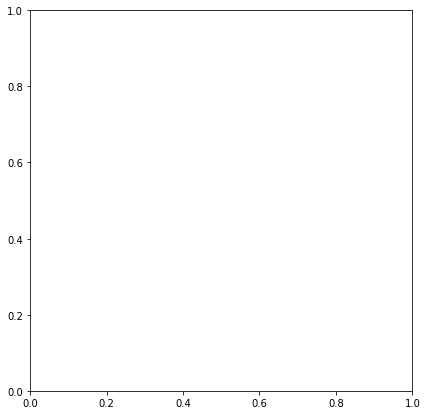

In [6]:
# Plot mutual information (last decile) through the Newkork (sorted) - Pandas version - DRAFT

#confusionMatrix = pd.read_csv("/home/quentin/Documents/NIPS/2_pipeline/store/20200405_162613_exp2_BS64_confusionMatrix.csv")
layerToSort=0
viridis = cm.get_cmap('viridis', 12)
fig, ax = plt.subplots(1,1,figsize=(pageWidth,7))
i=0.1
layers = [1,2,3,4,5]
tab=pd.DataFrame({"layer":[],"category":[], "decile":[], "category":[]})
SMALL_SIZE=9
plt.rc('xtick', labelsize=SMALL_SIZE)
for layer in layers:
    for category in categories:    
        tab=tab.append({"layer":layer, "category":category, "decile":np.percentile(confusionMatrix[(confusionMatrix["Layer"]==layer)&(confusionMatrix["category"]==category)]["mutualInfo"],np.arange(0,100,10))[9], "category":category},ignore_index=True)

x=[]
y=[]
for layer in (layers):
    xDecile=np.array(tab[tab["layer"]==layer]["decile"])
    yCategory=np.array(tab[tab["layer"]==layer]["category"])
    x=np.append(x,xDecile,axis=0)
    y=np.append(y,yCategory,axis=0)
x=x.reshape(5,47)
y=y.reshape(5,47) #test
g=x[:,np.argsort(x[0])]
sortedCategory=y[0,np.argsort(x[layerToSort])] #test
im = ax.imshow(g)
ax.set_yticks(np.arange(0,len(layers)))
ax.set_yticklabels(layers)
ax.set_xticks(np.arange(len(categories)))
ax.set_xticklabels(sortedCategory)
ax.set_ylabel('Layers')
ax.set_title("Mutual information score through the network (last decile)")
ax.vlines(np.arange(-0.5,len(categories)-1), -.5, len(layers)-.5, 'w')
plt.setp(ax.get_xticklabels(), rotation=90, va="center", ha="right",
         rotation_mode="anchor")
cbar=fig.colorbar(im,ax=ax, pad=0.01, aspect=5, ticks=[0,0.01,0.02], shrink=0.22)
cbar.set_ticks([0,0.01,0.02])
cbar.set_ticklabels([0,0.01,0.02])
plt.tight_layout()
#plt.savefig("/home/quentin/Documents/NIPS/2_pipeline/store/20200405_162613_exp2_BS64_MILastDecile.pdf")

plt.show()

# clustering

In [40]:
dataDirectory="C:/Users/AQ62270/201910_ccn/NIPS/0_data/dtd/images/spiralled/"
confusionMatrix = pd.read_csv(Path(os.path.join("C:/Users/AQ62270/201910_ccn/NIPS/2_pipeline/store/20200405_162613_exp2_BS64_confusionMatrix.csv")))


In [104]:

#modelName="20200405_162613_exp2_BS64.model"
inputDirectory=Path("2_pipeline/store/") # Location of the model
inputPath=Path(projectDirectory/inputDirectory)
modelPath=os.path.join(inputPath,modelName)
model_5layers = keras.models.load_model(os.path.join(Path(projectDirectory/inputDirectory),"20200405_162613_exp2_BS64.model"))
model_3layers = keras.models.load_model(os.path.join(Path(projectDirectory/inputDirectory),"20200507_004956_exp2_BS64_3layers.model"))

model_5layers_1stConv=Model(inputs=model_5layers.inputs, outputs=model_5layers.layers[layerNumber[layer-1]].output)
model_3layers_1stConv=Model(inputs=model_3layers.inputs, outputs=model_3layers.layers[layerNumber[layer-1]].output)

model_5layers_1stConv.summary()
model_3layers_1stConv.summary()

Model: "model_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1_input (InputLayer)     (None, 227, 227, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 55, 55, 96)        34944     
Total params: 34,944
Trainable params: 34,944
Non-trainable params: 0
_________________________________________________________________
Model: "model_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1_input (InputLayer)     (None, 227, 227, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 55, 55, 96)        34944     
Total params: 34,944
Trainable params: 34,944
Non-trainable params: 0
_________________________________________________________________


(227, 227, 3)

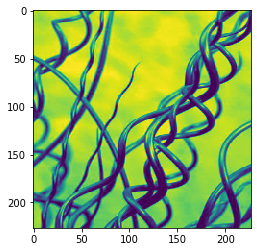

In [109]:
img_array=cv2.imread(os.path.join(Path("C:/Users/AQ62270/201910_ccn/NIPS/0_data/dtd/images/spiralled/spiralled_0004.jpg")))
img_array = cv2.resize(img_array, (227, 227))  # resize the image
plt.imshow(new_array[:,:,0])
img_array.shape

In [ ]:
blur11 = cv2.GaussianBlur(feature_maps[0, :, :,filterNumber],(11,11),0)
blur7 = cv2.GaussianBlur(feature_maps[0, :, :,filterNumber],(7,7),0)
DoGimg = blur10 - blur7
plt.imshow(blur11)
plt.show()
plt.imshow(blur7)
plt.show()
plt.imshow(DoGimg)
plt.show()

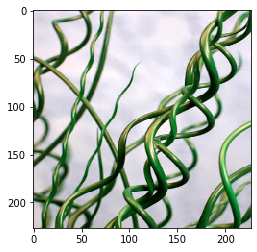

Highest values of entropy


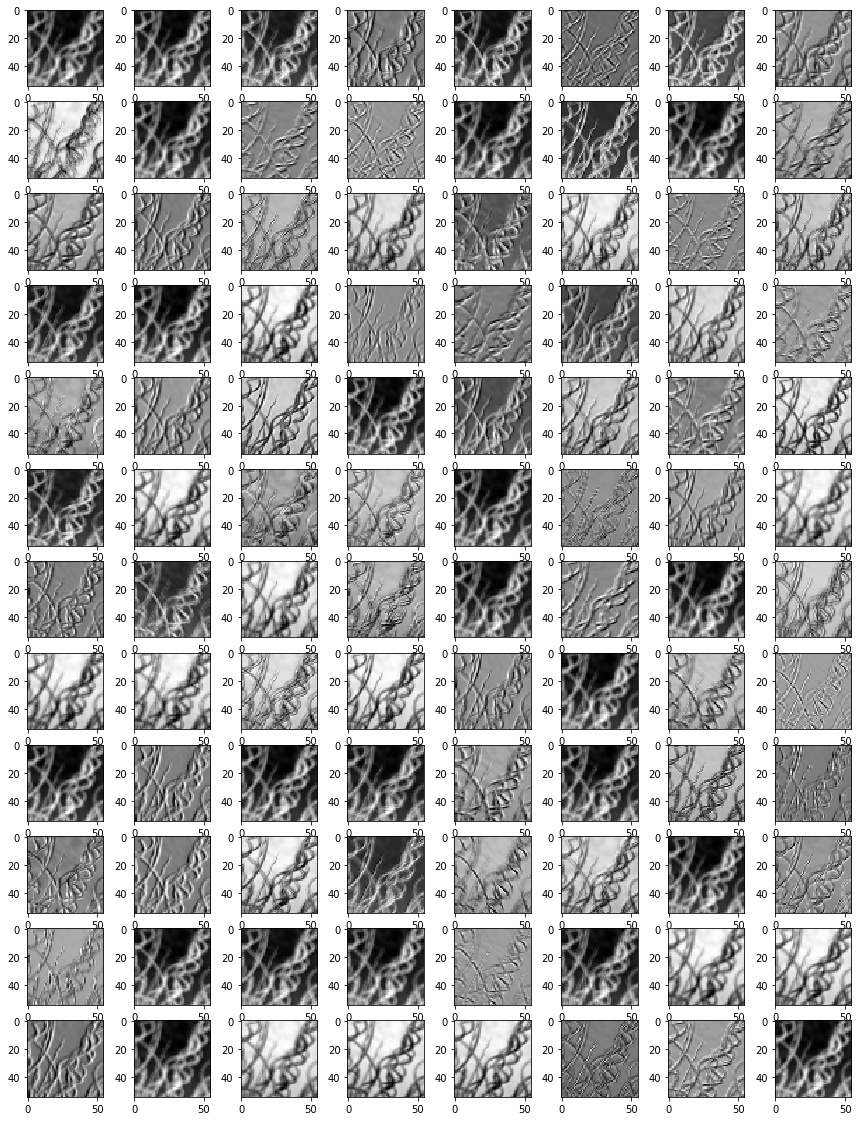

In [112]:
# Plot filter and associated feature maps
layer=1

img_array=cv2.imread(os.path.join(Path("C:/Users/AQ62270/201910_ccn/NIPS/0_data/dtd/images/spiralled/spiralled_0004.jpg")))
img_array = cv2.resize(img_array, (227, 227))  # resize the image
img_array = expand_dims(img_array, axis=0)
plt.imshow(new_array)
plt.show()
print("Highest values of entropy")

cols=8
rows=12
#fig,ax = plt.subplots(96,1)
fig,ax = plt.subplots(nrows=rows, ncols=cols, figsize=(15,20))
#i=0
#for filterNumber in np.arange(0,3,step=1):
filterNumber=0
for i in np.arange(0,cols):
    for j in np.arange(0,rows):
        
        feature_maps = model_5layers_1stConv.predict(img_array)
        ax[j,i].imshow(feature_maps[0, :, :,filterNumber], cmap='gray')
        filterNumber+=1
plt.show()
#for a in ax:   
#    print(a)
#    print(filterNumber)
#    #plt.imshow(img_array[0,:,:,0], cmap='gray')
#    #
#    #plt.subplot(232)
#    #plt.imshow(model_5layers_1stConv.layers[layerNumber[layer-1]+1].get_weights()[0][:,:,0, filterNumber], cmap='gray')
#    #plt.title("filter %i" %filterNumber)
#    #print("%.3f"%confusionMatrix.loc[(confusionMatrix["Layer"]==layer) & (confusionMatrix["filter"]==filterNumber)].iloc[0]["mutualScore"])
#    #plt.axis('off')
#    #
#    #ax[i].set_title("Feature map")
#    feature_maps = model_5layers_1stConv.predict(img_array)
#    a.imshow(feature_maps[0, :, :,filterNumber], cmap='gray')
#    filterNumber+=1
#    
#plt.show()

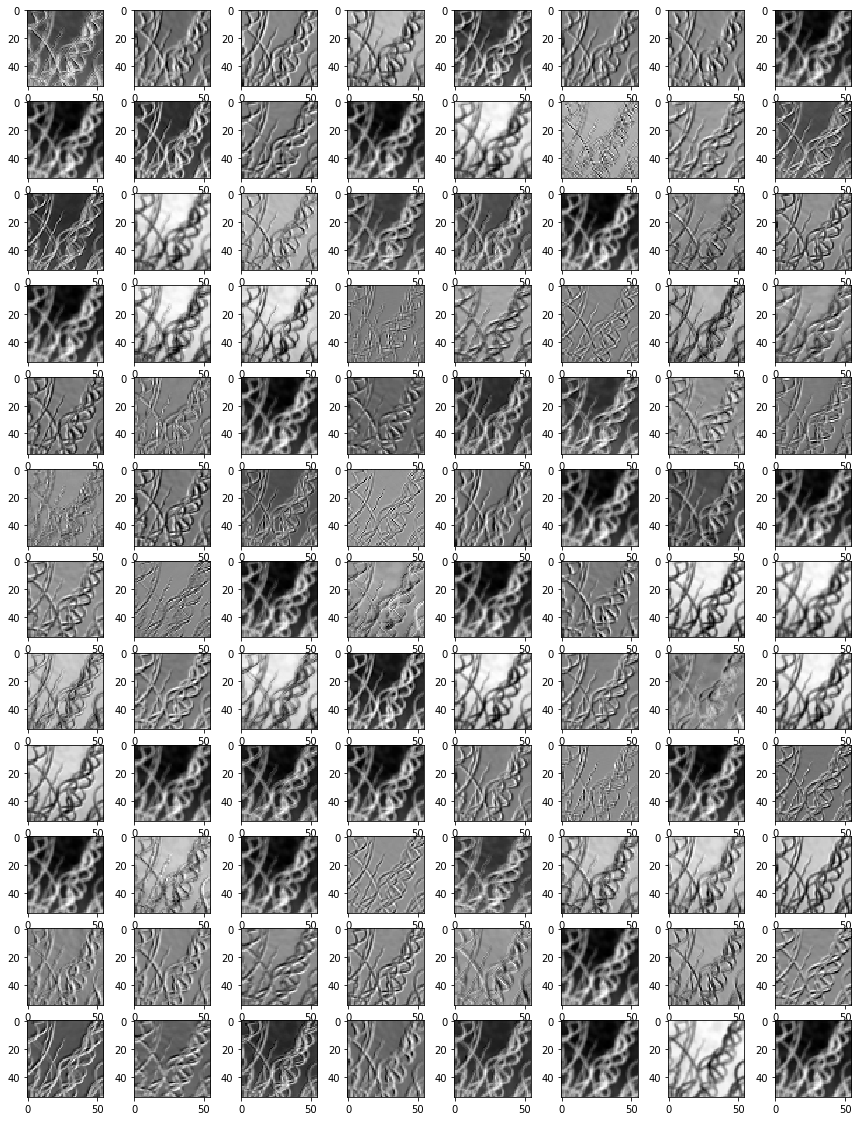

In [113]:
cols=8
rows=12
#fig,ax = plt.subplots(96,1)
fig,ax = plt.subplots(nrows=rows, ncols=cols, figsize=(15,20))
#i=0
#for filterNumber in np.arange(0,3,step=1):
filterNumber=0
for i in np.arange(0,cols):
    for j in np.arange(0,rows):
        feature_maps = model_3layers_1stConv.predict(img_array)
        ax[j,i].imshow(feature_maps[0, :, :,filterNumber], cmap='gray')
        filterNumber+=1
plt.show()
#for a in ax

In [134]:
feature_maps.shape
print(feature_maps[0,0,1,:])

for i in  (np.arange(0,55))[:2]:
    for j in  (np.arange(0,55))[:2]:
        for filterNumber in np.arange(0,96):
            #print(feature_maps[0,i,j,:])
            blur11 = cv2.GaussianBlur(feature_maps[0, j, i,filterNumber],(11,11),0)
            blur7 = cv2.GaussianBlur(feature_maps[0, j, i,filterNumber],(7,7),0)
            DoGimg = blur10 - blur7
            ax[j,i].imshow(DoGimg)
plt.show()
#        feature_maps = model_3layers_1stConv.predict(img_array)
#        plt.imshow(feature_maps[0, :, :,filterNumber], cmap='gray')
#        filterNumber+=1
#    plt.show()

[-351.0118   -482.02542  -349.92416  -685.5412     32.800095   39.336056
  116.510315  106.101906  324.00327  -664.833      38.567215 -242.06999
 -234.97215  -354.9811    462.86505   249.43692    25.011213   31.369654
  115.509575 -162.91676  -521.2334    104.597336   36.8753   -236.29254
   55.98905    19.856697  136.24751   224.04732  -586.5356   -227.00893
 -859.32947   245.15659  -728.8682   -627.65546    79.41207  -496.58713
  232.55122  -581.948    -360.67136    24.245222  -77.01485    35.21211
  137.05338  -581.4827   -800.8823     31.564024   50.830242 -191.8995
 -552.2593    447.88004  -260.33987    96.60648  -199.25914   -66.06779
 -538.28143   415.05228    15.957479 -369.383    -120.325134 -373.55612
   29.42263   154.49113  -673.6293    114.09146  -669.3239   -781.17114
   25.755363   21.369572   20.195417  158.34077  -500.0077   -714.67706
   14.965296   91.95727   148.11745   117.31198    42.114395  116.52554
  355.64325   -24.554386 -656.88214   272.86166   136.81526    

TypeError: Expected Ptr<cv::UMat> for argument '%s'

SyntaxError: invalid syntax (<ipython-input-128-47fe25a95981>, line 1)

In [65]:
feature_maps[0, :, :,filterNumber]

array([[  47.96261  ,   43.83726  ,   44.933205 , ...,    6.2221303,
          35.36915  , -142.65013  ],
       [  44.714966 ,   39.07713  ,   40.403976 , ...,   21.209408 ,
          26.509668 ,  -32.25218  ],
       [  44.59921  ,   40.78792  ,   39.532555 , ...,   94.68858  ,
          -5.4949293,   19.452324 ],
       ...,
       [-132.96623  ,   41.611294 ,   11.561767 , ...,   53.166412 ,
         -87.08904  ,   67.05249  ],
       [-148.58345  ,  131.3317   ,   13.6474905, ...,  -72.09439  ,
         -26.570509 ,   46.27723  ],
       [-200.97202  ,  171.86803  ,   -5.86365  , ...,  -76.70111  ,
          31.147291 ,   83.52703  ]], dtype=float32)

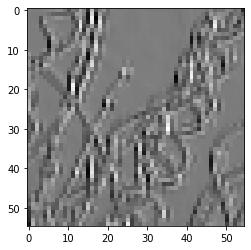

In [64]:
plt.imshow(feature_maps[0, :, :,filterNumber], cmap='gray')

In [68]:
feature_maps[0, :, :,filterNumber].shape

(55, 55)

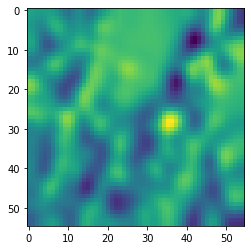

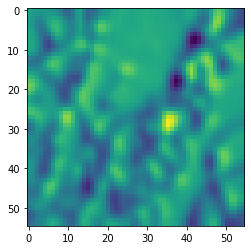

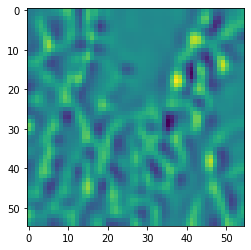

In [80]:


blur11 = cv2.GaussianBlur(feature_maps[0, :, :,filterNumber],(11,11),0)
blur7 = cv2.GaussianBlur(feature_maps[0, :, :,filterNumber],(7,7),0)
DoGimg = blur10 - blur7
plt.imshow(blur11)
plt.show()
plt.imshow(blur7)
plt.show()
plt.imshow(DoGimg)
plt.show()

In [55]:
confusionMatrix[(confusionMatrix["Layer"]==1)].sort_values(by="mutualInfo", ascending=False)

Unnamed: 0  Layer  Unnamed: 0.1  Unnamed: 0.1.1  Unnamed: 0.1.1.1  \
3517        3517      1        3517.0             NaN               NaN   
4316        4316      1        4316.0             NaN               NaN   
1778        1778      1        1778.0             NaN               NaN   
1214        1214      1        1214.0             NaN               NaN   
10            10      1          10.0             NaN               NaN   
...          ...    ...           ...             ...               ...   
4260        4260      1        4260.0             NaN               NaN   
75            75      1          75.0             NaN               NaN   
36            36      1          36.0             NaN               NaN   
2817        2817      1        2817.0             NaN               NaN   
1135        1135      1        1135.0             NaN               NaN   

       category  falsePositive  falsenegative  filter  mutualInfo  \
3517     banded         1736.0             22      74    0.026775   
4316     banded         1687.0             24      91    0.025112   
1778     banded         1515.0             30      37    0.023418   
1214     banded         1688.0             23      25    0.023201   
10    spiralled          265.0             13       0    0.021614   
...         ...            ...            ...     ...         ...   
4260    stained           53.0             38      90    0.000198   
75        lined         1786.0              2       1    0.000186   
36    sprinkled         1290.0             14       0    0.000181   
2817     swirly          248.0             36      59    0.000169   
1135    flecked         1657.0              3      24    0.000109   

      mutualScore   threshold  trueNegative  truePositive  
3517     0.106407   84.799298         104.0          18.0  
4316     0.083885   90.087534         153.0          16.0  
1778     0.055258  138.572691         325.0          10.0  
1214     0.077955   99.642742         152.0          17.0  
10       0.056029  -33.430678        1575.0          27.0  
...           ...         ...           ...           ...  
4260     0.001166  305.070900        1787.0           2.0  
75       0.001087   -3.038329          54.0          38.0  
36       0.000352 -213.061757         550.0          26.0  
2817     0.000472  484.906371        1592.0           4.0  
1135     0.000355 -216.449263         183.0          37.0  

[4512 rows x 14 columns]

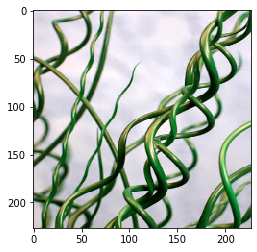

In [30]:
img_array=cv2.imread(os.path.join(Path("C:/Users/AQ62270/201910_ccn/NIPS/0_data/dtd/images/spiralled/spiralled_0004.jpg")))
new_array = cv2.resize(img_array, (227, 227))  # resize the image
plt.imshow(new_array)
plt.show()

In [ ]:
filteredImage = cv2.GaussianBlur(,(5,5),0)